# Done by: Srivatsav Yallapragada


## Importing necessary libraries

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ("ignore")

In [495]:
data = pd.read_csv ("stock_data.csv")
stock_df = pd.DataFrame (data)
stock_df.shape

(340, 15)

In [496]:
stock_df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [497]:
stock_df.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

- These are all the columns in the dataset

### Converting all the columns to titlecase

In [500]:
stock_df.columns = [i.title() for i in stock_df.columns]
stock_df.columns

Index(['Ticker Symbol', 'Security', 'Gics Sector', 'Gics Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'Roe', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

### EDA 

In [502]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   Gics Sector                   340 non-null    object 
 3   Gics Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   Roe                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- we can notice that we have no null values

In [504]:
stock_df.duplicated().sum()

0

- No duplicates!

In [506]:
stock_df.describe()

,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


In [507]:
stock_df.isnull().sum()

Ticker Symbol                   0
Security                        0
Gics Sector                     0
Gics Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
Roe                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- No Null values

### Histograms and Boxplots of numerical features

In [510]:
stock_df["Ticker Symbol"].nunique()

340

Current Price
Skew : 7.05


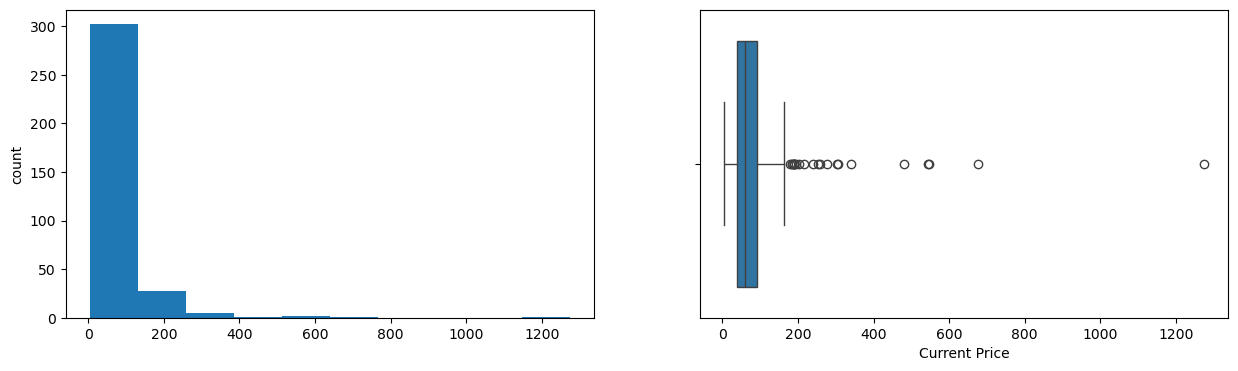

Price Change
Skew : -0.56


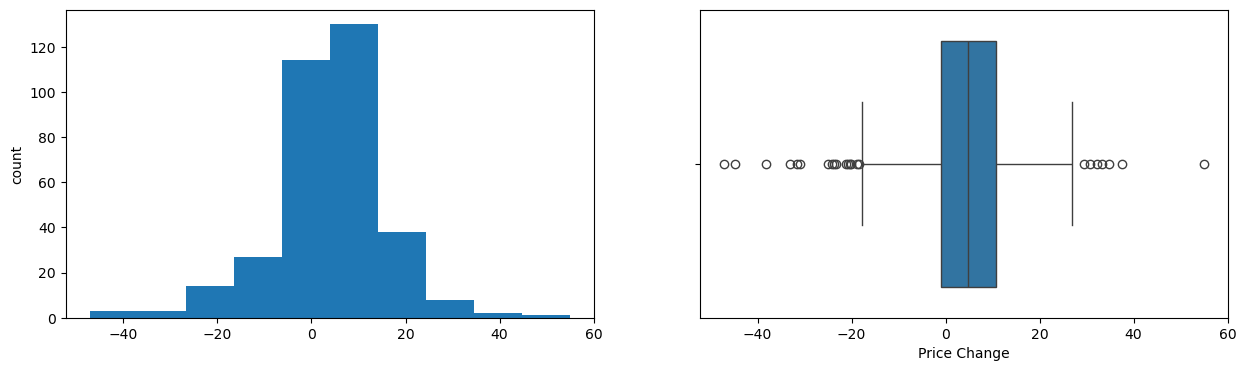

Volatility
Skew : 2.1


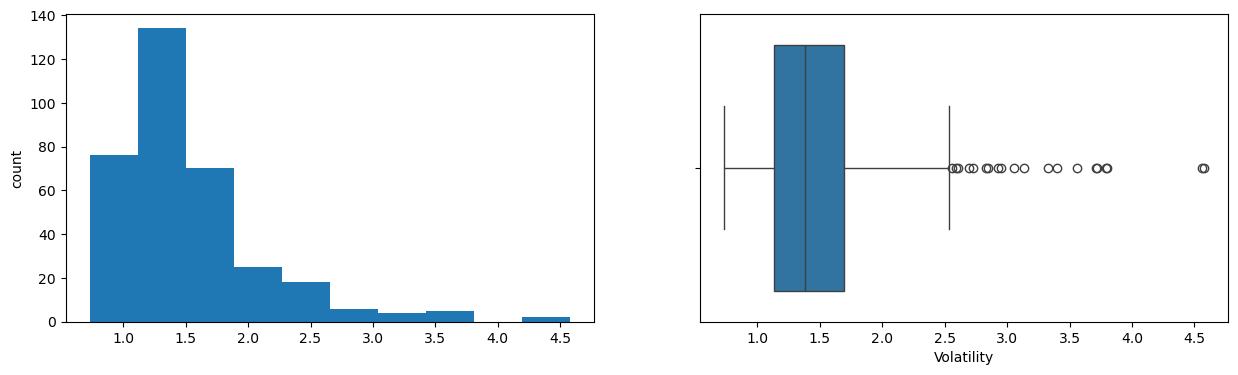

Roe
Skew : 5.77


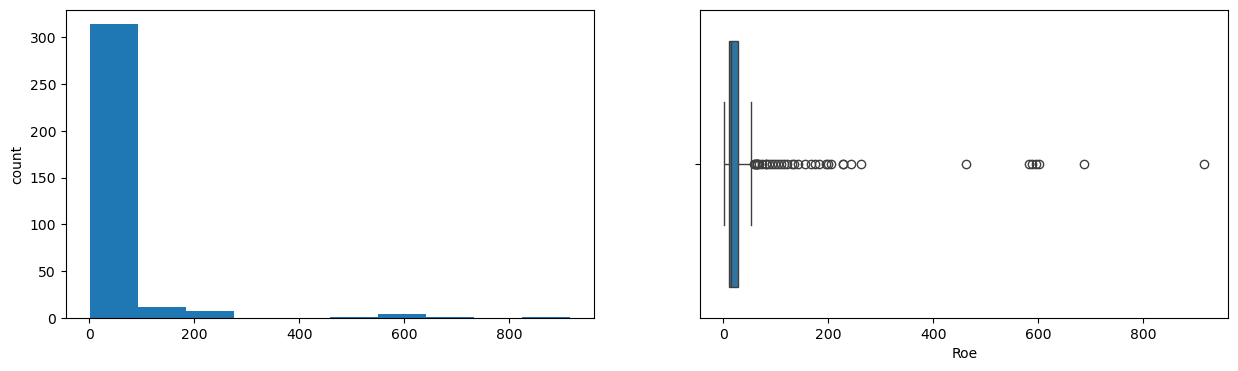

Cash Ratio
Skew : 4.47


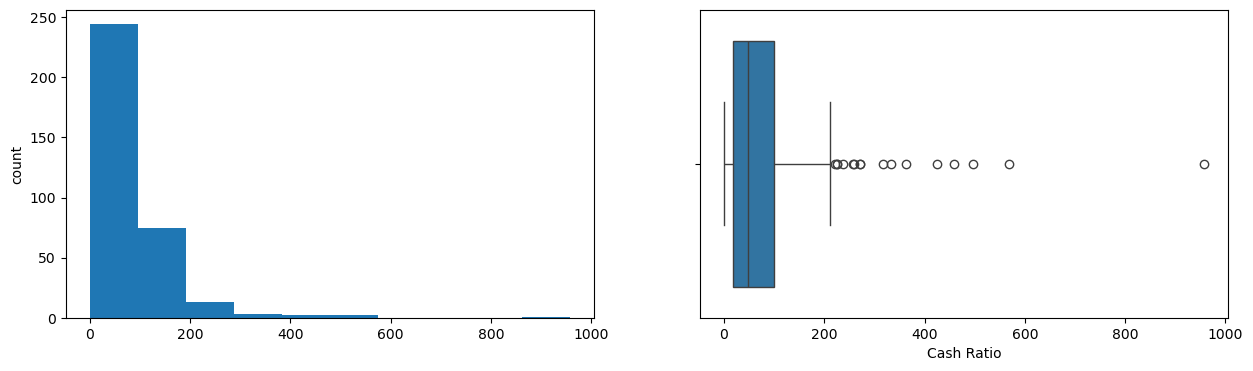

Net Cash Flow
Skew : 3.85


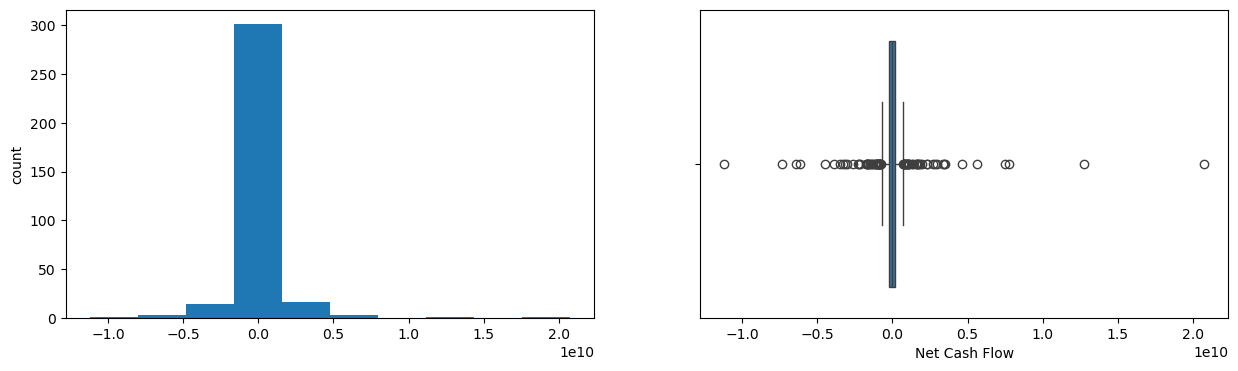

Net Income
Skew : 0.95


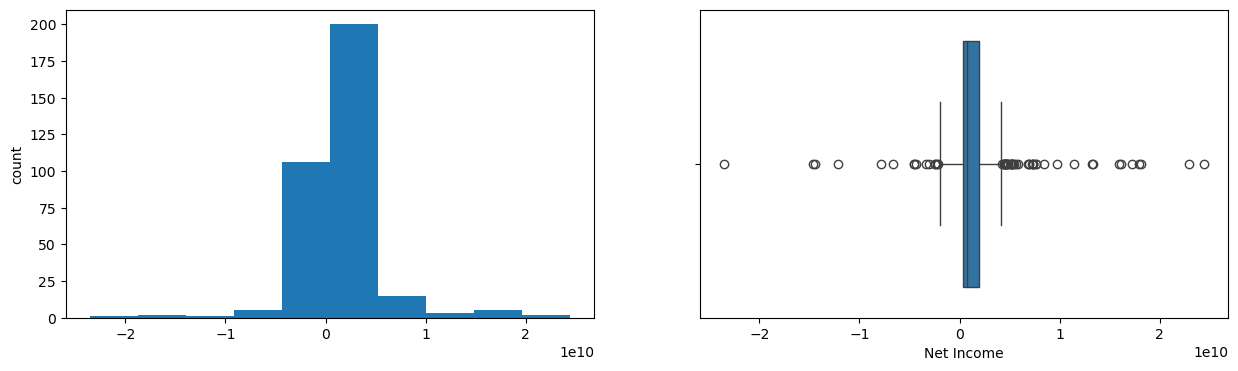

Earnings Per Share
Skew : -2.72


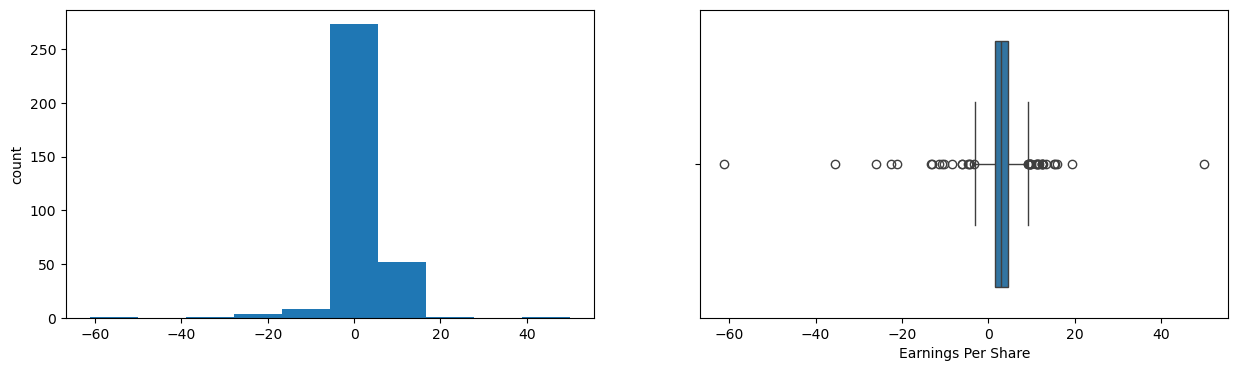

Estimated Shares Outstanding
Skew : 3.85


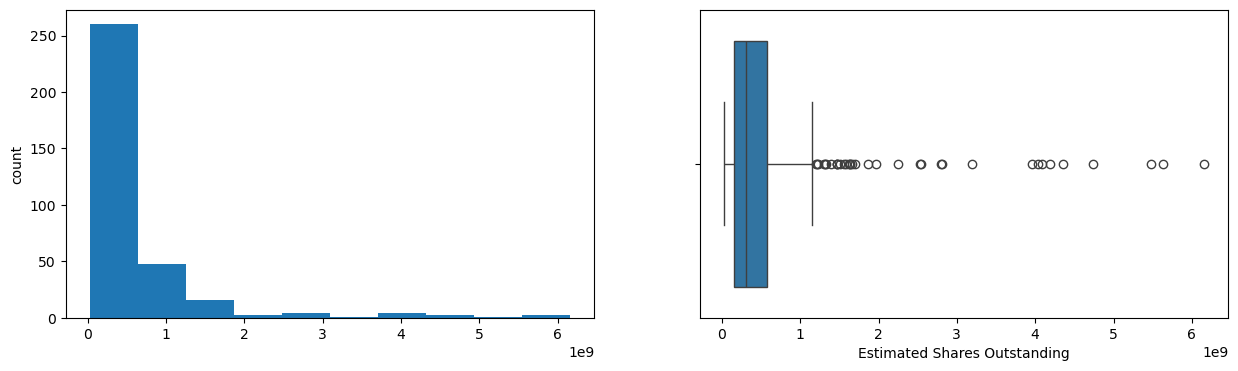

P/E Ratio
Skew : 6.71


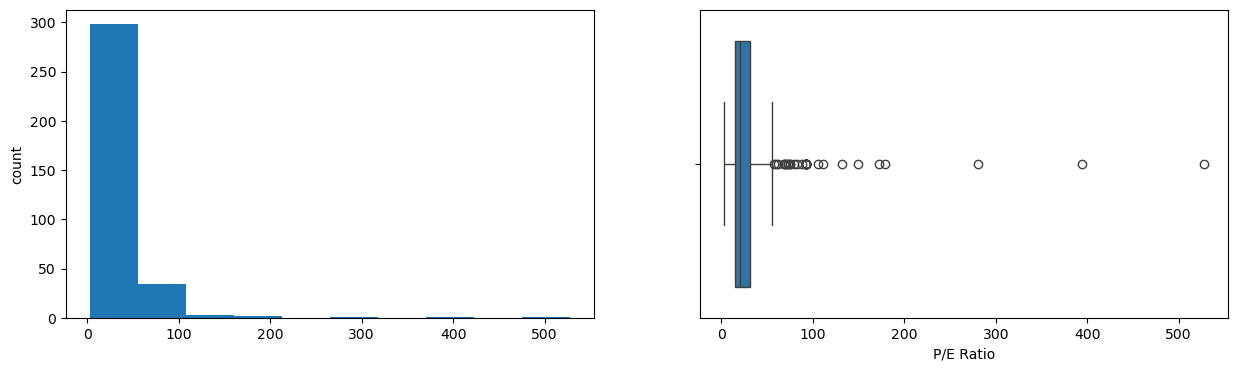

P/B Ratio
Skew : 0.82


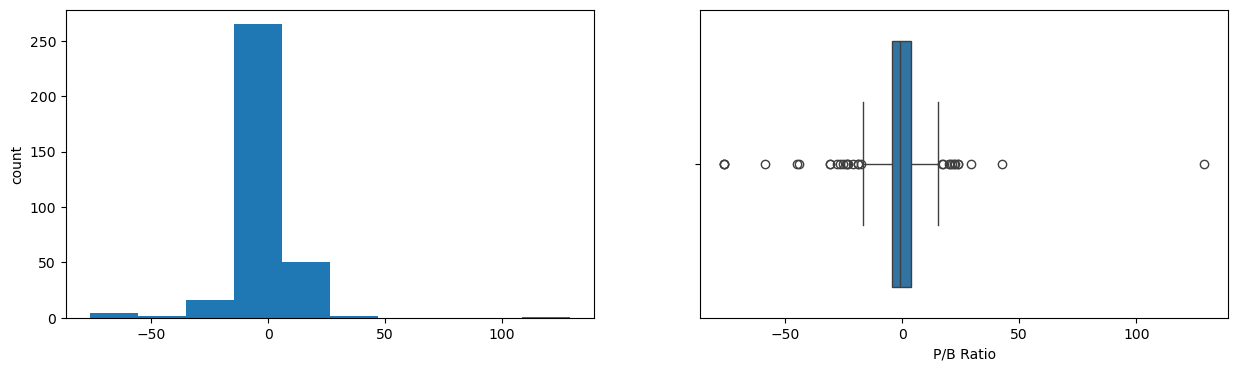

In [511]:
df_numCol = stock_df.select_dtypes(include=['number'])

for col in df_numCol.columns:
    print(col)
    print("Skew :", round(df_numCol[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df_numCol[col].hist(bins=10, grid=False)
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_numCol[col])
    plt.show()

### Analysis of Attributes:
#### Current Price: 
- #### histogram reveals a highly skewed right-tailed distribution
- #### majority of stock prices fall between 0 and 200
- #### High-priced stocks naturally inflate the distribution.
#### Price Change :
- #### The histogram exhibits a nearly symmetrical distribution with a slight left skew
- #### majority of price changes are between -20 and 20, suggesting that moderate gains and losses are more common.
- #### Many outliers on both sides, particularly in the range of <-30 and >30, signifying stocks that have experienced unusual price swings.
#### Volatility:
- #### The volatility distribution is right-skewed (Skew = 2.1), meaning most stocks have low to moderate volatility, while a few stocks exhibit extremely high volatility.
- #### There are several outliers, representing stocks with unusually high volatility, extending up to 4.5.
#### ROE (Return on Equity):
- #### Highly Right-Skewed | Most companies have low ROE, but a few outliers extend beyond 800, indicating extremely high profitability in some firms.
- #### The box plot shows a large number of outliers, suggesting that while most firms have moderate ROE
#### Cash Ratio:
- #### Right-Skewed Distribution, Most firms have low cash ratios, but a few exceed 600, indicating a small number of cash-rich firms.
- #### Several extreme outliers in the box plot suggest that some companies hold disproportionately high cash reserves relative to their liabilities
#### Net Income:
- #### Slight Right-Skewed Distribution (Skew = 0.95): The majority of companies have net income close to zero or slightly positive, with a few firms reporting very high net income, causing the right skew.
- #### High Outliers on Both Ends: The box plot indicates several companies with extremely high profits and significant losses
#### Earnings Per Share (EPS)
- #### Strong Left-Skewed Distribution
- #### Substantial Negative Outliers: The box plot reveals many firms with extremely negative EPS, indicating firms with significant losses per share
#### P/E Ratio :
- #### Highly Right-Skewed Distribution, The majority of stocks have low P/E ratios, but there are a few with extremely high values, indicating companies with high valuations or low earnings.
- #### The box plot reveals several stocks with very high P/E ratios, possibly due to overvaluation or low earnings, making them potential speculative stocks.
#### P/B Ratio : 
- #### Slightly Right-Skewed Distribution, Most companies have P/B ratios concentrated around a central range, but a few stocks have extreme values.
- #### Some companies have negative P/B ratios, indicating negative book values, while others have very high values




### Correlation

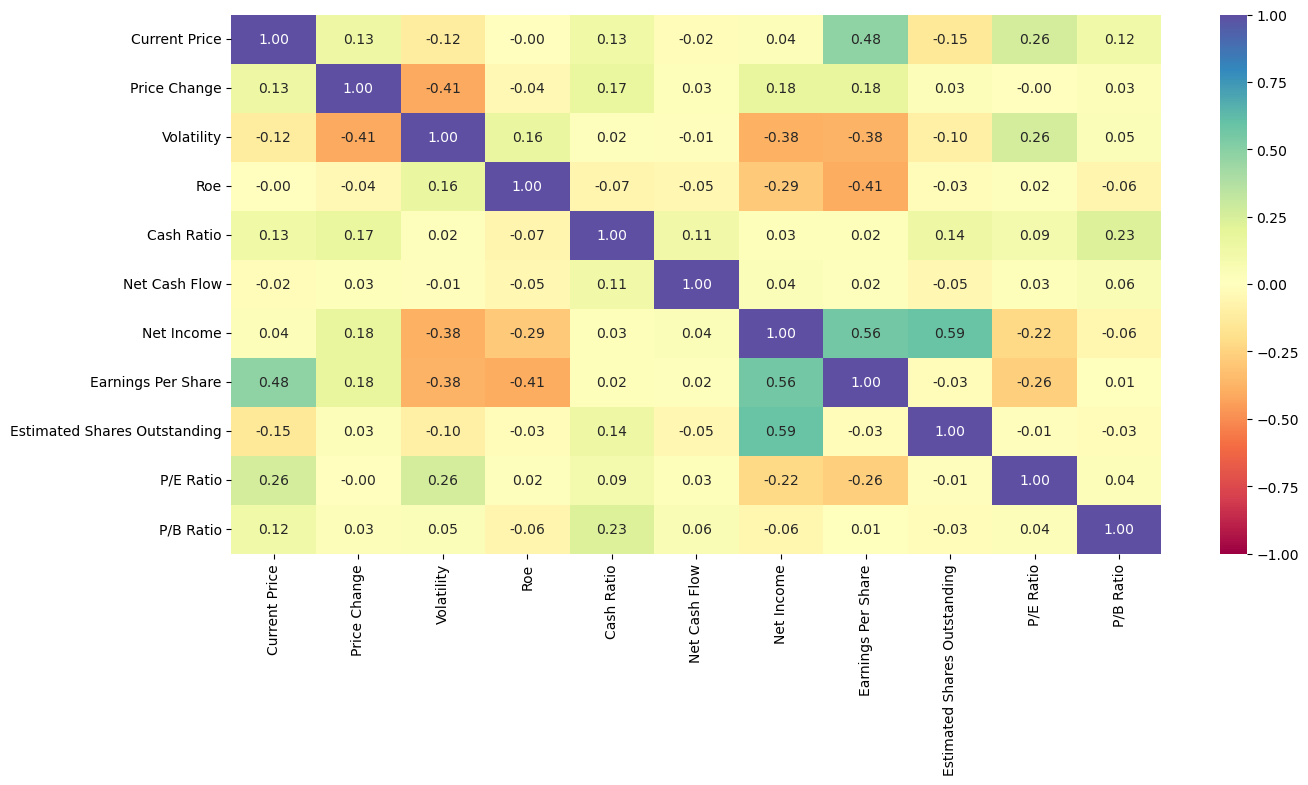

In [514]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df_numCol.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Insights
#### Strong Positive Correlations:
- ##### Net Income & Earnings Per Share (EPS) (0.56): As expected, a company's profitability directly influences its EPS.
- ##### Net Income & Estimated Shares Outstanding (0.59): Companies with higher outstanding shares tend to have larger net incomes.
#### Notable Negative Correlations:
- ##### Volatility & Net Income (-0.38) / EPS (-0.41): Higher volatility is linked with lower profitability and earnings, suggesting that unstable stocks tend to perform poorly.
- ##### P/E Ratio & Net Income (-0.22) / EPS (-0.26): Stocks with lower earnings or profitability tend to have higher P/E ratios, indicating overvaluation.

### We can use the Ticker Symbol as the Unique ID attribute for the dataset

In [517]:
stock_df = stock_df.set_index('Ticker Symbol')


In [518]:
stock_df.head()

,Security,Gics Sector,Gics Sub Industry,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Ticker Symbol,,,,,,,,,,,,,,
AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


### Normalizing the data

In [520]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaled_df = pd.DataFrame(scaler.fit_transform (df_numCol), columns=df_numCol.columns)

### K-Means Clustering

In [522]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Plotting WCSS (Within Cluster Squared Distances) for different numbers of clusters to detect the "elbow"

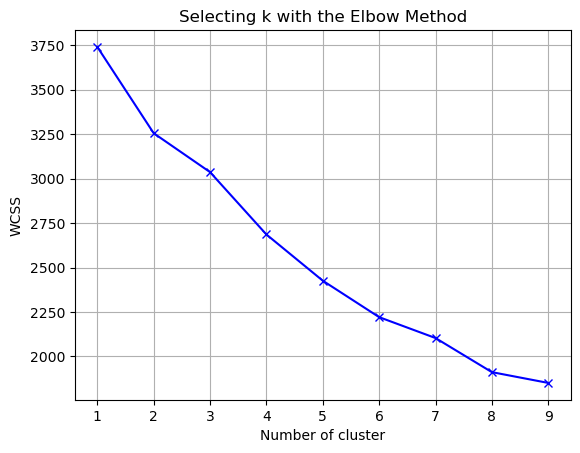

In [524]:
WCSS = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=1000).fit(scaled_df)
    WCSS[k] = kmeans.inertia_

# Plot WCSS for different number of clusters
plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.title("Selecting k with the Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

### Elbow method suggests at 4 clusters. Let us use Knee Locator

In [526]:
#!pip install kneed

In [527]:
from kneed import KneeLocator

In [528]:
k_values = list(WCSS.keys())
wcss_values = list(WCSS.values())
k1 = KneeLocator(k_values, wcss_values, curve="convex", direction="decreasing")

# Find the elbow point
elbow_point = k1.elbow
print("Elbow point at:", elbow_point)

Elbow point at: 5


### The Knee Locator indicates that there are **five clusters** identified.

### Using the Silhouette method

In [531]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range (2, 11):
    kmeans = KMeans (n_clusters = k, random_state=1)
    kmeans.fit (scaled_df)
    score = silhouette_score (scaled_df, kmeans.labels_)
    silhouette_coefficients.append (score)

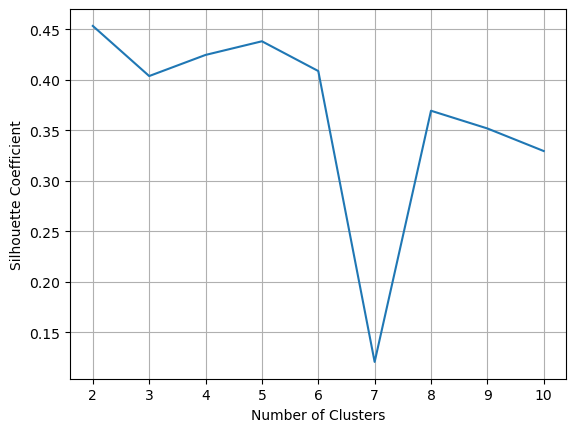

In [532]:
# Plotting the results:
plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.grid(True)
plt.show ()

### The silhouette analysis indicates two clusters, but it's not clear enough to differentiate them. Therefore, the best alternative is to use five clusters.

### I'm going with the optimal number, 5 clusters

In [535]:
kmeans = KMeans (n_clusters = 5, init='k-means++', n_init=100, random_state=1)
kmeans = kmeans.fit (scaled_df)
scaled_df["kmeans_clusters"] = kmeans.labels_

In [536]:
scaled_df.head()

,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,kmeans_clusters
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653,0
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205,0
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941,0
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333,0
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196,2


### Let's visualize the clusters in 2 dimensions by choosing any two features. 

- 1. Price-to-Earnings (P/E) Ratio
The P/E ratio indicates how much investors are willing to pay per dollar of earnings.
A low P/E ratio suggests that the stock may be undervalued.
A high P/E ratio suggests that the stock may be overvalued or expected to have high growth.

- 2. Return on Equity (ROE)
ROE measures a company's profitability relative to shareholders' equity.
A higher ROE indicates strong financial health and efficiency.
A lower ROE suggests poor profitability or inefficient use of capital.


Text(0, 0.5, 'ROE')

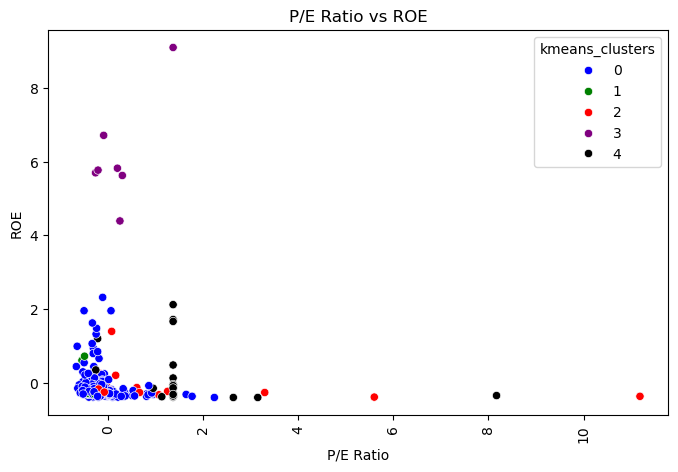

In [539]:
fig = plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='P/E Ratio', y='Roe', data=scaled_df, hue='kmeans_clusters', palette=['blue', 'green', 'red','purple','black'])
plt.title('P/E Ratio vs ROE', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('P/E Ratio', fontsize=10)
plt.ylabel('ROE', fontsize=10)

#### The clusters in the scatter plot exhibit significant overlap, indicating poor separability between groups. There is no clear distinction between clusters

### Let's look at the cluster profiles

In [542]:
cluster_profile = scaled_df.groupby("kmeans_clusters").mean()



In [543]:
cluster_profile["count_in_each_segment"] = (
    scaled_df.groupby("kmeans_clusters")["Current Price"].count().values
)

In [544]:
scaled_df.kmeans_clusters.value_counts ()

kmeans_clusters
0    268
4     29
2     23
1     13
3      7
Name: count, dtype: int64

In [545]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="yellow", axis=0).highlight_min(color='lightgreen', axis=0)

,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
kmeans_clusters,,,,,,,,,,,,
0,-0.086502,0.083769,-0.245994,-0.150136,-0.181562,-0.033418,0.001257,0.139989,-0.175841,-0.206820,-0.103623,268
1,-0.334583,0.164765,-0.612617,-0.125082,0.079825,0.369279,3.207781,0.179657,3.956533,-0.372928,-0.181779,13
2,1.751181,0.862698,0.350776,-0.126609,2.428193,0.202365,-0.113521,0.554389,-0.026160,0.999330,1.194556,23
3,0.035679,-0.018619,0.510543,6.161211,-0.403730,-0.321038,-1.642594,-2.070221,-0.211767,0.218411,-0.707801,7
4,-0.448096,-1.527718,2.146513,0.056759,-0.186255,0.060281,-0.963065,-1.314203,-0.076743,1.233180,0.262549,29


<Axes: xlabel='kmeans_clusters'>

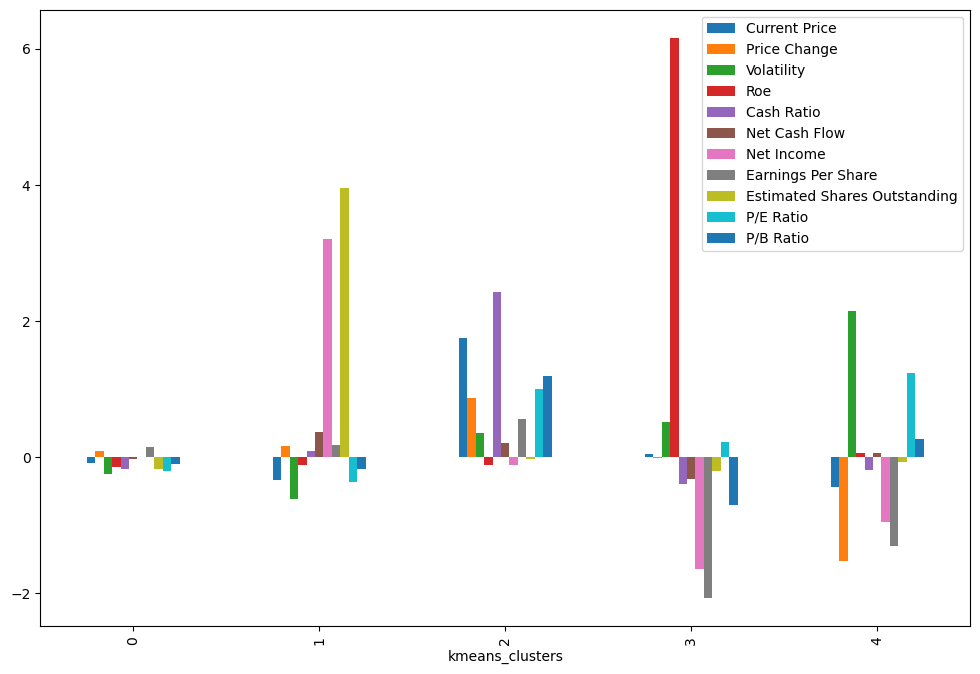

In [546]:
scaled_df.groupby("kmeans_clusters").mean().plot.bar(figsize=(12, 8))

### Insights and Business Recommendations
#### Cluster 0:
- ##### **Insight**:  This cluster consists of moderately volatile stocks with strong liquidity, high price growth, and positive earnings per share. However, the negative ROE suggests profitability concerns.
- ##### **Business Recommendation**: This group is suitable for risk-tolerant investors who prefer growth-oriented stocks with good earnings potential. Short-term trading may be beneficial
- Current Price: High
- Price Change: High 
- Volatility: Moderate
- ROE (Return on Equity): Negative 
- Earnings Per Share (EPS): Highest
- P/E Ratio: Moderate
- Cash Ratio: Highest 
#### Cluster 1:
- ##### **Insight**: This cluster comprises highly profitable companies (high ROE), but they are facing losses and low liquidity levels. Despite good profitability, cash flow concerns exist.
- ##### **Business Recommendation**: These stocks are better suited for long-term investors who focus on fundamental strength rather than short-term price fluctuations. Due diligence on financial stability is required.
- ROE: Highest 
- Net Income: Lowest 
- Price Change: Negative
- P/E Ratio: Lowest
- Cash Ratio: Negative 
#### Cluster 2:
- ##### **Insight**: This cluster includes highly volatile, overvalued stocks with negative price movement and poor financial health.
- ##### **Business Recommendation**: These are high-risk speculative stocks and not ideal for conservative investors. Best suited for traders who can handle short-term fluctuations.
- Volatility: Highest
- Price Change: Negative 
- ROE: Positive but low
- Net Income: Negative
- P/E Ratio: High 
- Cash Ratio: Negative
#### Cluster 3:
- ##### **Insight**: These companies have large market capitalization, stable net income, and consistent earnings per share.
- ##### **Business Recommendation**: Long-term investors looking for stable stocks with strong fundamentals should consider these. They offer less risk but moderate returns.
- Estimated Shares Outstanding: Highest 
- Net Income: High
- Earnings Per Share (EPS): Positive
- P/E Ratio: Negative
- Price Change: Low
#### Cluster 4:
- ##### **Insight**: This cluster consists of low-risk, low-return stocks that lack aggressive price movement.
- ##### **Business Recommendation**: Best suited for conservative investors who prefer stability over high returns. These stocks could be part of a dividend-oriented strategy.
- Current Price, ROE, and Price Change: Lowest
- Volatility: Lowest
- P/E Ratio & P/B Ratio: Lowest
- Net Income & EPS: Lowest
- Largest number of companies in this cluster

### Let me Display the companies in respective clusters 

In [549]:
stock_df["kmeans_clusters"] = kmeans.labels_


for cl in stock_df["kmeans_clusters"].unique():
    print("In cluster {}, these are the Companies:".format(cl))
    print(stock_df[stock_df["kmeans_clusters"] == cl]["Security"].unique())
    print()

In cluster 0, these are the Companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Cor

## Hierarchical Clustering

In [551]:
# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import AgglomerativeClustering
# to compute distances
from scipy.spatial.distance import pdist

In [552]:
# ["single", "complete", "average", "centroid", "weighted", "ward"]

In [553]:
scaled_df.drop(columns=["kmeans_clusters"], inplace= True)


#### Dropping the **Kmean_cluster** column, As we have now started implementing **Hierarchical Clustering**

In [555]:
scaled_df.head()

,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


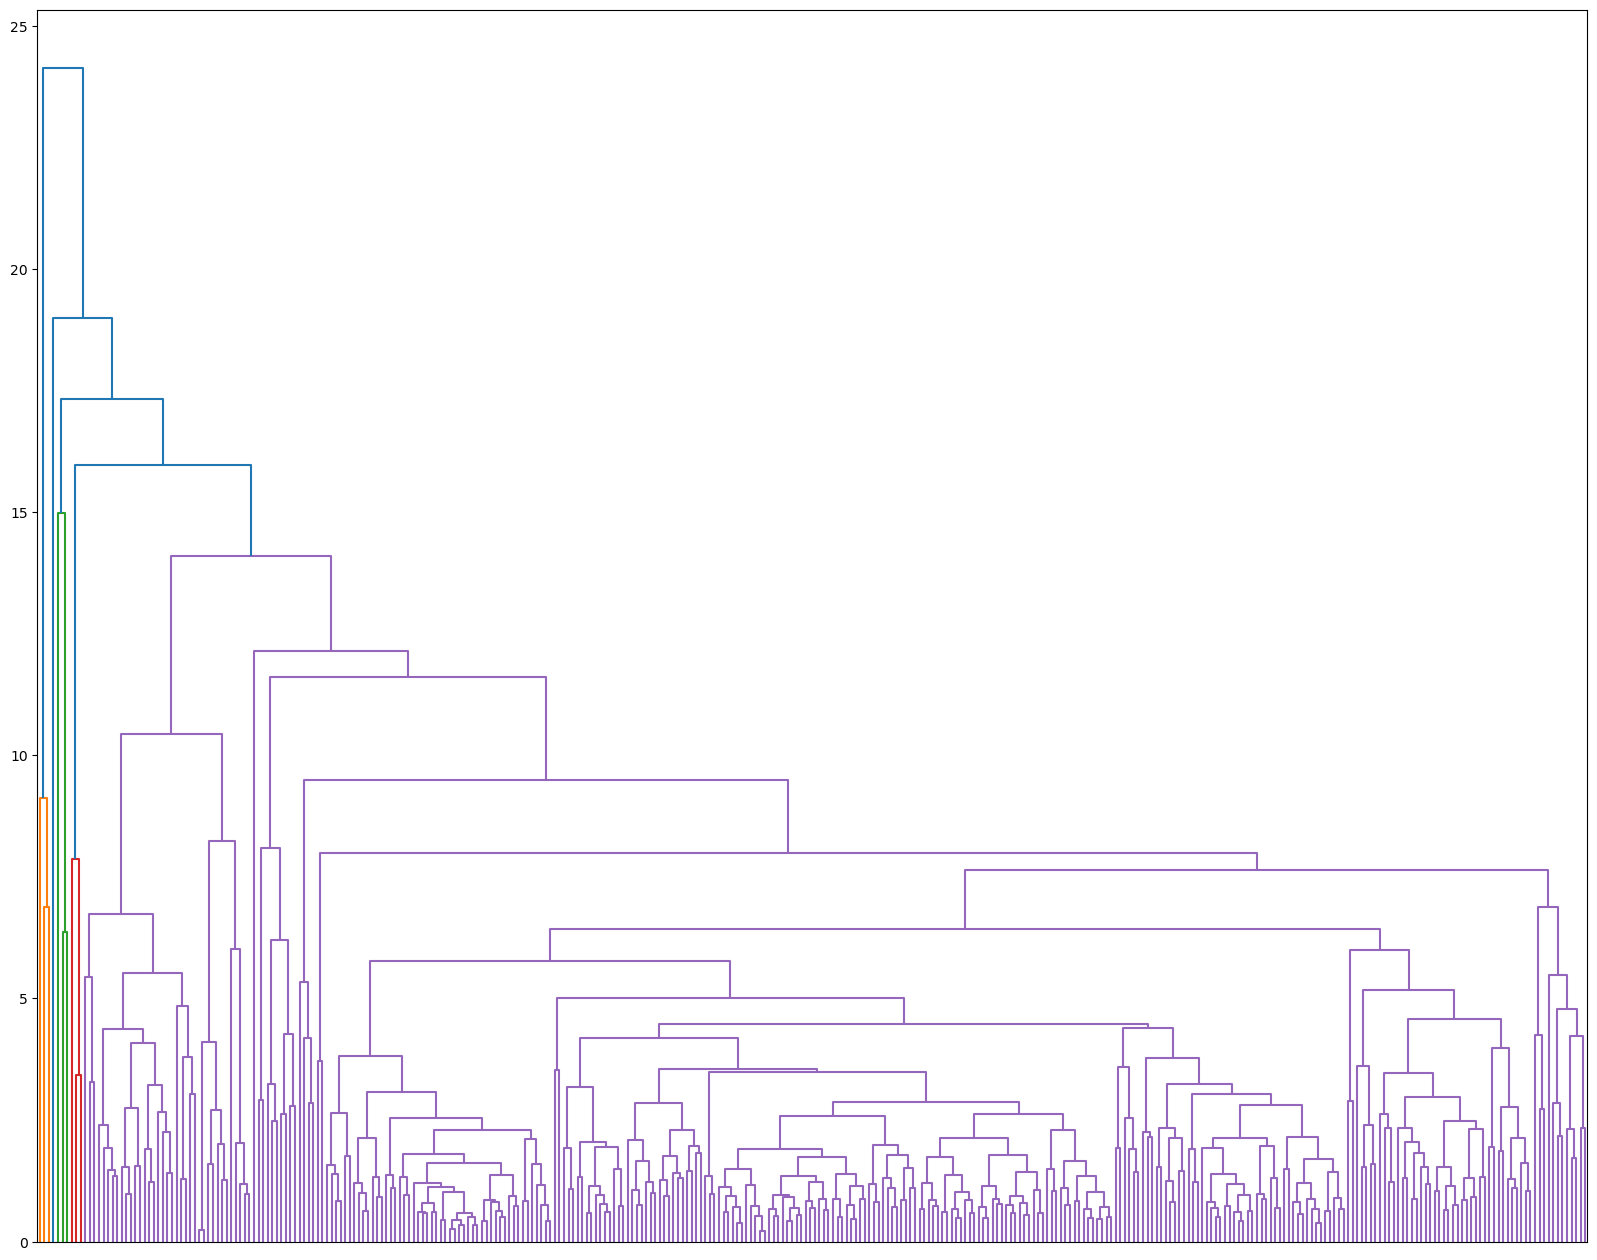

In [556]:
# Euclidean and complete method
Z = linkage(scaled_df, metric="euclidean", method="complete")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=15)
plt.savefig("euclidean_complete.png", dpi=300, bbox_inches="tight") 
plt.show()


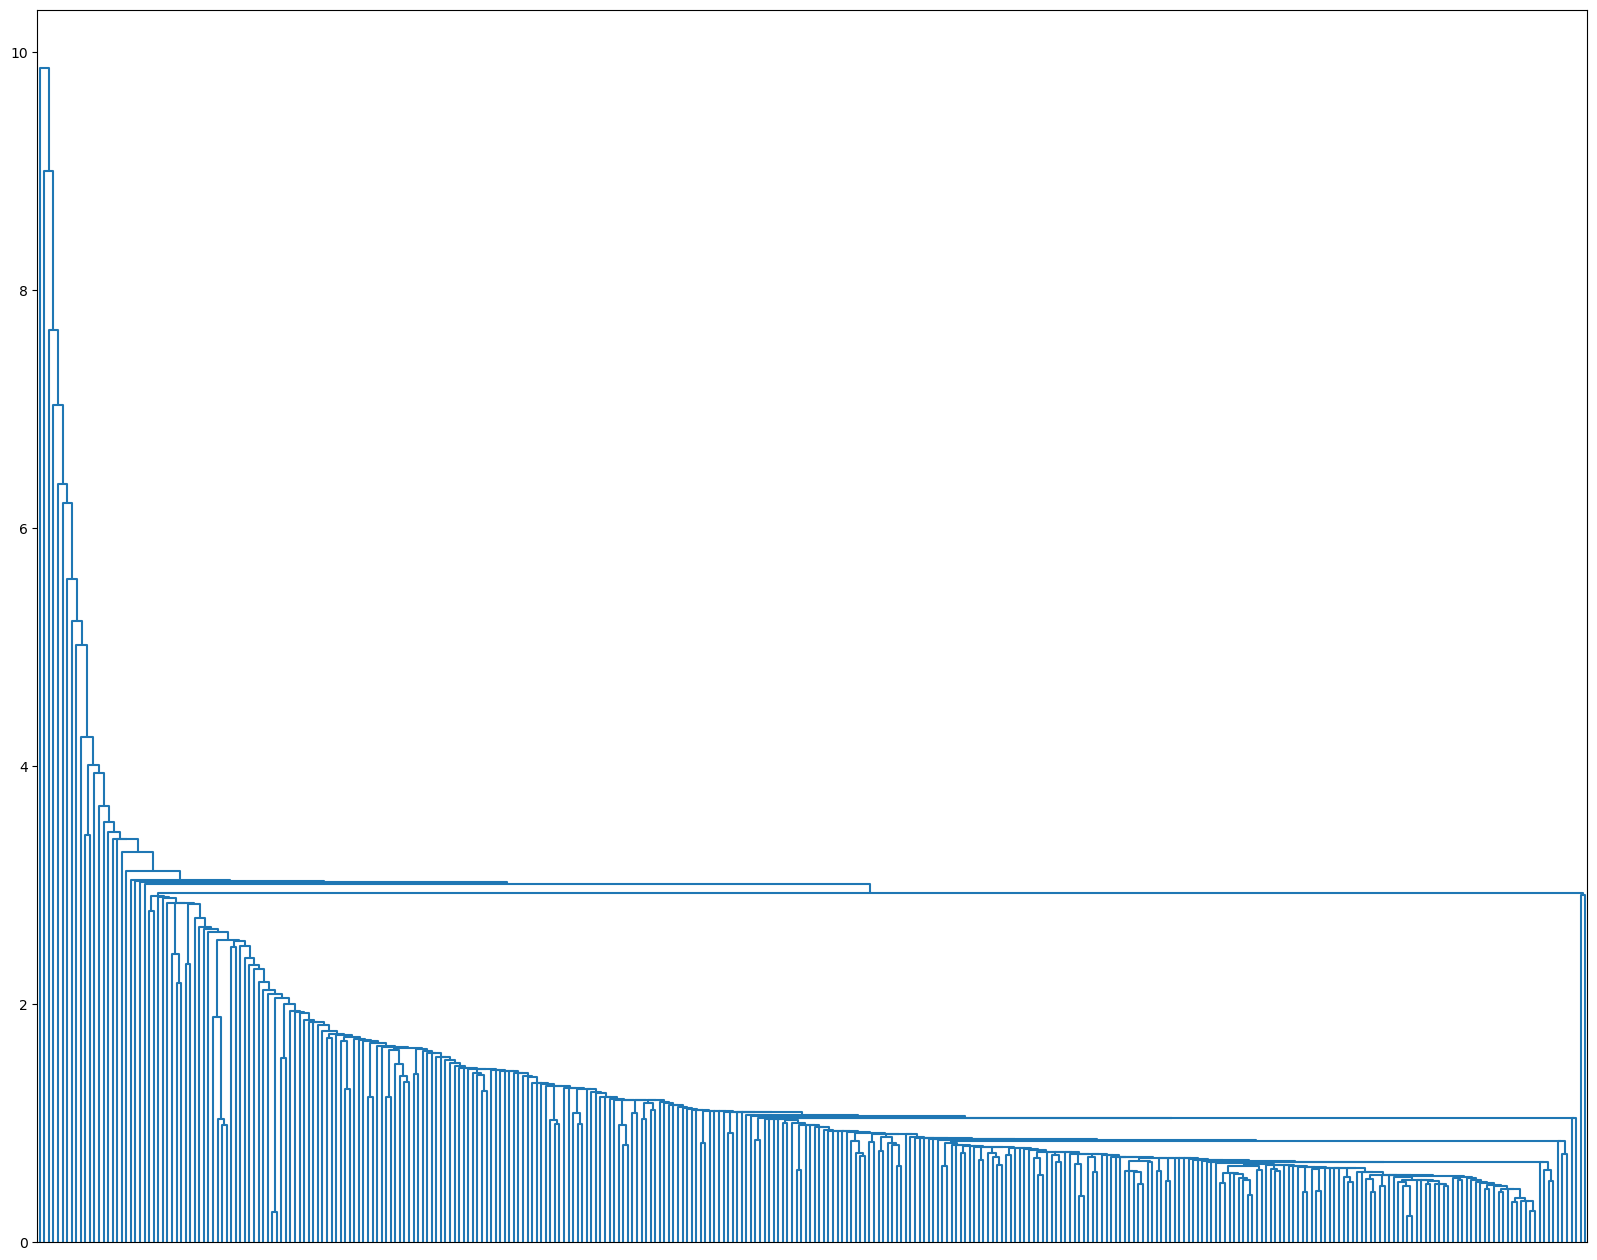

In [557]:
# Euclidean and single method
Z = linkage(scaled_df, metric="euclidean", method="single")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.savefig("euclidean_single.png", dpi=300, bbox_inches="tight") 
plt.show()


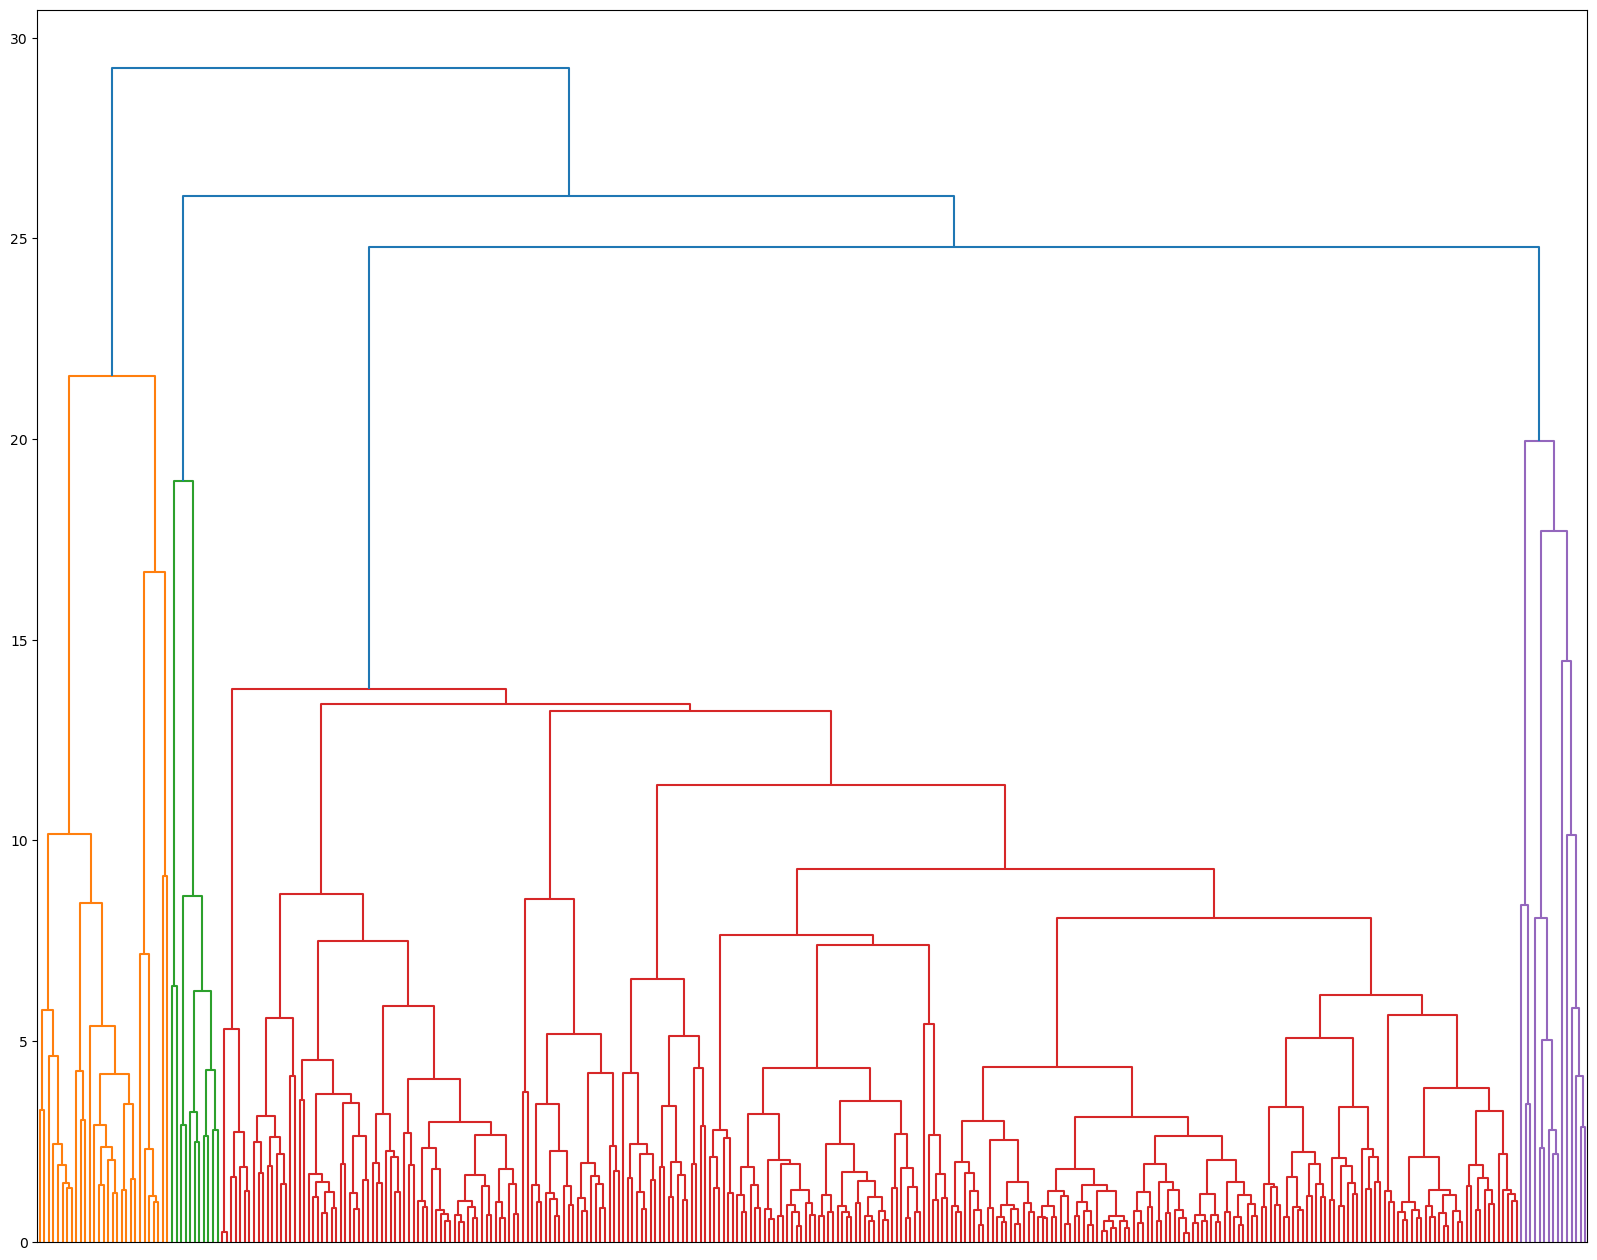

In [558]:
# Euclidean and Ward method
Z = linkage(scaled_df, metric="euclidean", method="ward")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=22)
plt.savefig("euclidean_ward.png", dpi=300, bbox_inches="tight") 
plt.show()

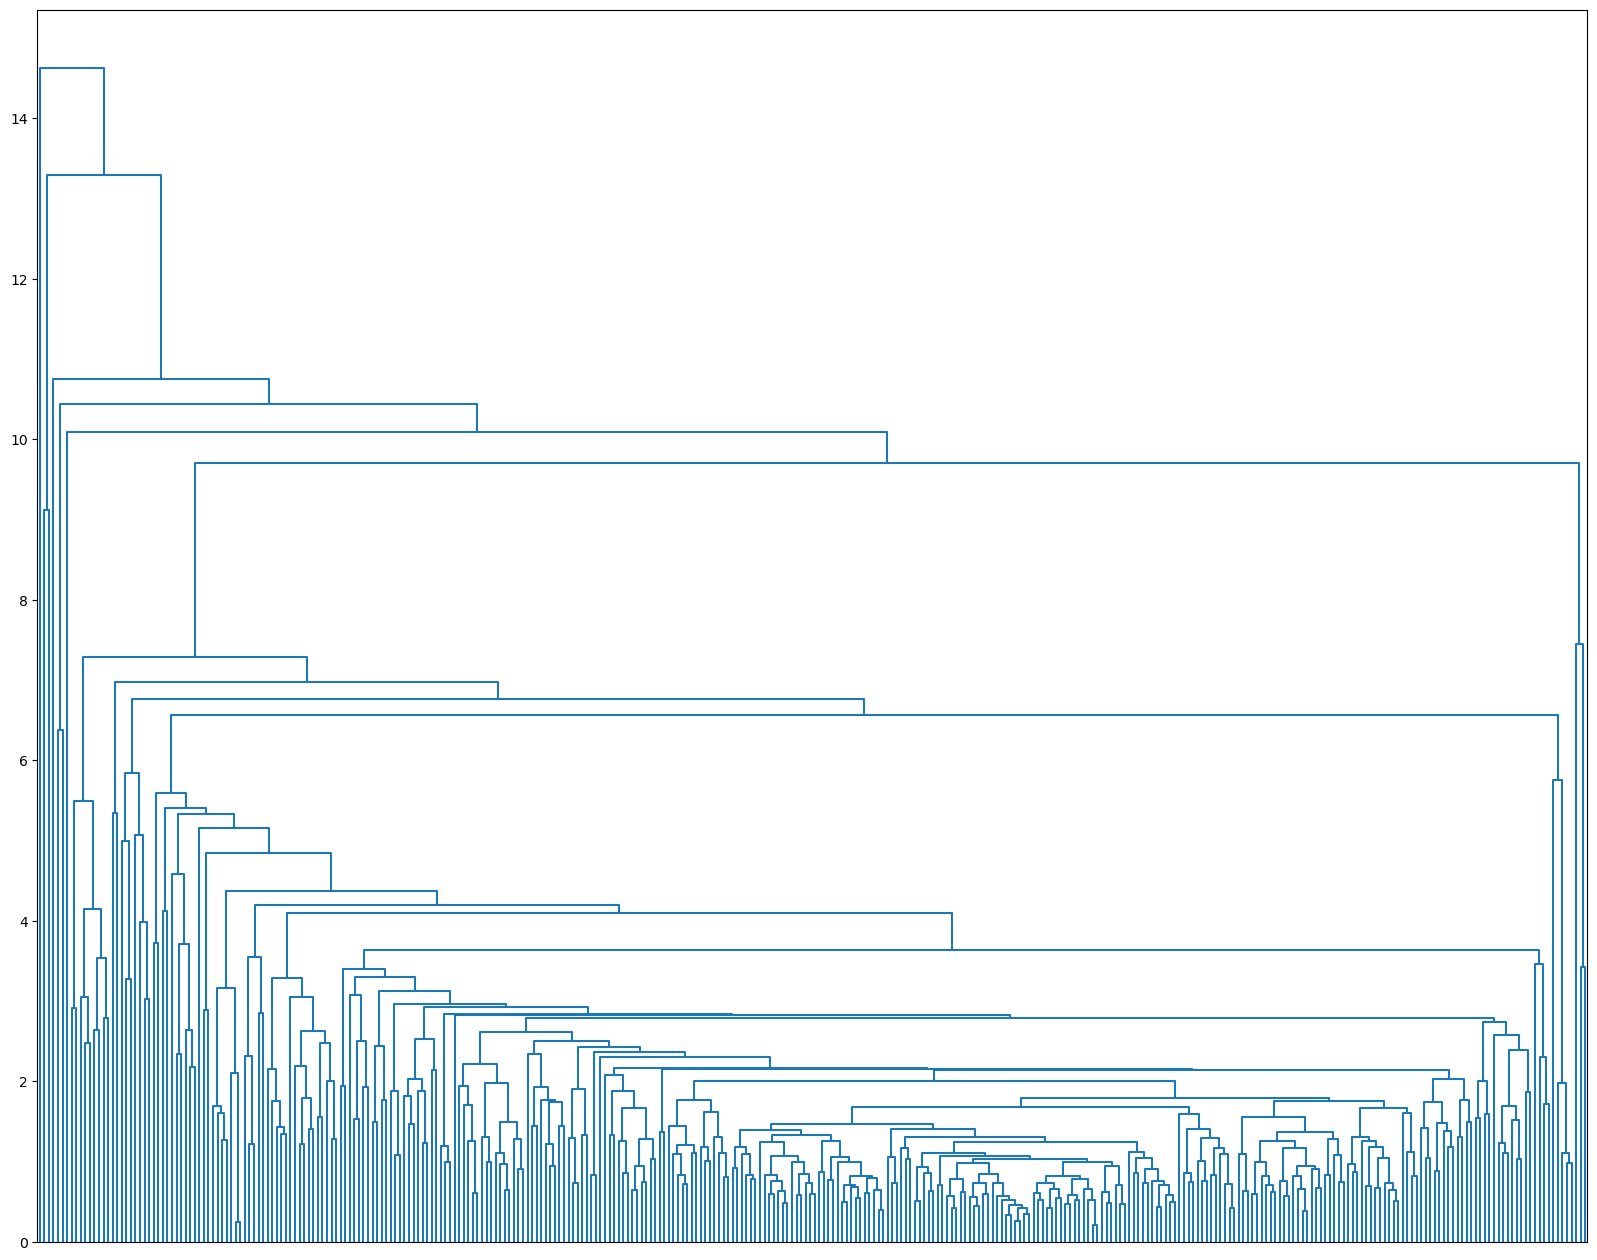

In [559]:
    # Euclidean and average method
Z = linkage(scaled_df, metric="euclidean", method="average")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.savefig("euclidean_average.png", dpi=300, bbox_inches="tight")
plt.show()

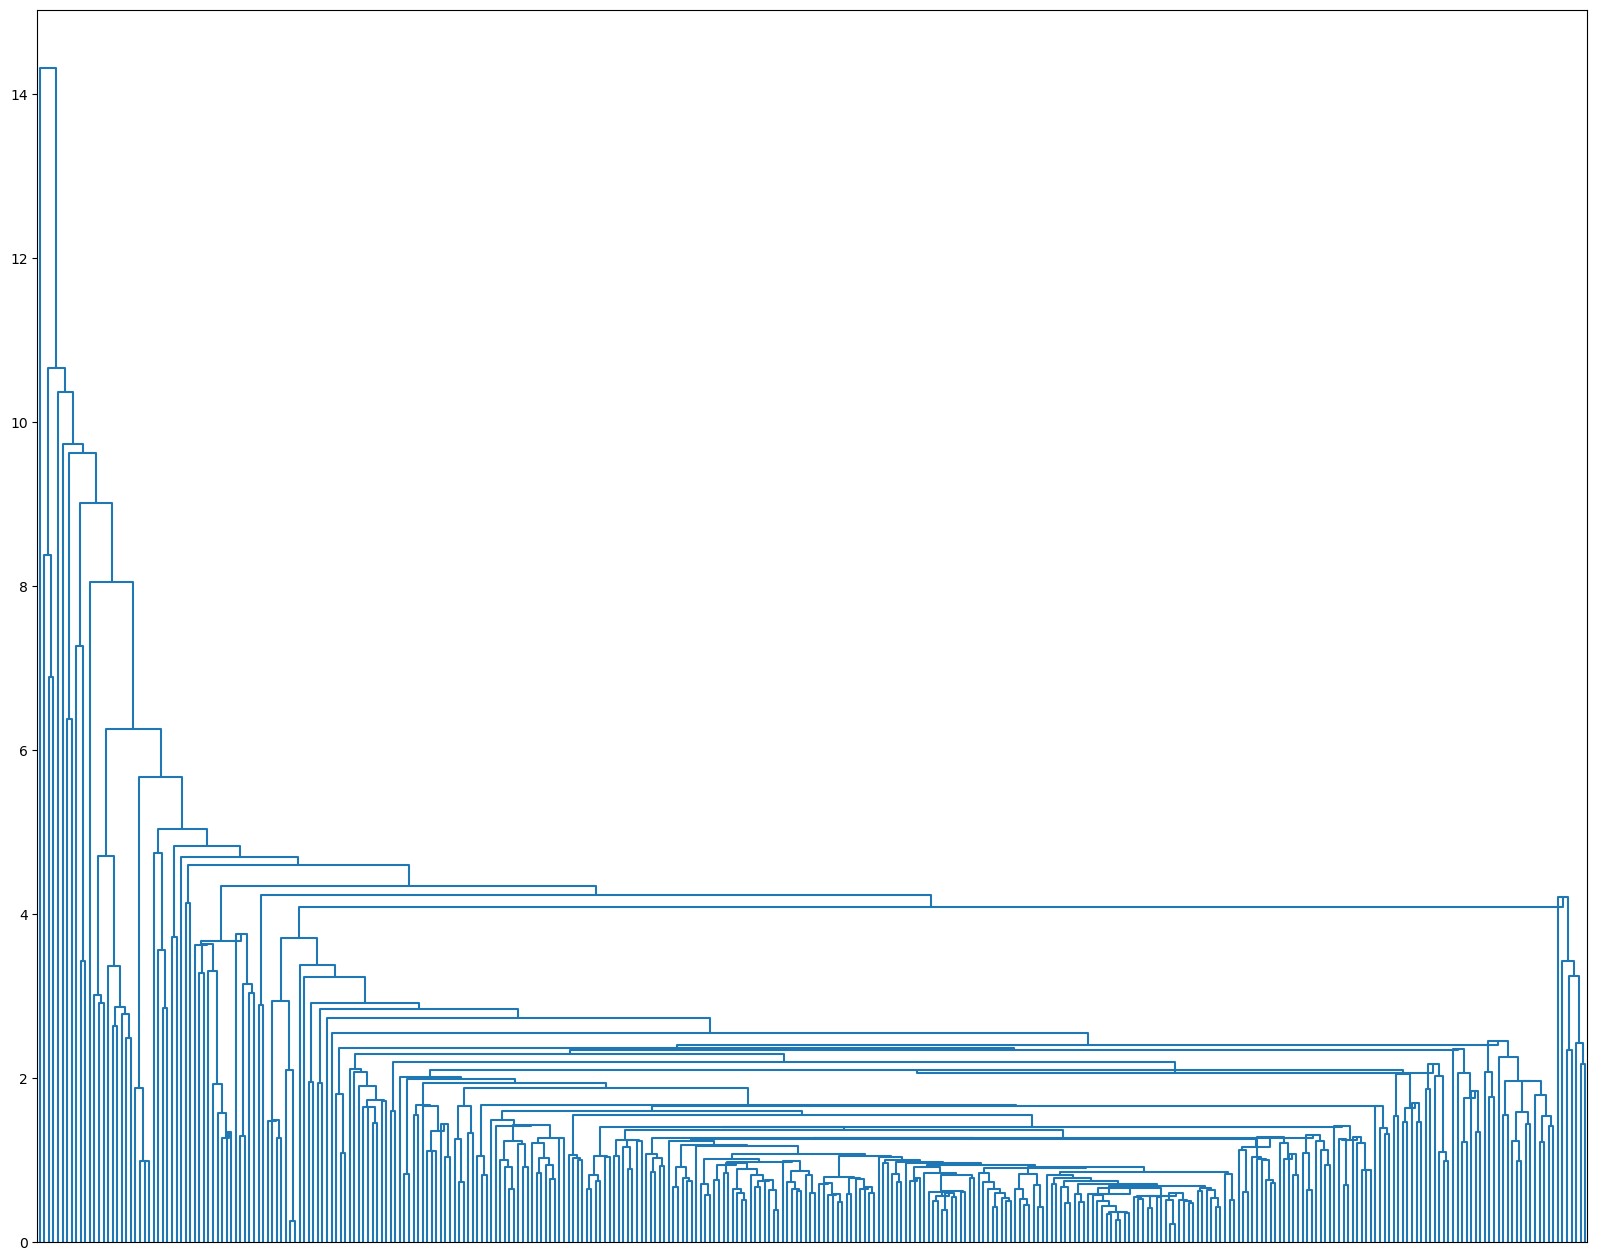

In [560]:
Z = linkage(scaled_df, metric="euclidean", method="centroid")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.savefig("euclidean_centroid.png", dpi=300, bbox_inches="tight")
plt.show()

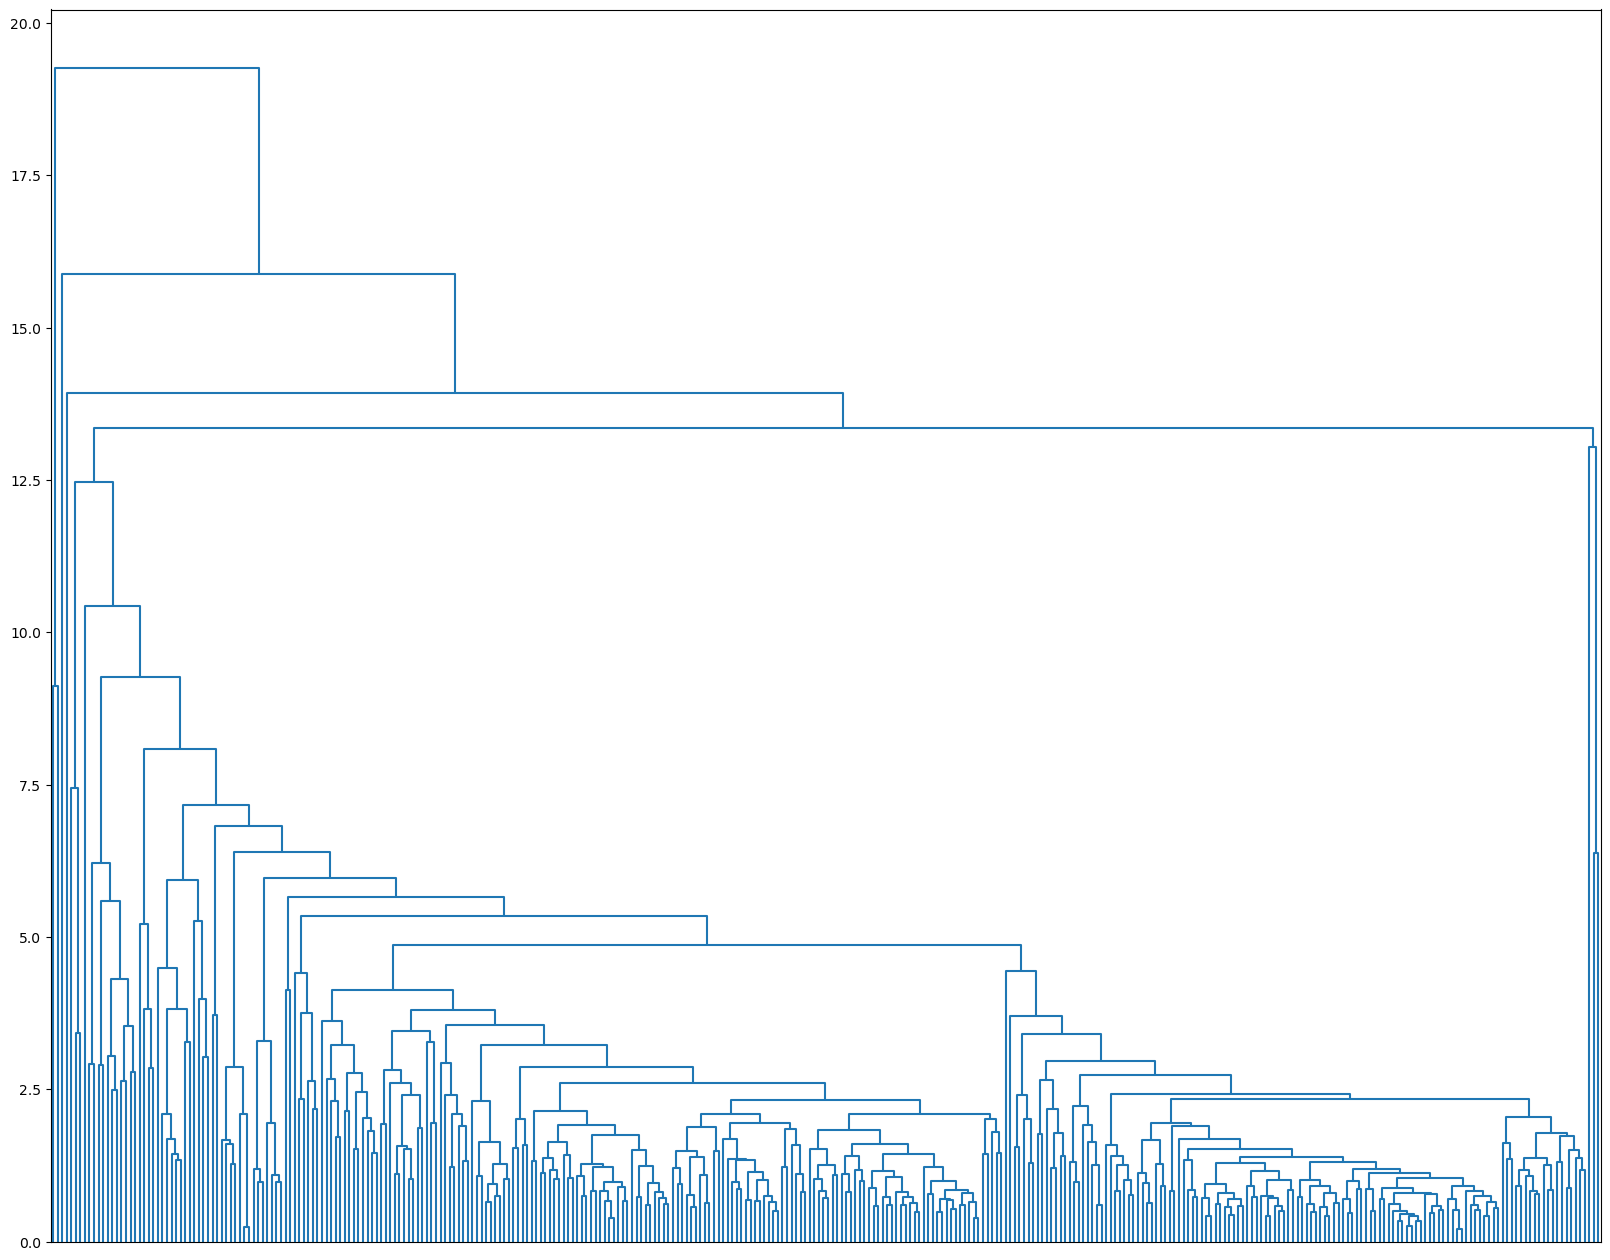

In [561]:
Z = linkage(scaled_df, metric="euclidean", method="weighted")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.savefig("euclidean_weighted.png", dpi=300, bbox_inches="tight")
plt.show()

## Acc to me the Ward method looks more sophisticated in splitting the clusters, Let's comapre with the cophennotic correlation vlaue

In [563]:
# list of distance metrics
distance_metrics = ["euclidean"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "weighted", "ward"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9314012446828154.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101180299865353.


In [564]:
distance_metrics = ["chebyshev", "mahalanobis", "cityblock"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm


Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.8708317490180427.
Cophenetic correlation for Cityblock distance and single linkage is 0.9334186366528574.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7375328863205818.
Cophenetic correlation for Cityblock distance and average linkage is 0.9302145048594667.
Cophenetic corr

### After examining the cophenetic correlation score, we observed that several metrics and methods achieved a high score but have not yet implemented their dendrograms. Therefore, we will explore a few additional dendrograms.

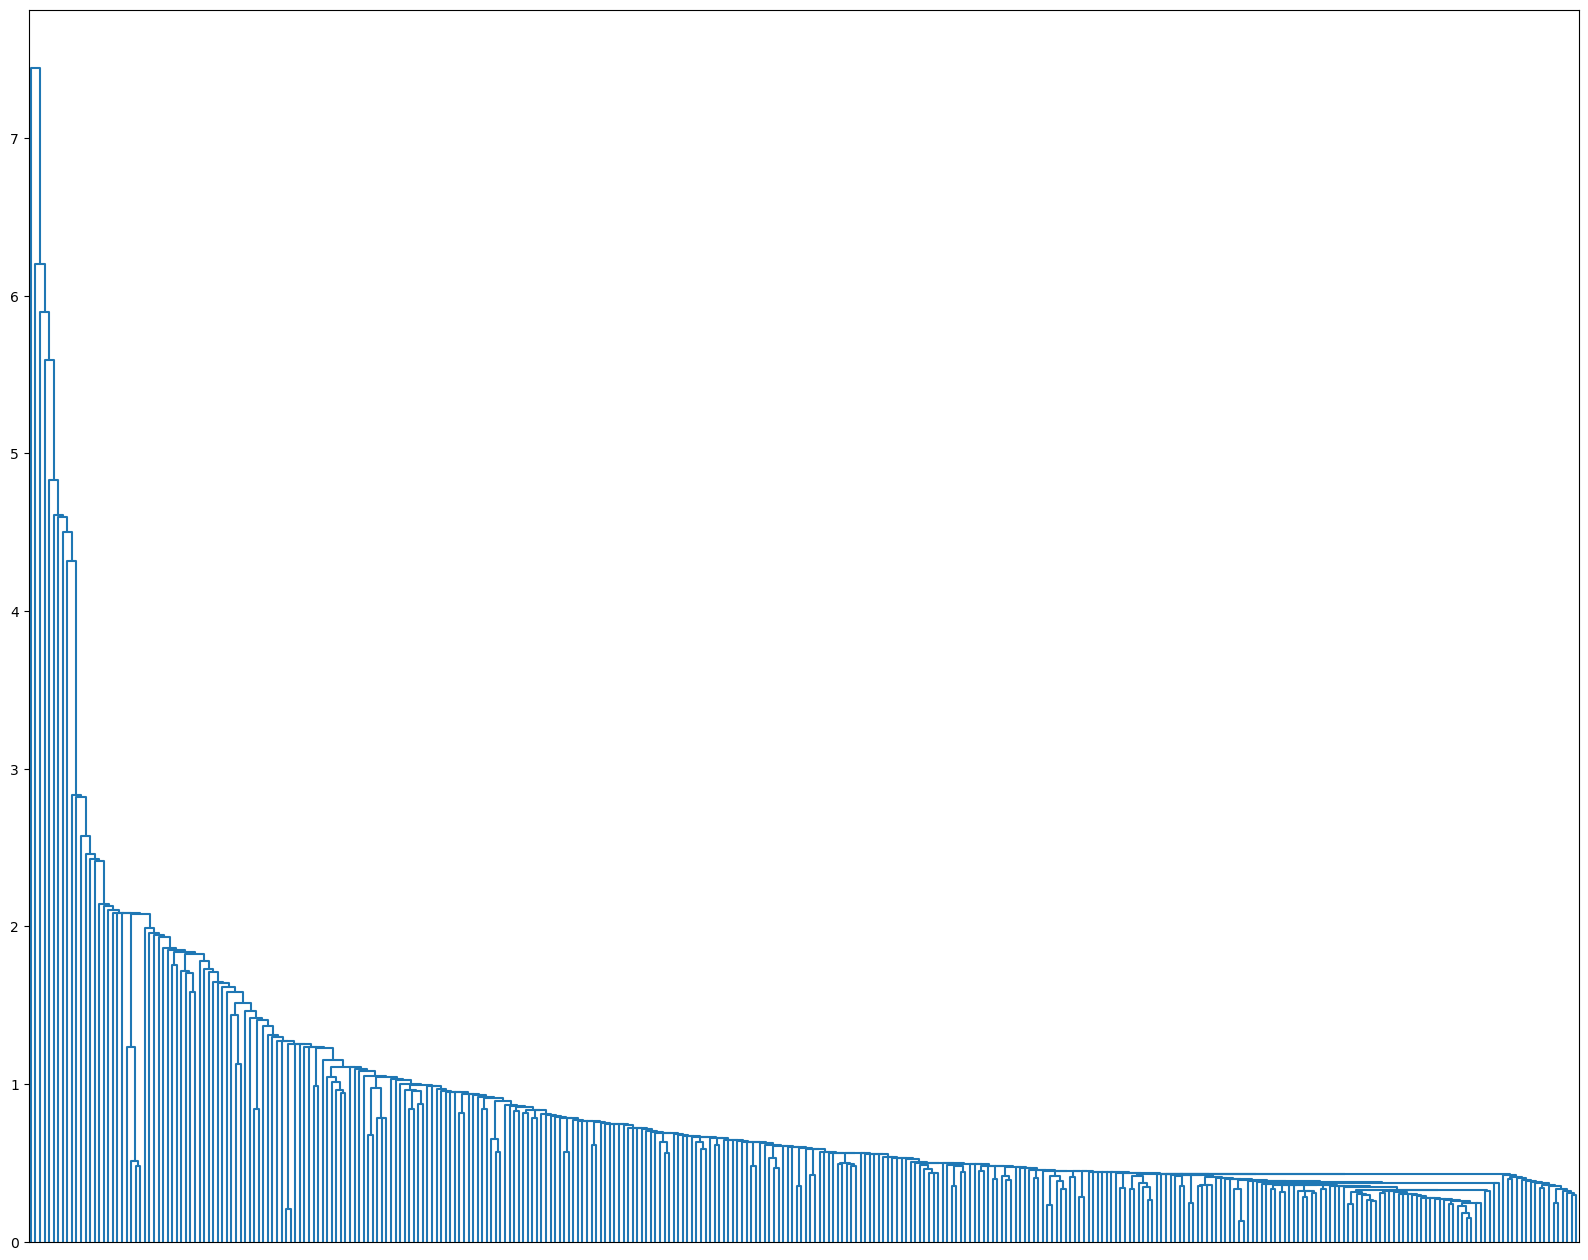

In [566]:
#Chebyshev and Single
Z = linkage(scaled_df, metric="Chebyshev", method="single")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.show()

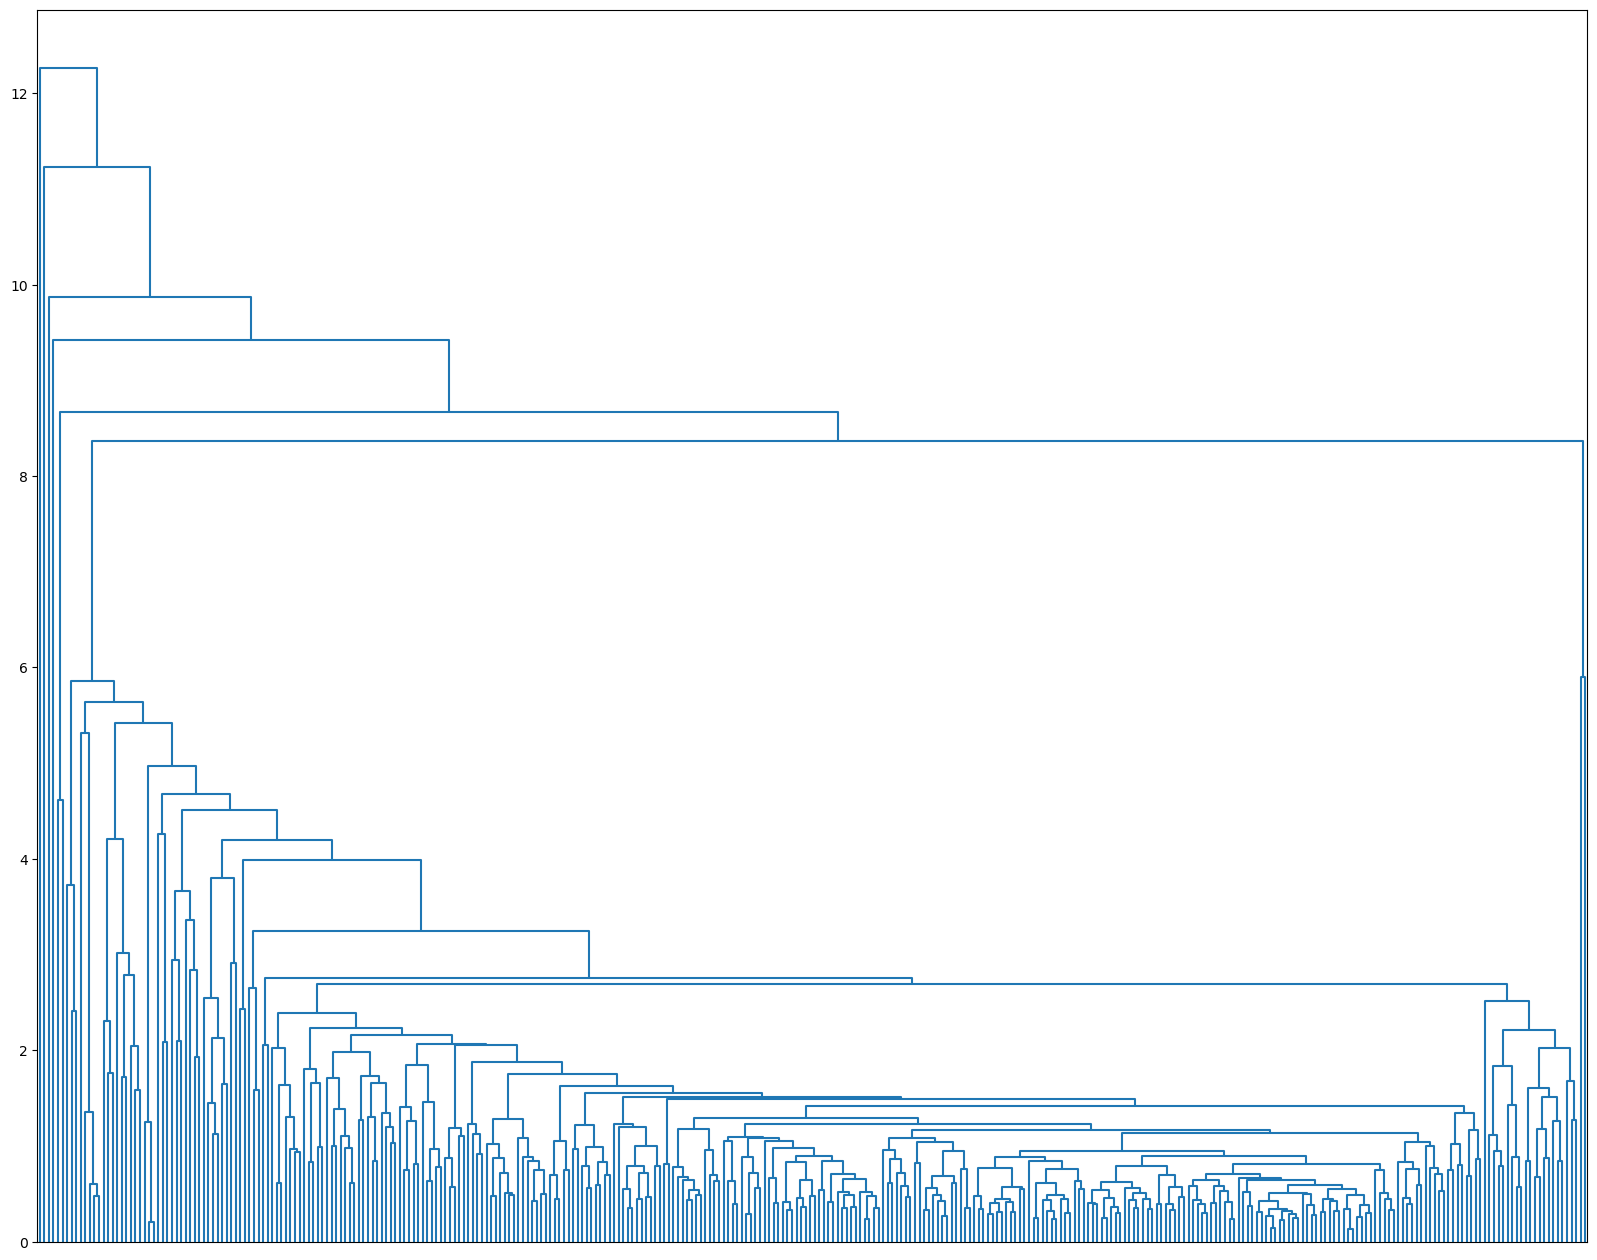

In [567]:
# Chebyshev and Average
Z = linkage(scaled_df, metric="Chebyshev", method="average")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.show()

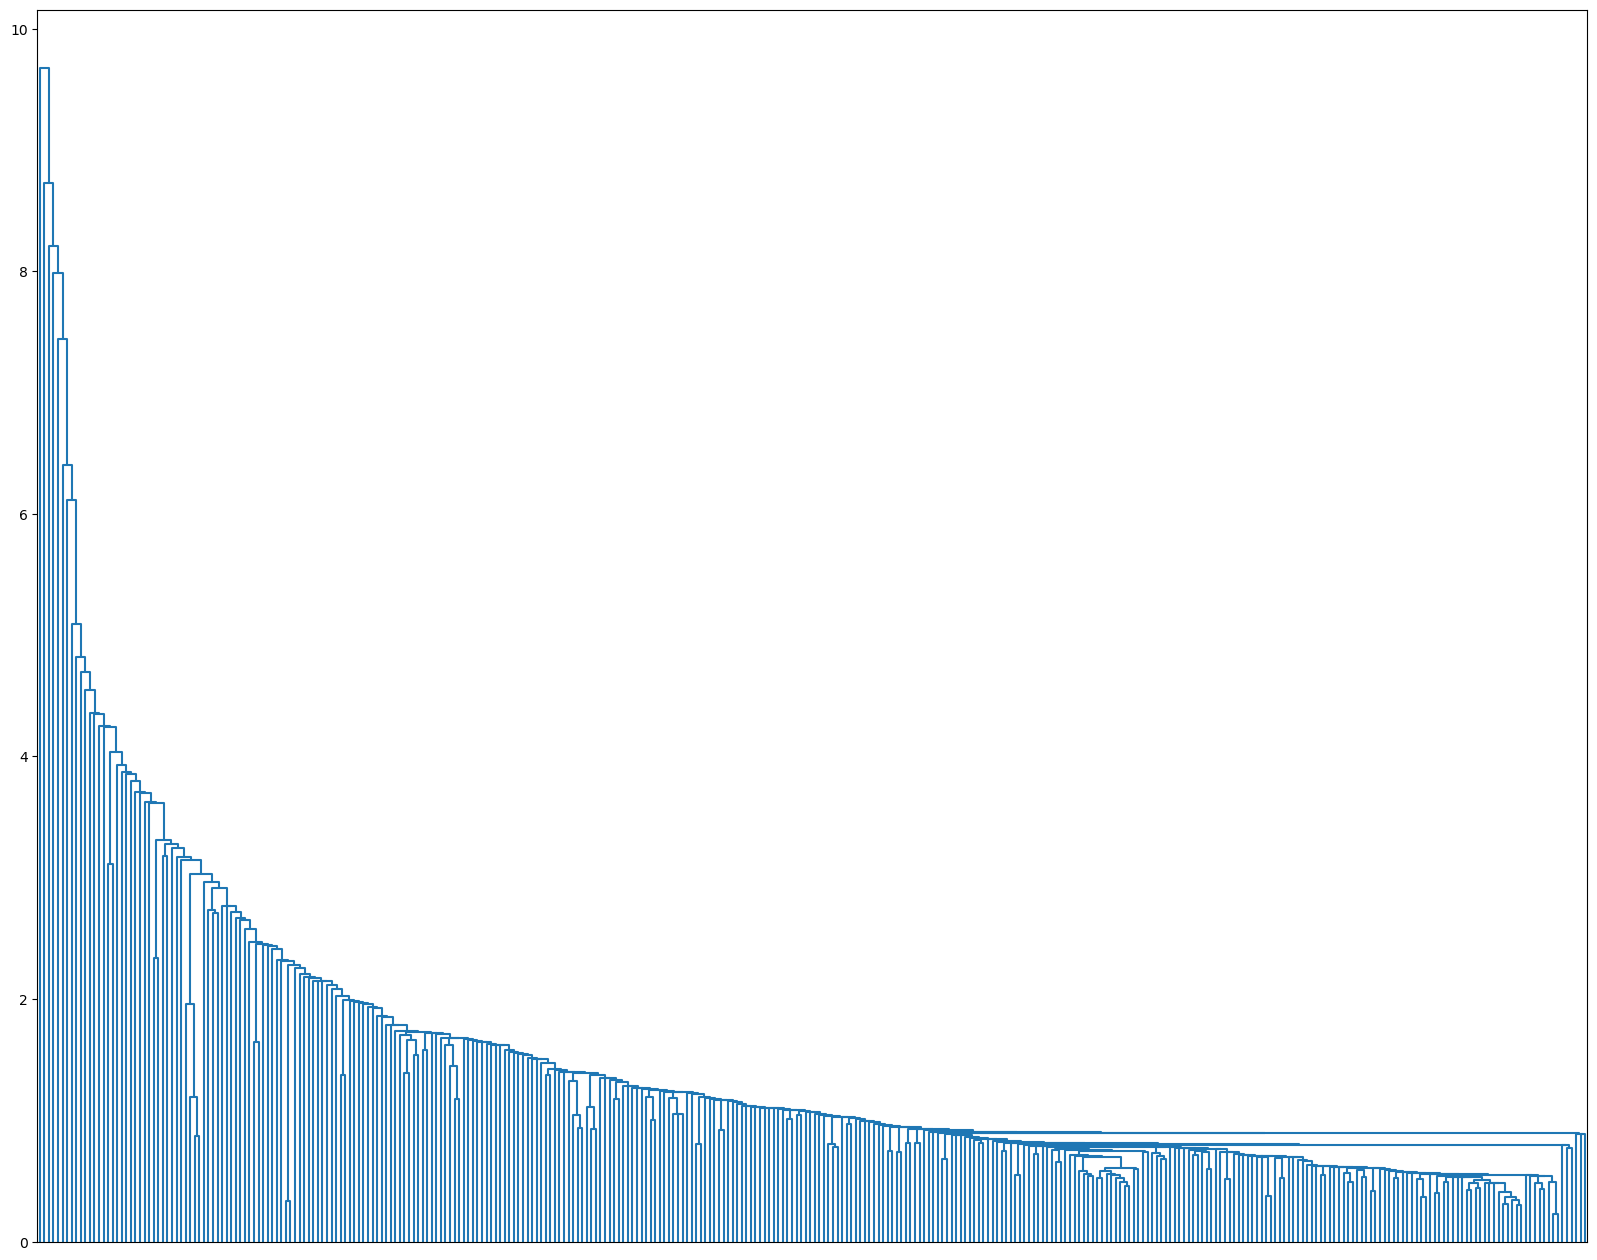

In [568]:
# Mahalanobis and Single
Z = linkage(scaled_df, metric="Mahalanobis", method="single")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.show()

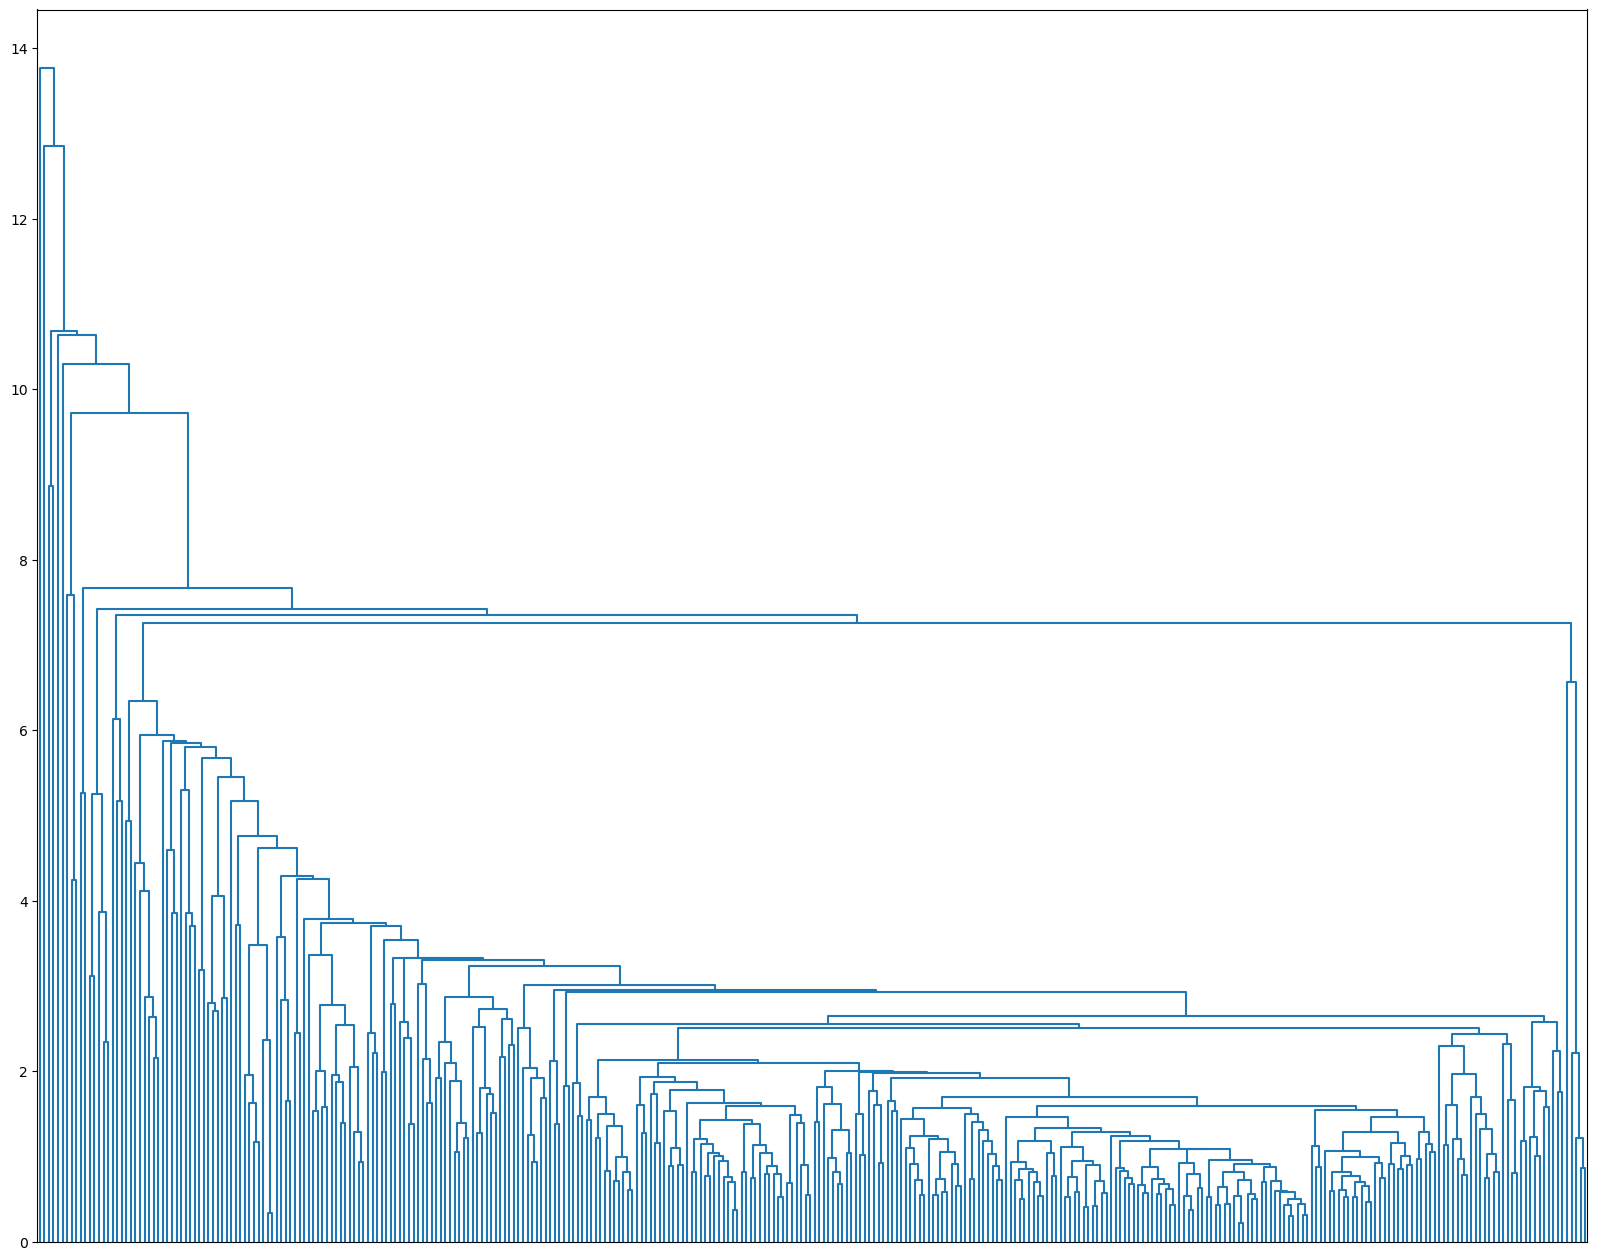

In [569]:
# Mahalanobis and Average 
Z = linkage(scaled_df, metric="Mahalanobis", method="average")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.show()

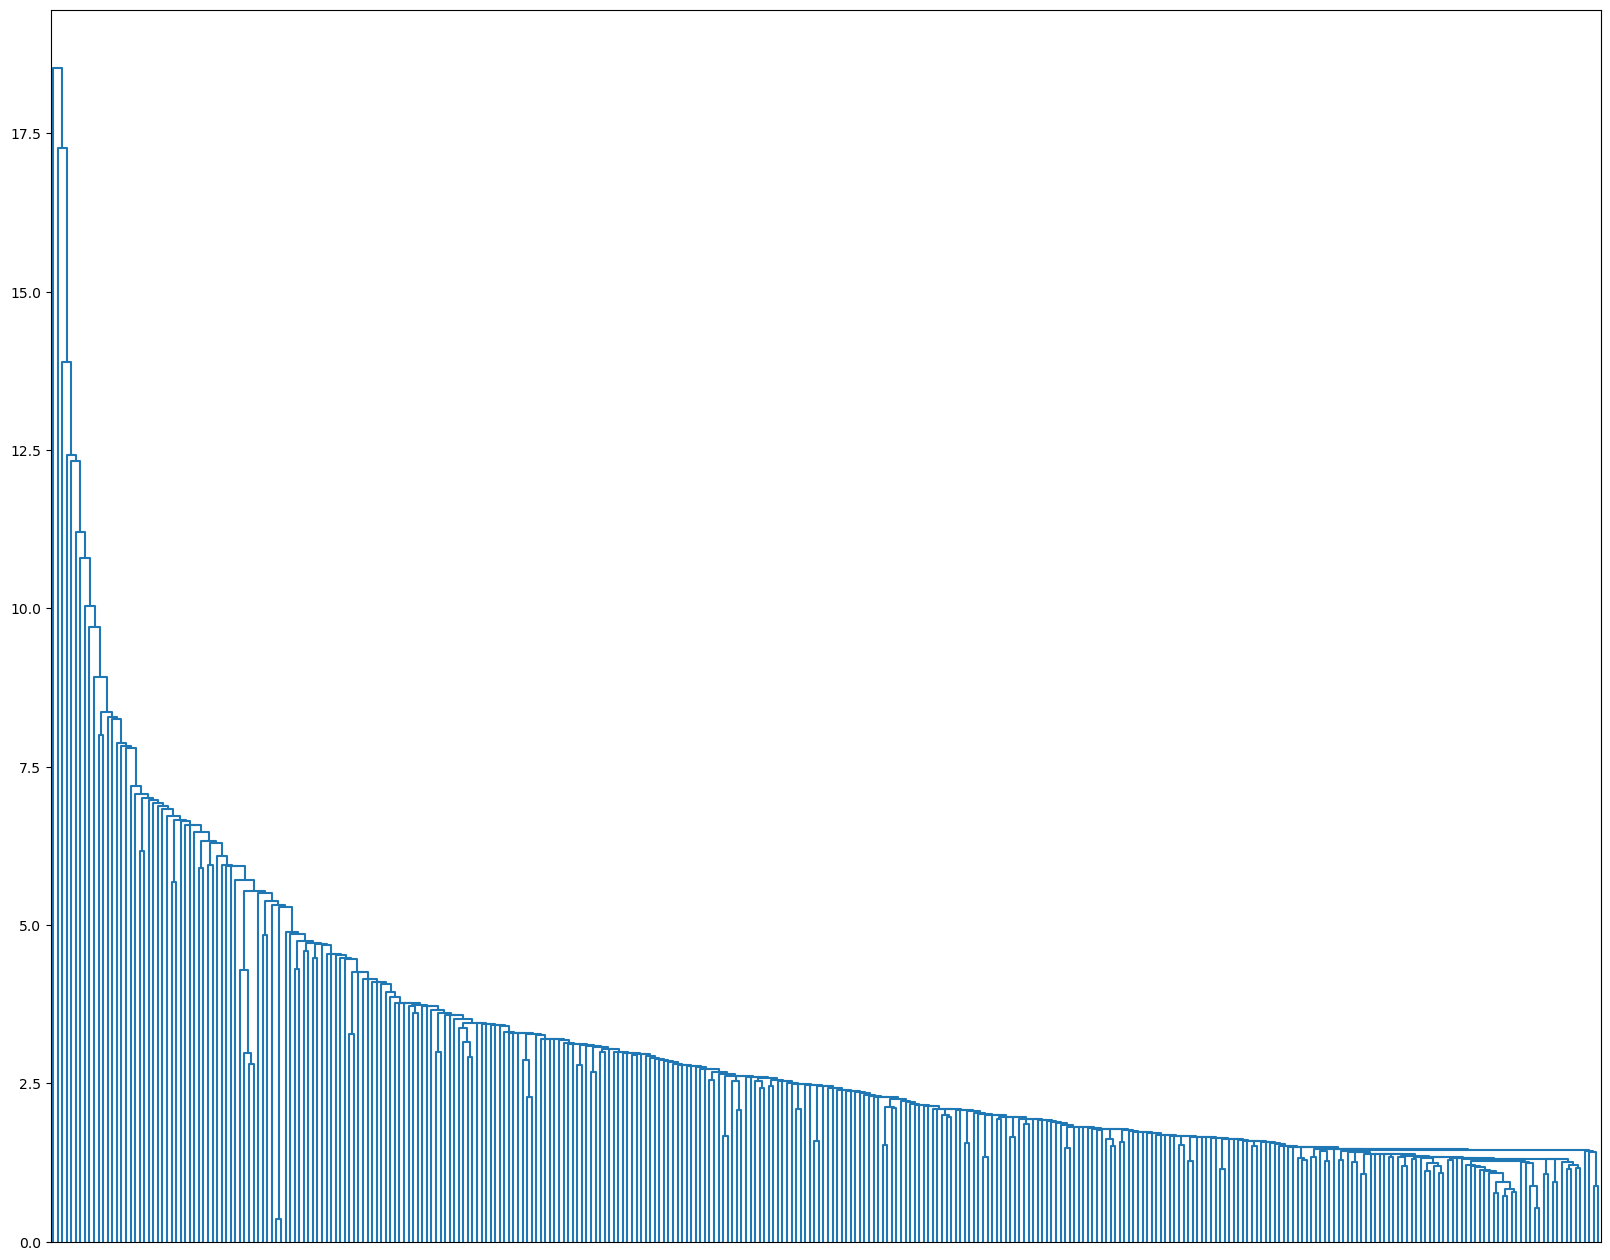

In [570]:
# Cityblock and Single 
Z = linkage(scaled_df, metric="Cityblock", method="single")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.show()

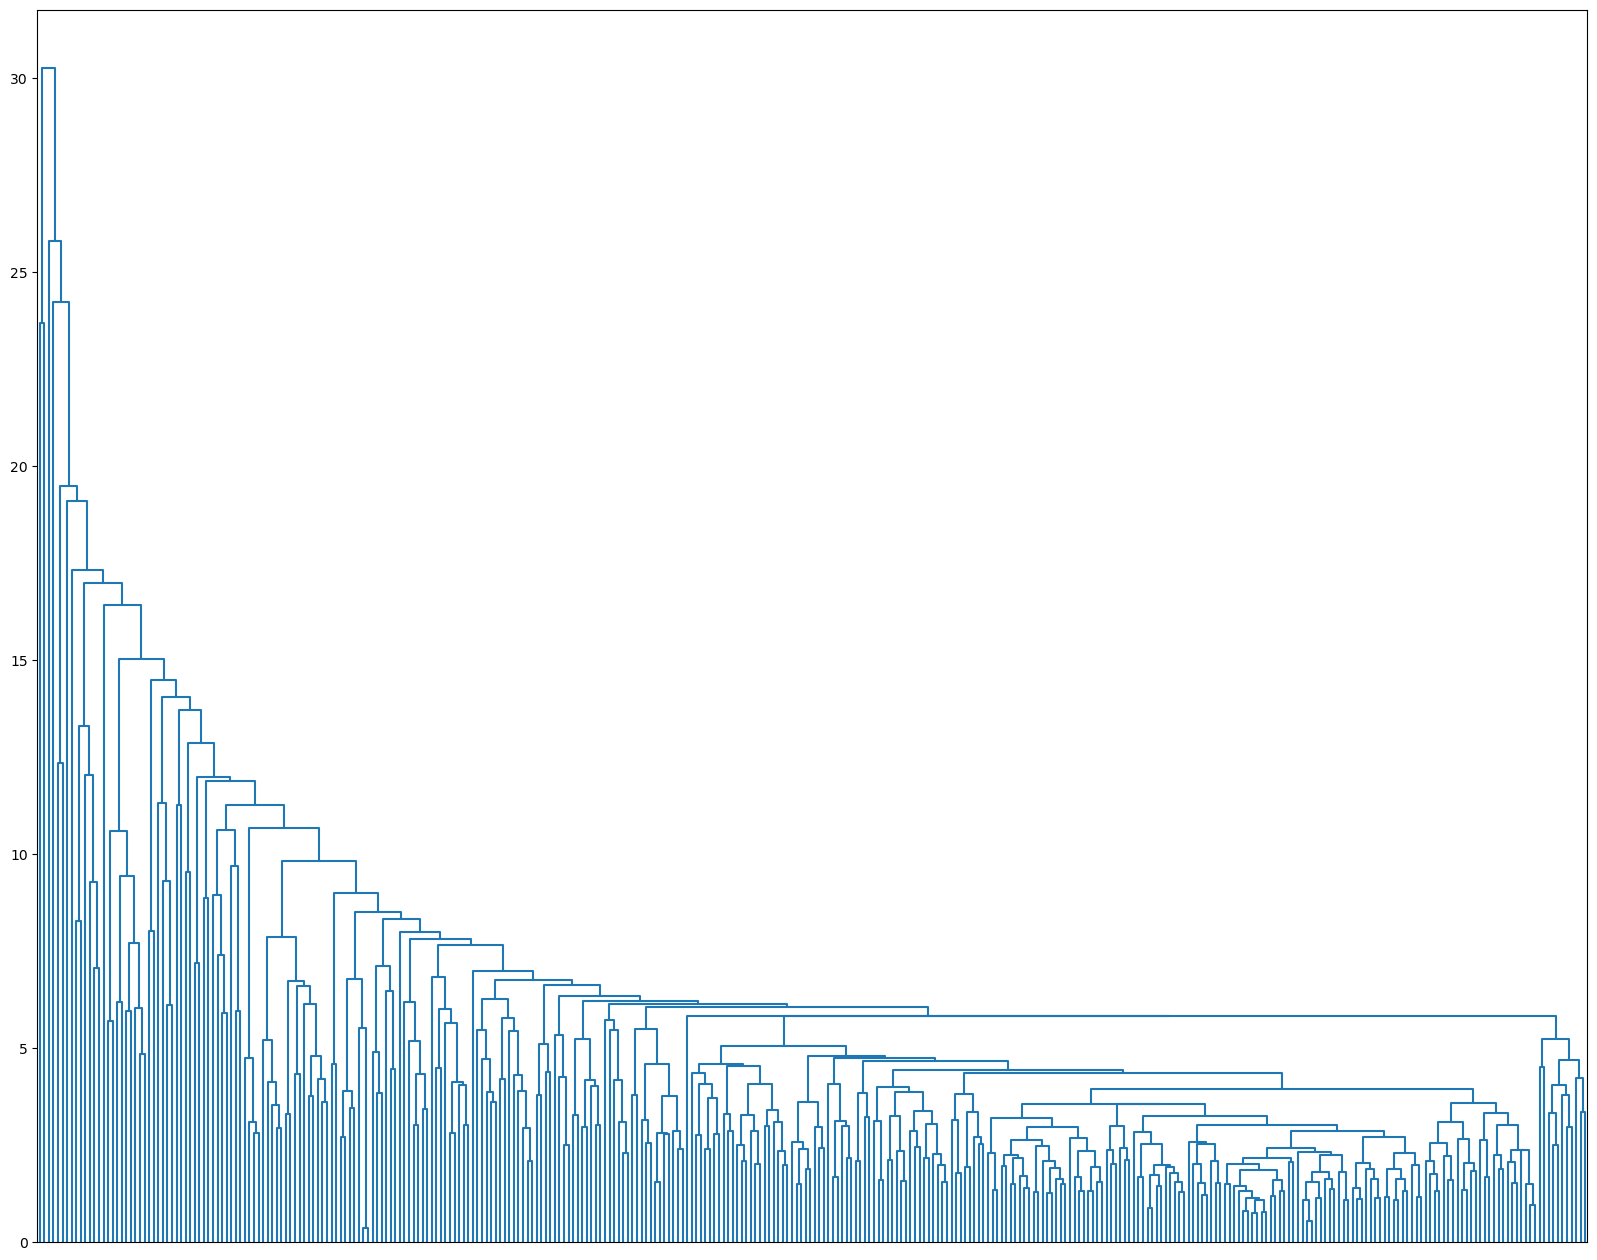

In [571]:
# Cityblock and Average 
Z = linkage(scaled_df, metric="Cityblock", method="average")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.show()

### Even after looking into other dendrograms I find Euclidean and Ward a better option for the following reasons
#### - It has a balanced cluster formation
#### - The height differences between merged clusters are more prominent, making it easier to determine the optimal number of clusters.

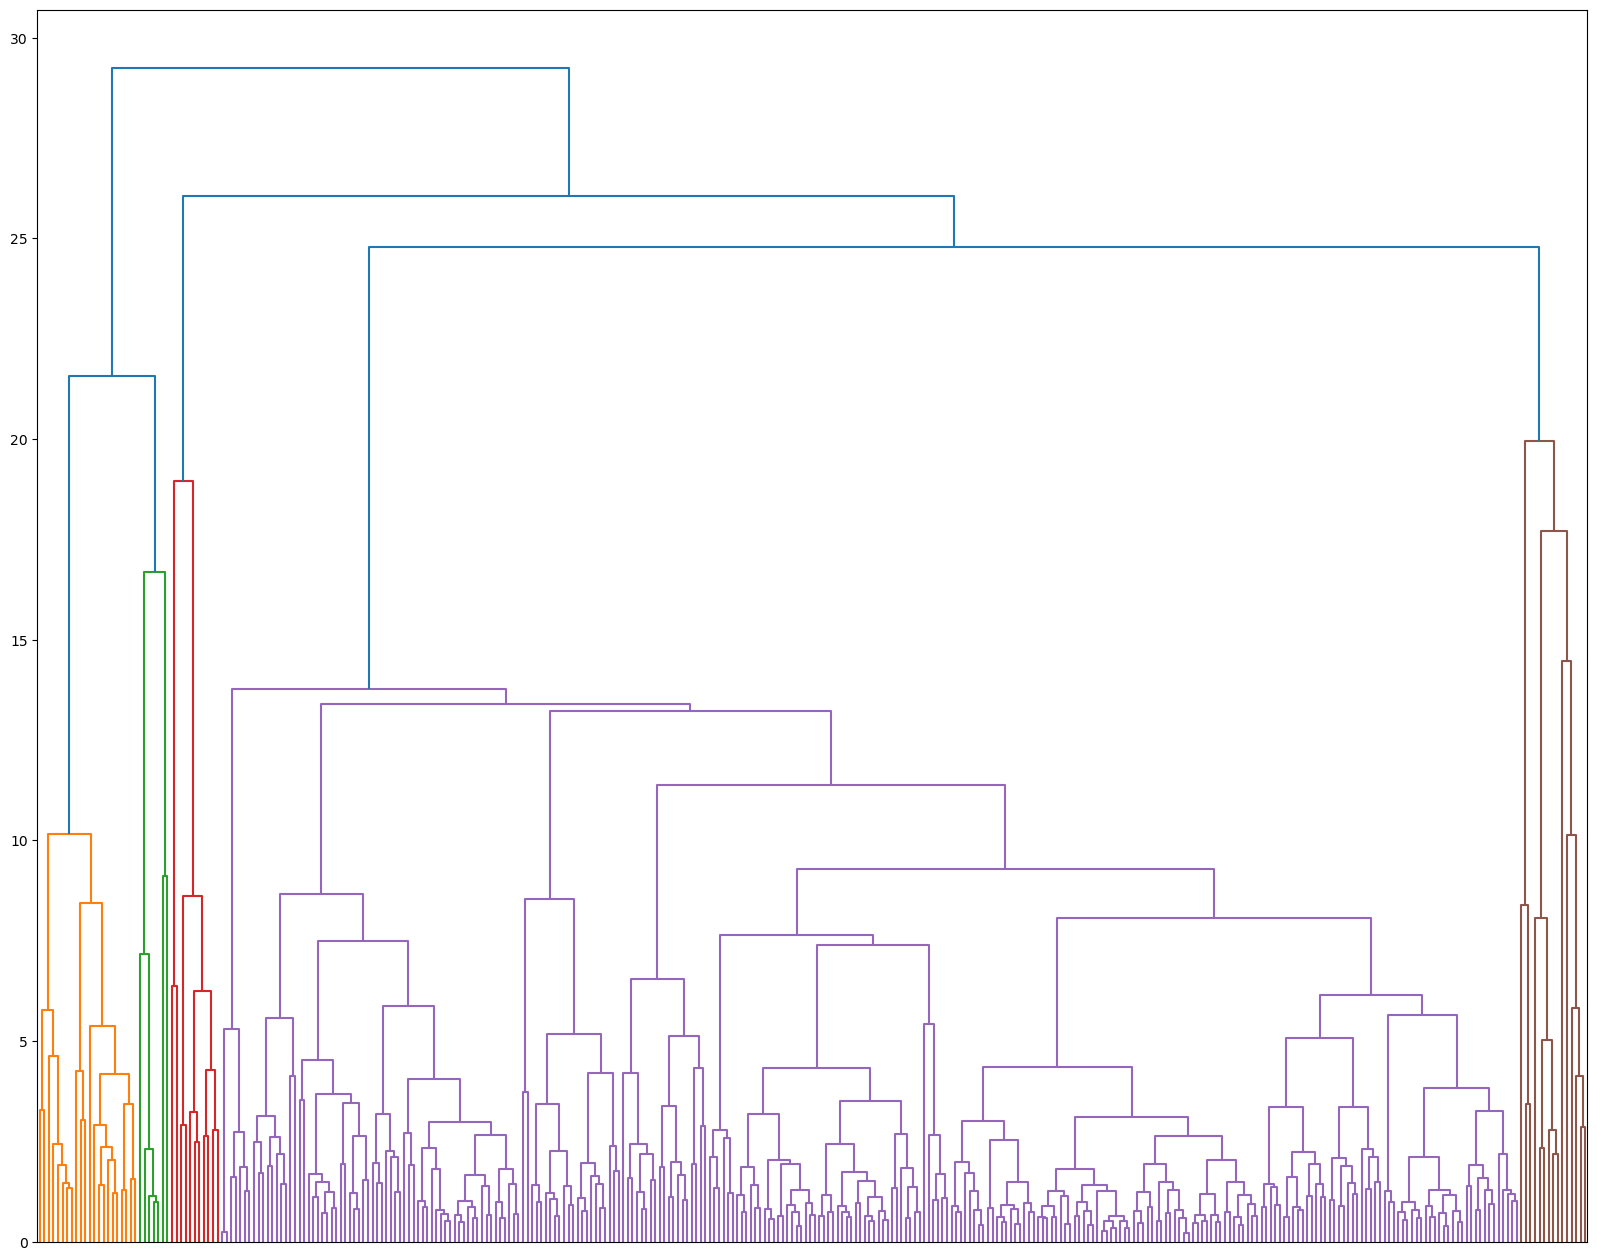

In [573]:
# Euclidean and Ward method
Z = linkage(scaled_df, metric="euclidean", method="ward")
fig = plt.figure(figsize=(20, 16))
dendrogram(Z, no_labels=True, color_threshold=21)
plt.savefig("euclidean_ward.png", dpi=300, bbox_inches="tight") 
plt.show()

### A reasonable cut-off can be placed at a height of around 17 to 23. Cutting at this height results in 4 to 6 distinct clusters. I find the optimal cut-off as 21, It gives us 5 Clusters

In [575]:
HCmodel = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage="ward")
HCmodel.fit(scaled_df)

AgglomerativeClustering(n_clusters=5)

In [576]:
# adding hierarchical cluster labels to the original dataframes
stock_df["HC_Clusters"] = HCmodel.labels_

In [577]:
stock_df.head()

,Security,Gics Sector,Gics Sub Industry,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,kmeans_clusters,HC_Clusters
Ticker Symbol,,,,,,,,,,,,,,,,
AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0,3
ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0,3
ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0,3
ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0,3
ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,2,3


In [578]:
cluster_profile_HC = stock_df.groupby("HC_Clusters").mean(numeric_only=True)

In [579]:
cluster_profile_HC["count_in_each_segments"] = (
    stock_df.groupby("HC_Clusters")["Security"].count().values
)

In [580]:
#stock_df.head()

In [581]:
cluster_profile_HC.style.highlight_max(color="Yellow", axis=0).highlight_min(color="lightgreen", axis=0)


,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,kmeans_clusters,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,2.133333,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,3.000000,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,1.000000,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,0.154386,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,4.000000,22


<Axes: xlabel='HC_Clusters'>

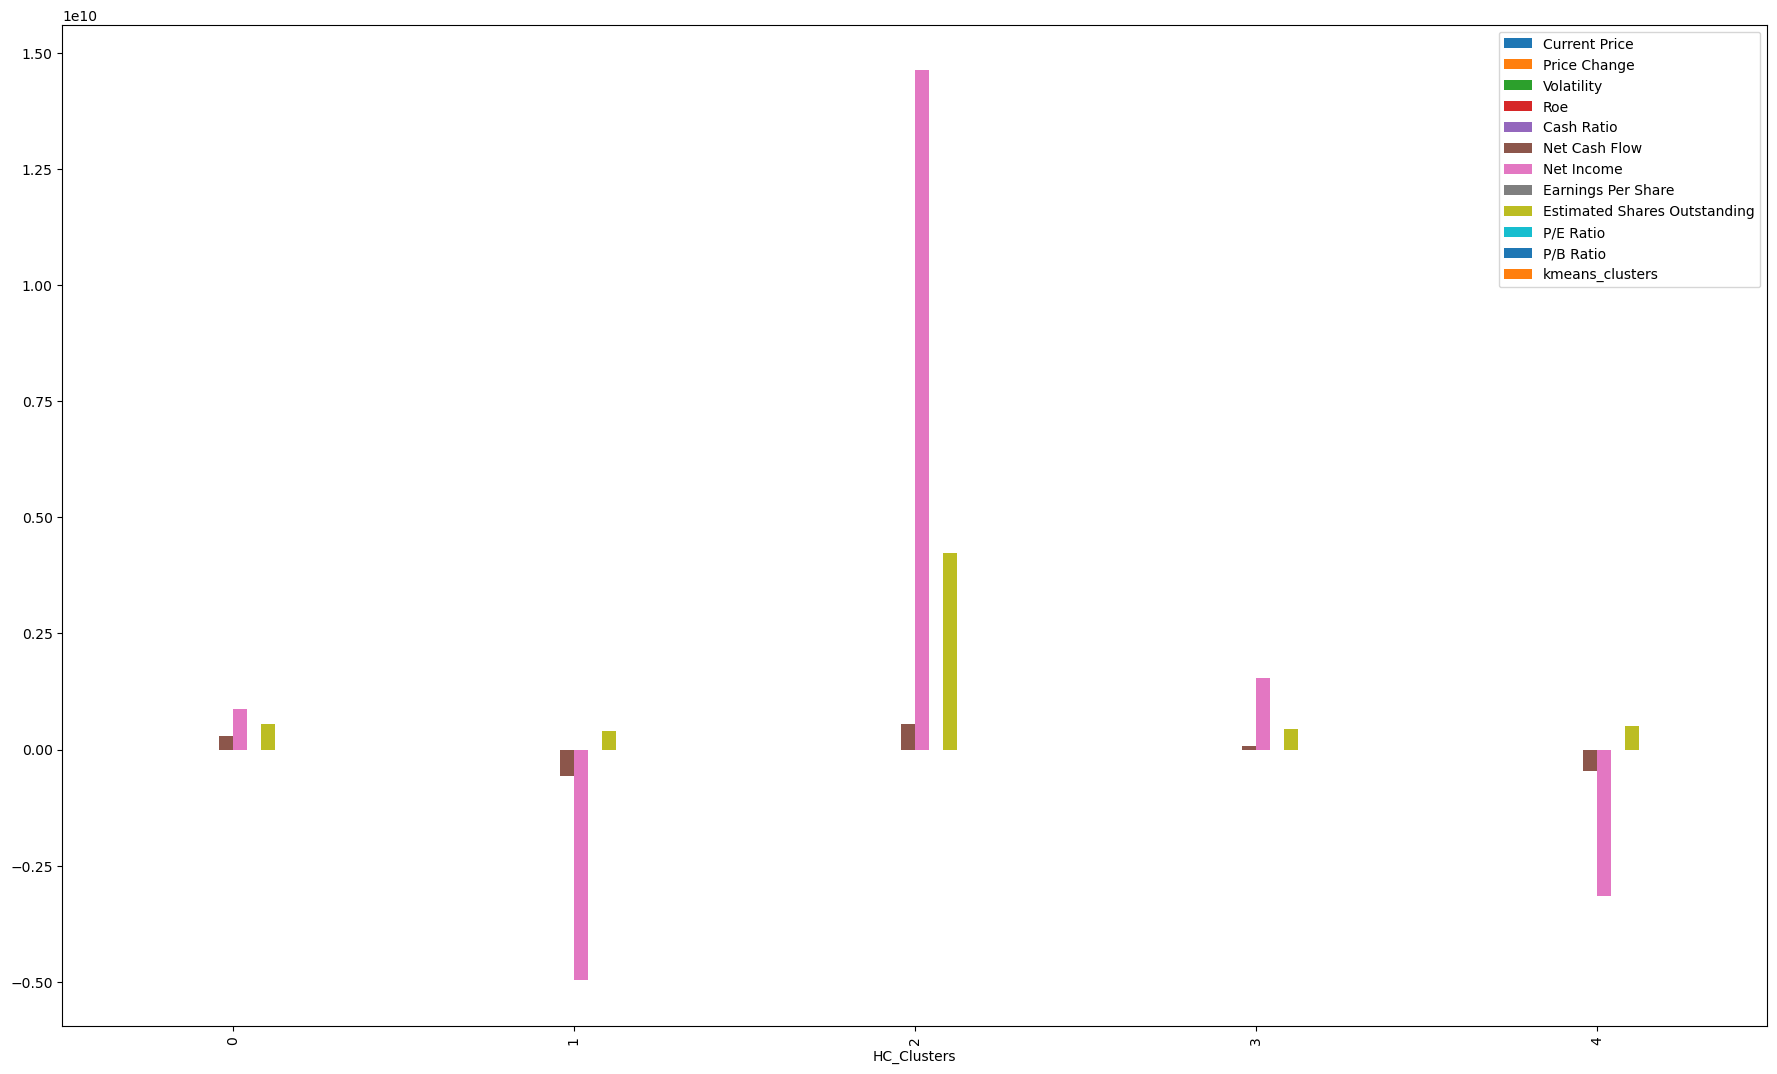

In [582]:
stock_df.groupby("HC_Clusters").mean(numeric_only=True).plot.bar(figsize=(22, 13))

### Insights and Business Recommendations
#### Cluster 0:
- ##### **Insight**: This cluster consists of high-value stocks with strong earnings and profitability. Despite moderate volatility, these stocks show strong growth potential. 
- ##### **Business Recommendation**: Ideal for long-term investors seeking growth stocks with consistent earnings and high returns. Moderate risk but high reward potential.
#### Cluster 1:
- ##### **Insight**: This cluster contains highly volatile and financially unstable stocks. Despite extremely high ROE, the negative net income and EPS indicate unsustainable profitability.
- ##### **Business Recommendation**: Investors should exercise caution. These stocks may be turnaround candidates but are extremely high-risk. Suitable for speculative investors only.
#### Cluster 2:
- ##### **Insight**: This cluster consists of financially strong large-cap stocks with stable price growth. Low volatility and strong fundamentals make this a low-risk investment group.
- ##### **Business Recommendation**: Best suited for conservative investors and long-term portfolio diversification. These are blue-chip stocks with stable returns and strong fundamentals.
#### Cluster 3:
- ##### **Insight**: This is the largest cluster and consists of moderately risky stocks with stable growth. The positive ROE, net income, and EPS indicate healthy financials.
- ##### **Business Recommendation**: These stocks are ideal for diversified portfolios and are suitable for mid-risk investors who want steady returns with moderate volatility.
#### Cluster 4:
- ##### **Insight**: This cluster consists of declining stocks with extreme price drops and high volatility. Despite moderate ROE, the negative earnings and net income make these very risky investments.
- ##### **Business Recommendation**: Avoid for long-term investments. These stocks may be short-term speculative opportunities but carry high risk.

In [584]:
for cl in stock_df["HC_Clusters"].unique():
    print("In cluster {}, there are following Companies:".format(cl))
    print(stock_df[stock_df["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 3, there are following Companies:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 

#### Let us implement PCA, And use the components to form the clusters 

### PCA

In [587]:
scaled_df.head()

,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


In [588]:
from sklearn.decomposition import PCA
mypca=PCA()
mypca.fit(scaled_df)
print(mypca.components_)

[[-0.18335823 -0.27666842  0.42919618  0.30106508 -0.08417114 -0.03368814
  -0.51091003 -0.5033668  -0.22120756  0.20815091 -0.00991673]
 [ 0.5774047   0.18815749  0.04101083 -0.06258117  0.32773726  0.1280034
  -0.25155831  0.18433241 -0.36327549  0.37736302  0.360796  ]
 [-0.17770732  0.04646452  0.18283759  0.00473711  0.53919175  0.1855024
   0.20918754 -0.27531285  0.58166569  0.24934832  0.2959799 ]
 [-0.00900284  0.65971773 -0.38664453  0.53431652  0.0838151  -0.13655589
  -0.12101272 -0.26011429  0.02333621 -0.00303257 -0.14551133]
 [ 0.39287414 -0.12202474  0.14571667  0.12446023 -0.1588855  -0.56275703
   0.17221048  0.06902206  0.32807051  0.47228787 -0.29493986]
 [ 0.04539895  0.07374983 -0.01301984 -0.04924358 -0.1433002   0.69439441
   0.07660902 -0.02703535  0.00607268  0.39241333 -0.571456  ]
 [ 0.34597383 -0.32918961  0.06740711  0.69551664 -0.04384053  0.31995867
   0.15598116  0.16995766  0.13220581 -0.30317218  0.12940702]
 [ 0.03785302 -0.10485332  0.17805858  0.00

In [589]:
print(mypca.explained_variance_ratio_)

[0.22770322 0.14358674 0.120947   0.10089366 0.09907929 0.08670985
 0.0749892  0.06503908 0.04391604 0.02568457 0.01145135]


In [590]:
print(np.cumsum(mypca.explained_variance_ratio_))

[0.22770322 0.37128996 0.49223695 0.59313061 0.6922099  0.77891975
 0.85390895 0.91894803 0.96286408 0.98854865 1.        ]


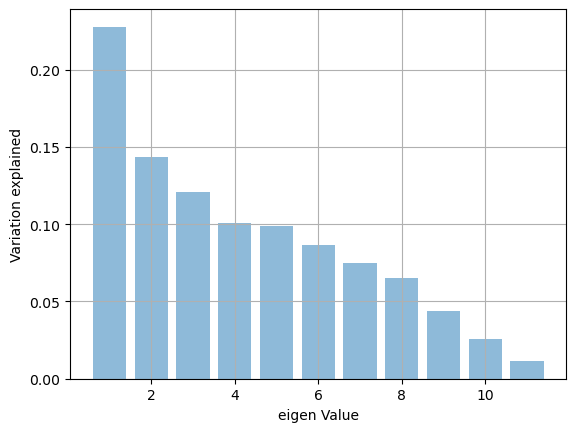

In [591]:
plt.bar(list(range(1,12)),mypca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.grid(True)
plt.show()

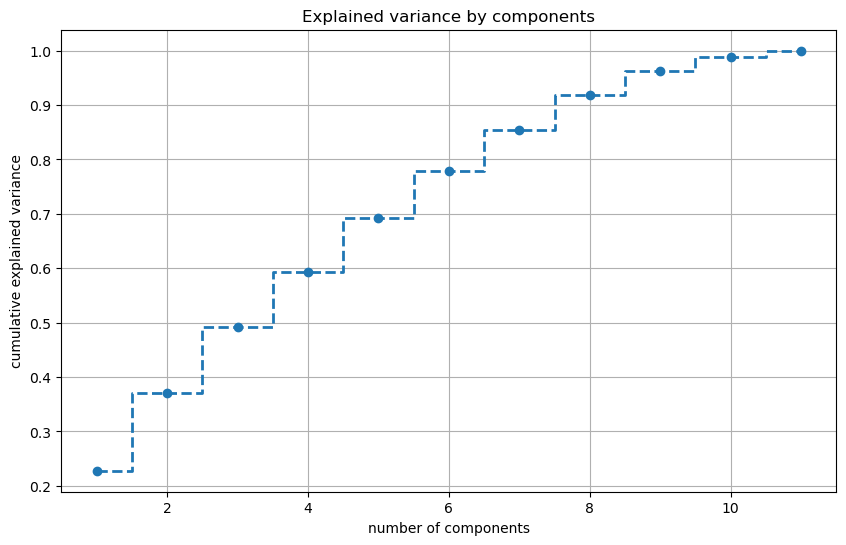

In [592]:
fig = plt.figure(figsize=(10,6))
plt.step(list(range(1,12)),mypca.explained_variance_ratio_.cumsum(),  where="mid",marker="o", linestyle = "--", linewidth=2)
plt.title('Explained variance by components')
plt.xlabel('number of components')
plt.ylabel("cumulative explained variance")
plt.grid(True)
plt.show()

### Seven components would cover 85% of the variance in the data.

In [594]:
mypca7=PCA(n_components=7, random_state=1)
pca7_df = pd.DataFrame(mypca7.fit_transform(scaled_df), columns=["PC1" , "PC2" , "PC3", "PC4", "PC5", "PC6" , "PC7"])

In [595]:
pca7_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.228300,-0.915282,-0.314396,0.330916,0.407275,-0.121342,0.920151
1,-0.132905,-1.024312,0.988017,0.281161,0.716609,0.185424,0.880215
2,-1.071312,-0.751996,0.798471,0.314448,-0.276986,0.218053,0.054897
3,-0.126537,1.176945,0.915497,0.626794,0.001351,-0.076122,-0.885556
4,0.576854,1.113511,3.399115,-0.280629,1.622087,0.918350,-0.954562


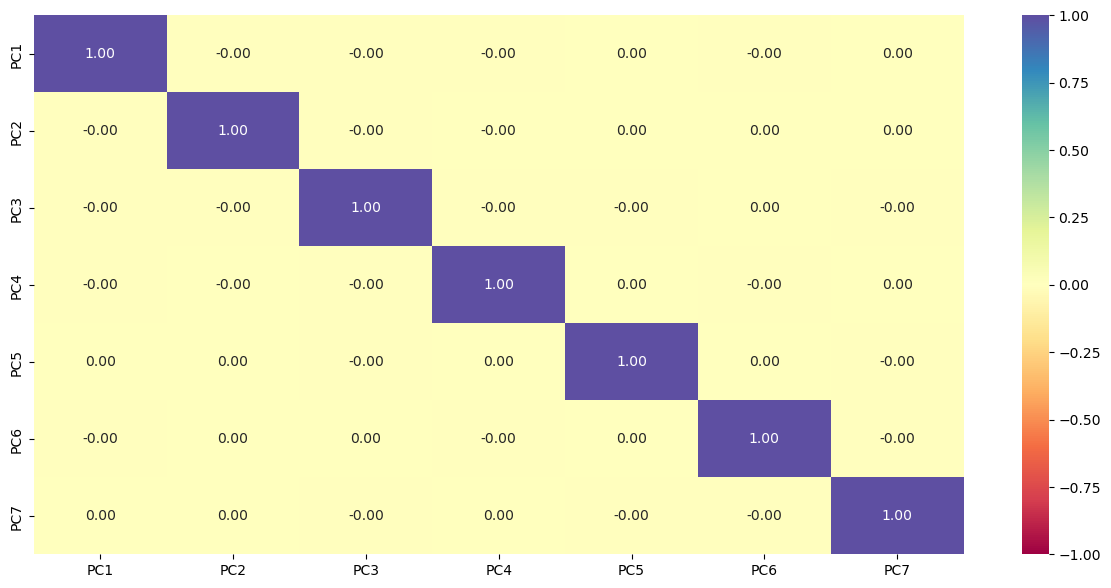

In [596]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    pca7_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### All the PCs are independent of each other.

### Let's start with K-Means Clustering

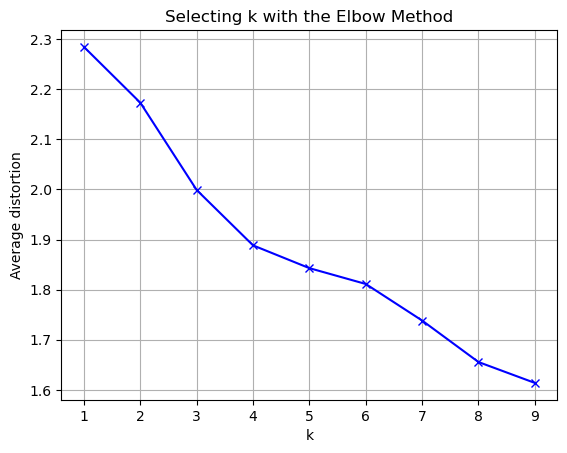

In [599]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(pca7_df)
    prediction = model.predict(pca7_df)
    distortion = (
        sum(
            np.min(cdist(pca7_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / pca7_df.shape[0]
    )

    meanDistortions.append(distortion)

    #print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.grid(True)
plt.show()

### The Elbow method suggests 4, let's take a look at what the knee locater suggests

In [601]:

k_values = [1,2,3,4,5,6,7,8,9]
wcss_values = list(meanDistortions)
k1 = KneeLocator(k_values, wcss_values, curve="convex", direction="decreasing")

# Find the elbow point
elbow_point = k1.elbow
print("Elbow point at:", elbow_point)

Elbow point at: 4


### Knee locator also suggests 4; let's take a look at the Silhouette scores for a better understanding.

In [603]:
silhouette_coefficients = []
for k in range (2, 11):
    kmeans = KMeans (n_clusters = k, random_state=1)
    kmeans.fit (pca7_df)
    score = silhouette_score (pca7_df, kmeans.labels_)
    silhouette_coefficients.append (score)
    

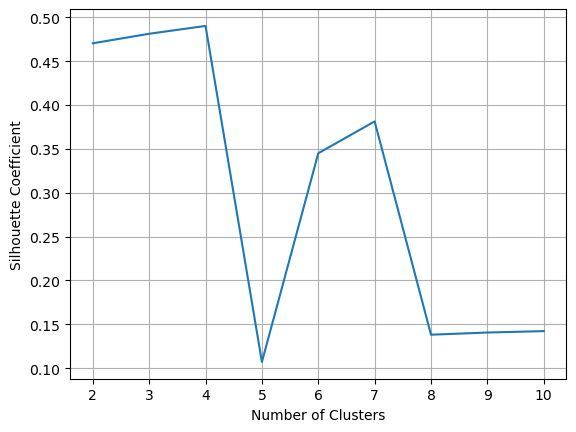

In [604]:
# Plotting the results:
plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.grid(True)
plt.show ()

### Based on the Silhouette Coefficient, the number 4 has the highest score. Therefore, I believe the optimal number of clusters should be 4.

In [606]:
# Create a KMeans object with 4 clusters
kmeans_pca = KMeans(n_clusters=4, random_state=1)

# Fit the KMeans algorithm on the PCA-transformed data
kmeans_pca.fit(pca7_df)

# Assign cluster labels to the PCA scores
pca7_df["PCA_kmeans_clusters"] = kmeans_pca.labels_

In [607]:
pca7_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PCA_kmeans_clusters
0,-1.228300,-0.915282,-0.314396,0.330916,0.407275,-0.121342,0.920151,1
1,-0.132905,-1.024312,0.988017,0.281161,0.716609,0.185424,0.880215,1
2,-1.071312,-0.751996,0.798471,0.314448,-0.276986,0.218053,0.054897,1
3,-0.126537,1.176945,0.915497,0.626794,0.001351,-0.076122,-0.885556,1
4,0.576854,1.113511,3.399115,-0.280629,1.622087,0.918350,-0.954562,3


In [608]:
pca7_df.PCA_kmeans_clusters.value_counts ()

PCA_kmeans_clusters
1    277
2     27
3     25
0     11
Name: count, dtype: int64

Text(0, 0.5, 'PC2')

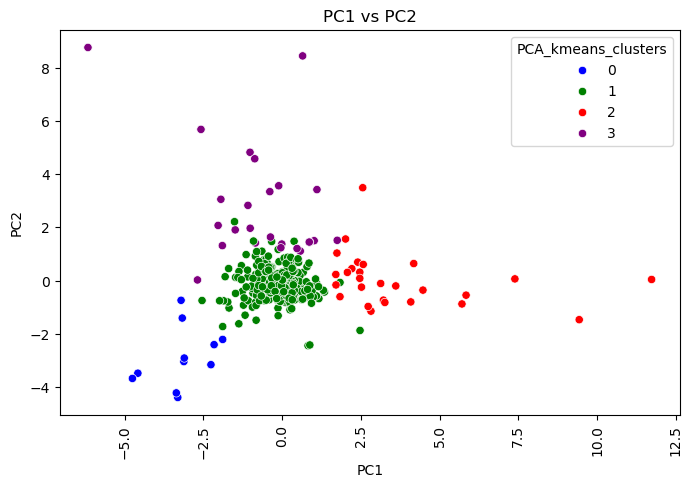

In [609]:
fig = plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='PC1', y='PC2', data=pca7_df, hue='PCA_kmeans_clusters', palette=['blue', 'green', 'red','purple','black'])
plt.title('PC1 vs PC2', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('PC1', fontsize=10)
plt.ylabel('PC2', fontsize=10)

### Unlike the graph we plotted for K-means without PCA, we can see that the points are well separated.

In [611]:
#Appending cluster lables based on PCA to the original data frame
scaled_df["PCA_kmeans_clusters"]=kmeans_pca.labels_
stock_df["PCA_KM_segments"] = kmeans_pca.labels_

,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
PCA_kmeans_clusters,,,,,,,,,,,
0,-0.309926,0.139248,-0.669418,-0.088233,0.065186,-0.580298,3.390319,0.209466,4.406556,-0.402159,-0.203198
1,-0.086438,0.082414,-0.232951,-0.051617,-0.188546,-0.035803,-0.003094,0.128361,-0.163976,-0.198018,-0.117644
2,-0.436756,-1.622242,2.342968,0.699929,-0.221363,-0.110608,-1.367911,-1.862300,-0.114408,1.309894,0.219435
3,1.565799,0.777609,0.345241,-0.145189,2.299485,0.771489,0.019883,0.496883,0.001525,0.956300,1.155908


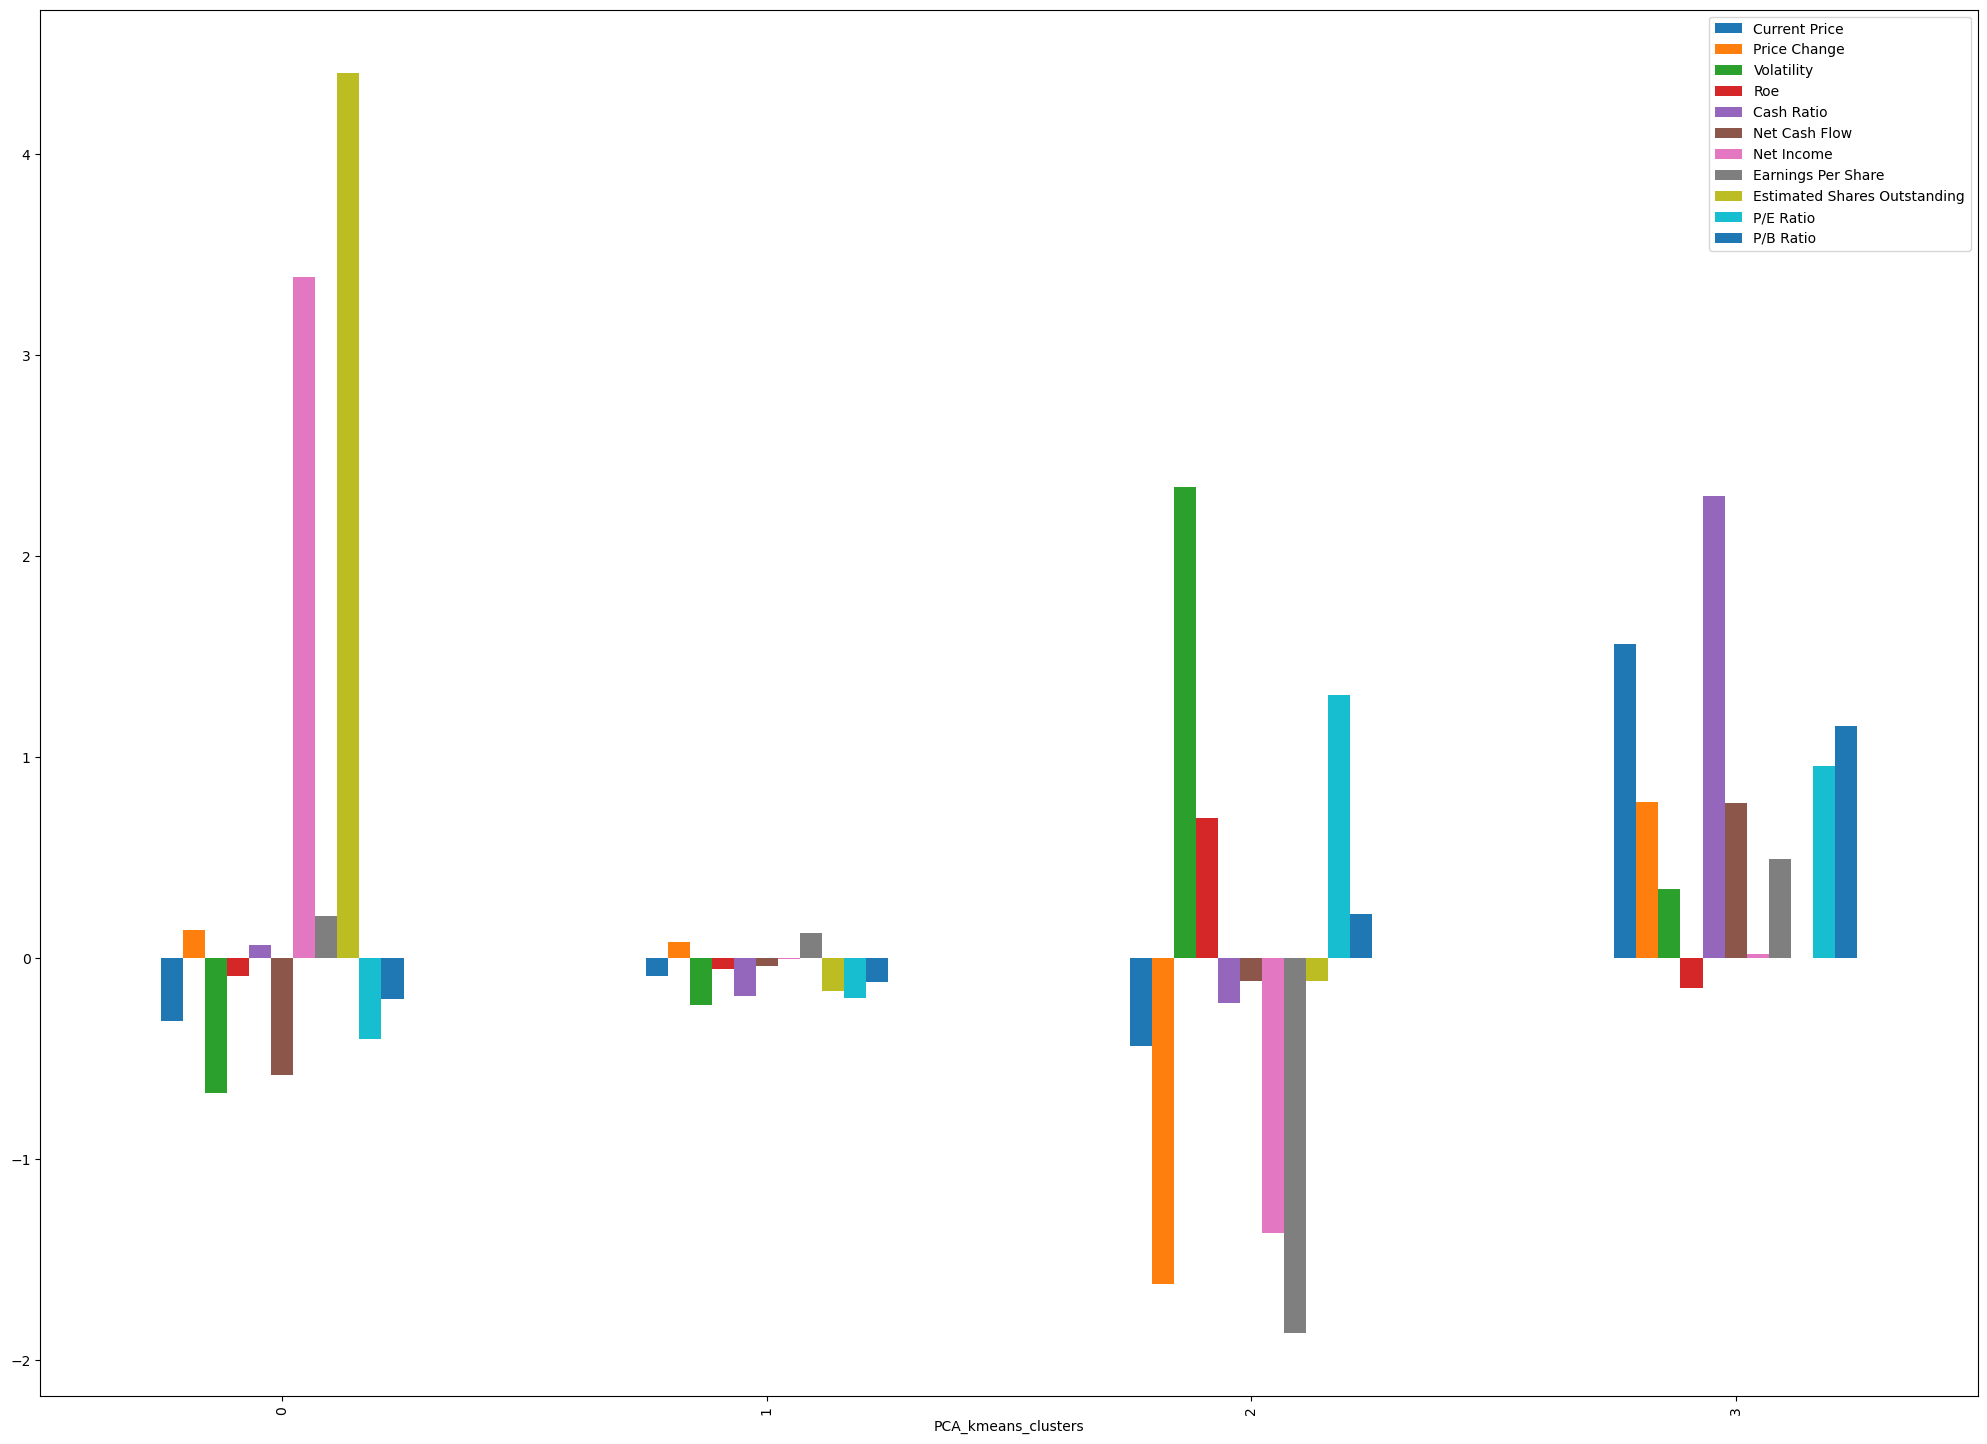

In [612]:
cluster_profile_new = scaled_df.groupby("PCA_kmeans_clusters").mean().plot.bar(figsize=(25, 18))

scaled_df.groupby("PCA_kmeans_clusters").mean().style.highlight_max(color="lightgreen", axis=0).highlight_min(color="yellow", axis=0)

### **Insights**
#### Cluster 0 :
- #### represent financially strong and stable companies, making them safer for long-term investment.
- #### High Current Price, Moderate Price Change, High Cash Ratio
#### Cluster 1 Most risky cluster with unstable earnings and poor financials.
- #### Highest price change and highest P/E ratio.
- #### Low current price, negative net income, and negative earnings per share.
- #### High volatility, suggesting these are highly speculative stocks.
#### Cluster 2 appears to have potential for high growth, but they come with negative earnings and high risk.
- #### High volatility with high ROE and moderate P/E ratio.
- #### Strong potential for growth but comes with high risk.
#### Cluster 3 seem to have a strong financial foundation and could be well-established players.
- #### Financially strong and stable companies, making them safer for long-term investment.
- #### High cash ratio, high net income, and high earnings per share.
- #### Low price change, moderate ROE, and moderate volatility.
### **Recommendations**:
- #### Investors looking for stable, long-term investments should consider Cluster 0 and Cluster 3 stocks, as they have good financial health and moderate volatility.
- #### Risk-taking investors seeking high returns could look into Cluster 2 stocks, but caution is needed due to negative earnings and high volatility.
- #### Speculative traders might find Cluster 1 stocks appealing, but they come with significant financial instability.
- #### A balanced portfolio can include a mix of Cluster 0 and Cluster 3 for stability and Cluster 2 for potential high returns.

## Let's display the compaines in each cluster

In [615]:
for cl in stock_df["PCA_KM_segments"].unique():
    print("In cluster {}, these are the colleges:".format(cl))
    print(stock_df[stock_df["PCA_KM_segments"] == cl]["Security"].unique())
    print()

In cluster 1, these are the colleges:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle Internation

### Using the PCA components, let's implement Hierarchical clustering

In [617]:
pca7_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PCA_kmeans_clusters
0,-1.228300,-0.915282,-0.314396,0.330916,0.407275,-0.121342,0.920151,1
1,-0.132905,-1.024312,0.988017,0.281161,0.716609,0.185424,0.880215,1
2,-1.071312,-0.751996,0.798471,0.314448,-0.276986,0.218053,0.054897,1
3,-0.126537,1.176945,0.915497,0.626794,0.001351,-0.076122,-0.885556,1
4,0.576854,1.113511,3.399115,-0.280629,1.622087,0.918350,-0.954562,3


In [618]:
pca7_df.drop(columns="PCA_kmeans_clusters", inplace = True)

### I have removed the K-means cluster labels to use the components for hierarchical clustering.

In [620]:
#check
#pca7_df.head()

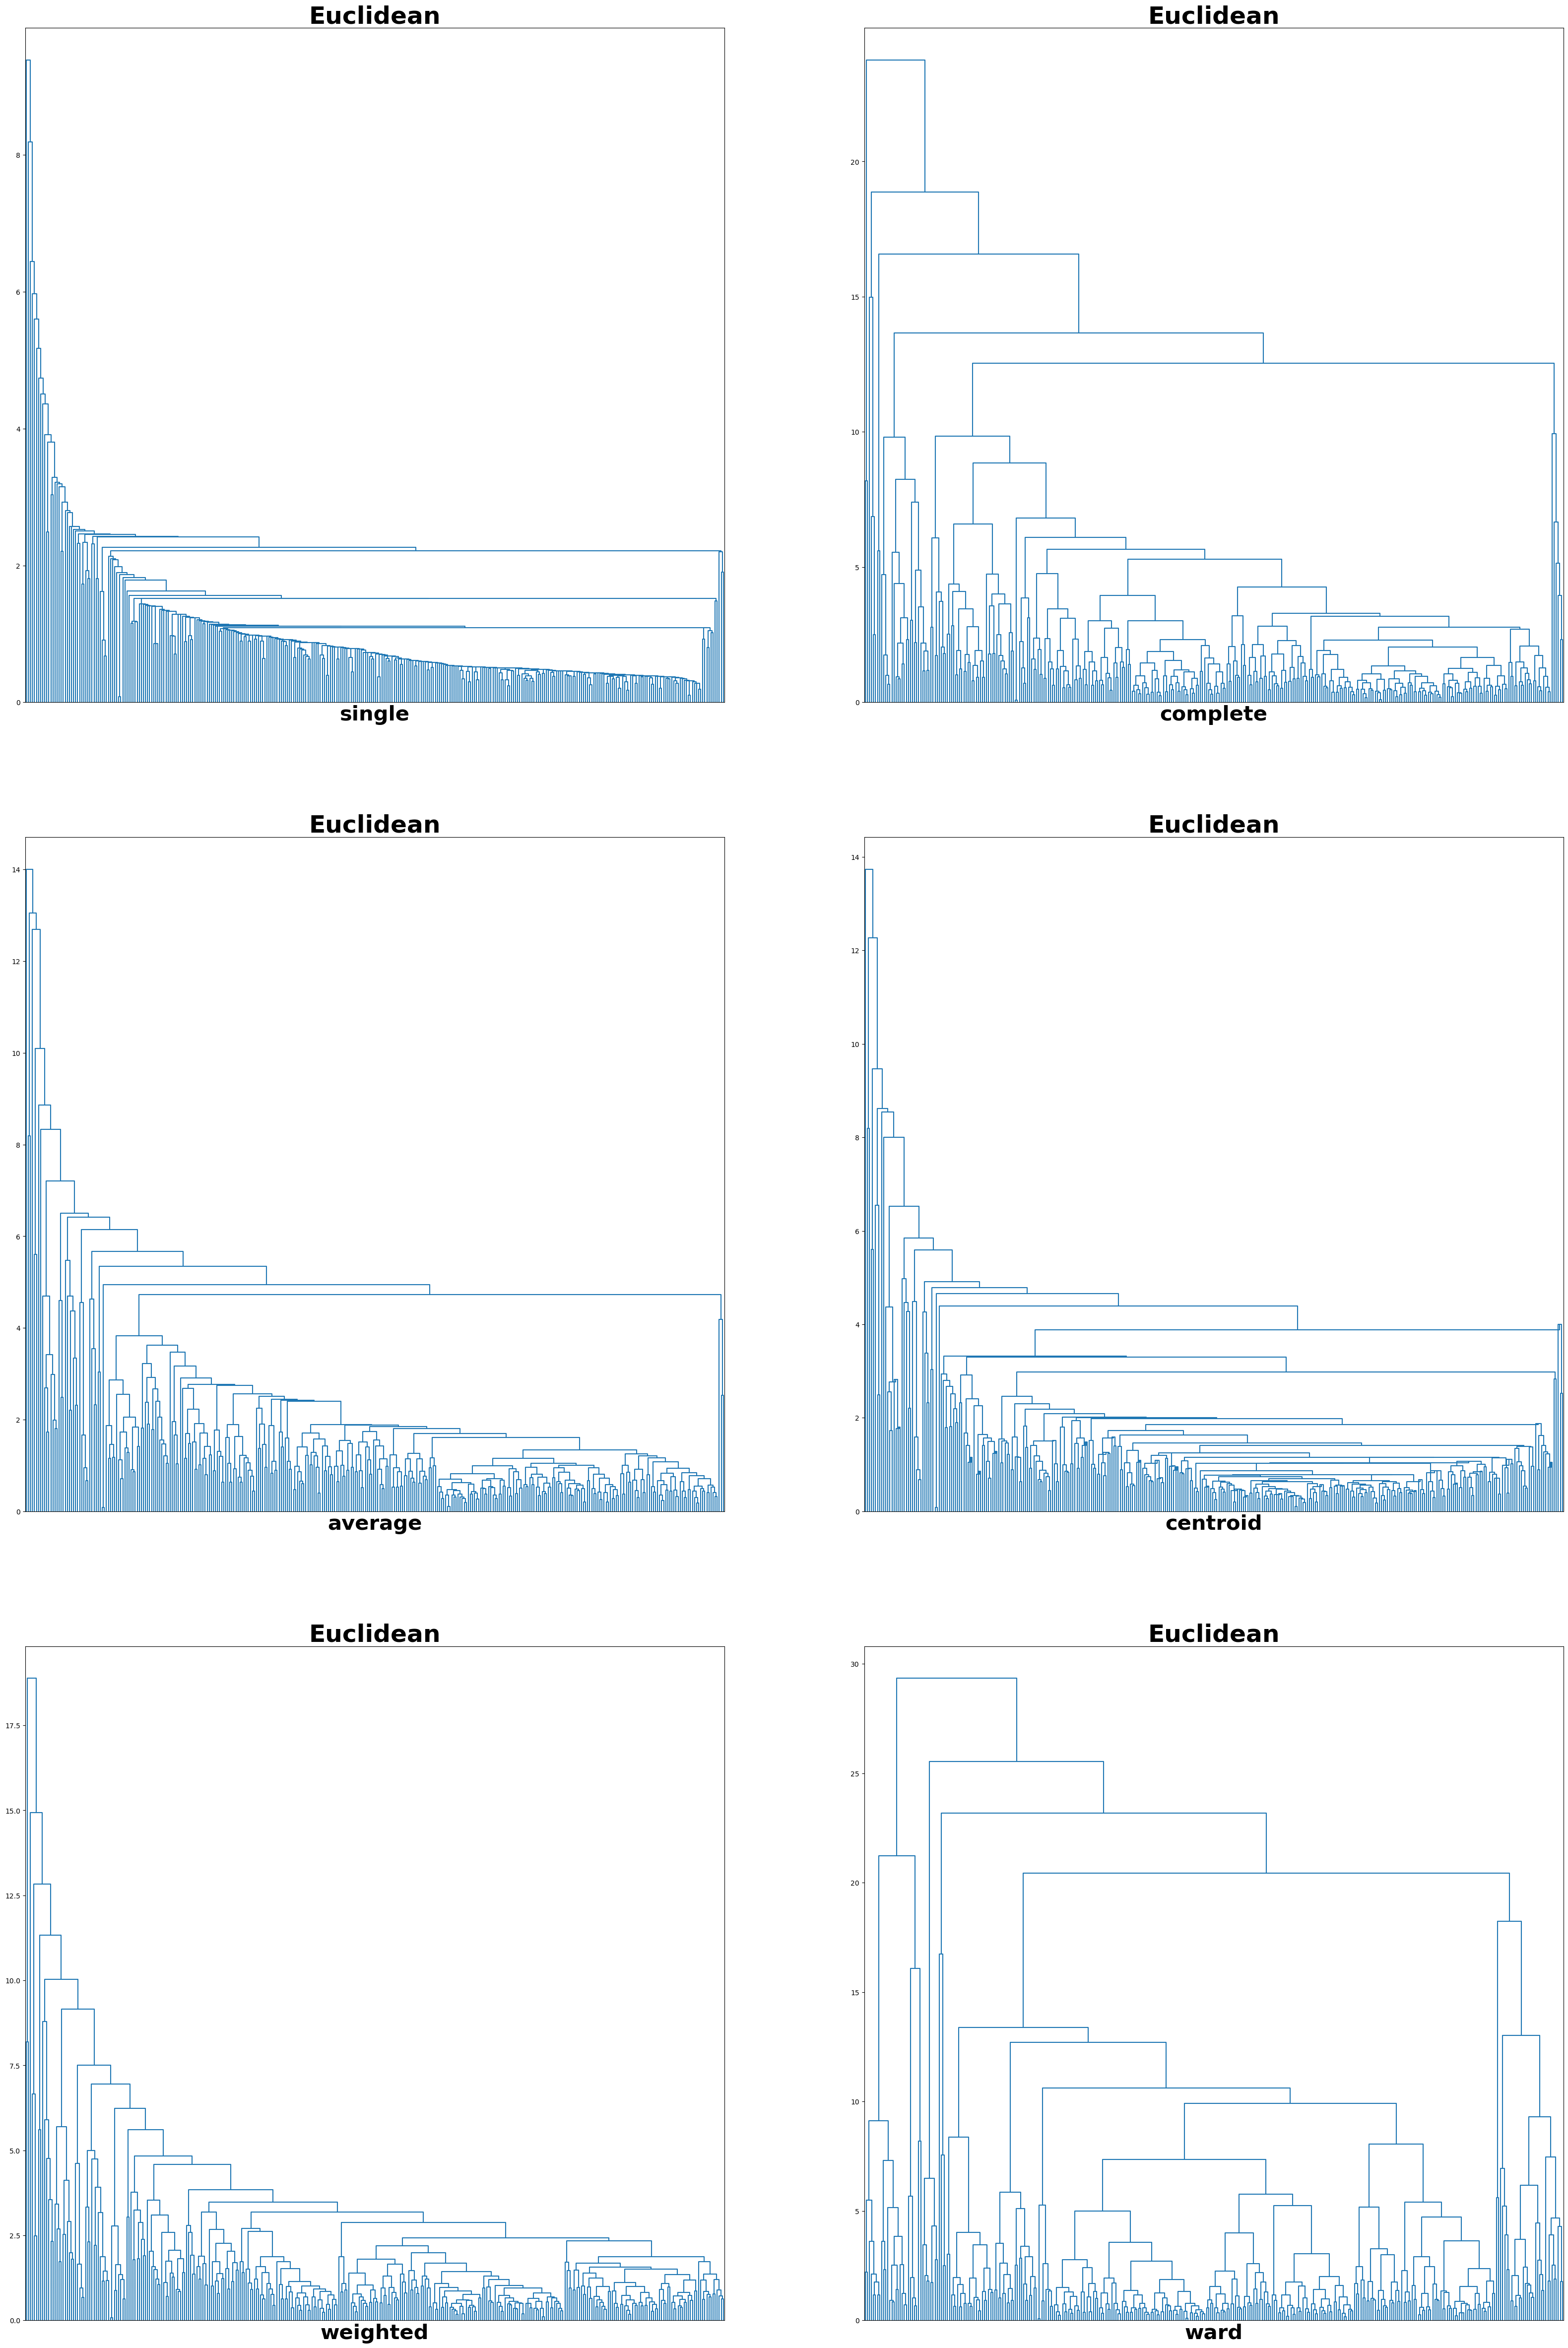

In [621]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(40, 60), squeeze=False)
for i, method in enumerate(
    ["single", "complete", "average", "centroid", "weighted", "ward"]
):
    ax = axes[i // 2, i % 2]
    Z = linkage(pca7_df, method=method)
    dendrogram(Z, color_threshold=0, ax=ax, no_labels=True)
    ax.set_xlabel(method, fontsize=30, fontweight='bold')
    ax.set_title("Euclidean", fontsize=35, fontweight='bold')

### When we compare the above dendrograms, even in these, I feel "Ward" looks more distributed and well-clustered. Just incase let's once compare the other dendrograms as well

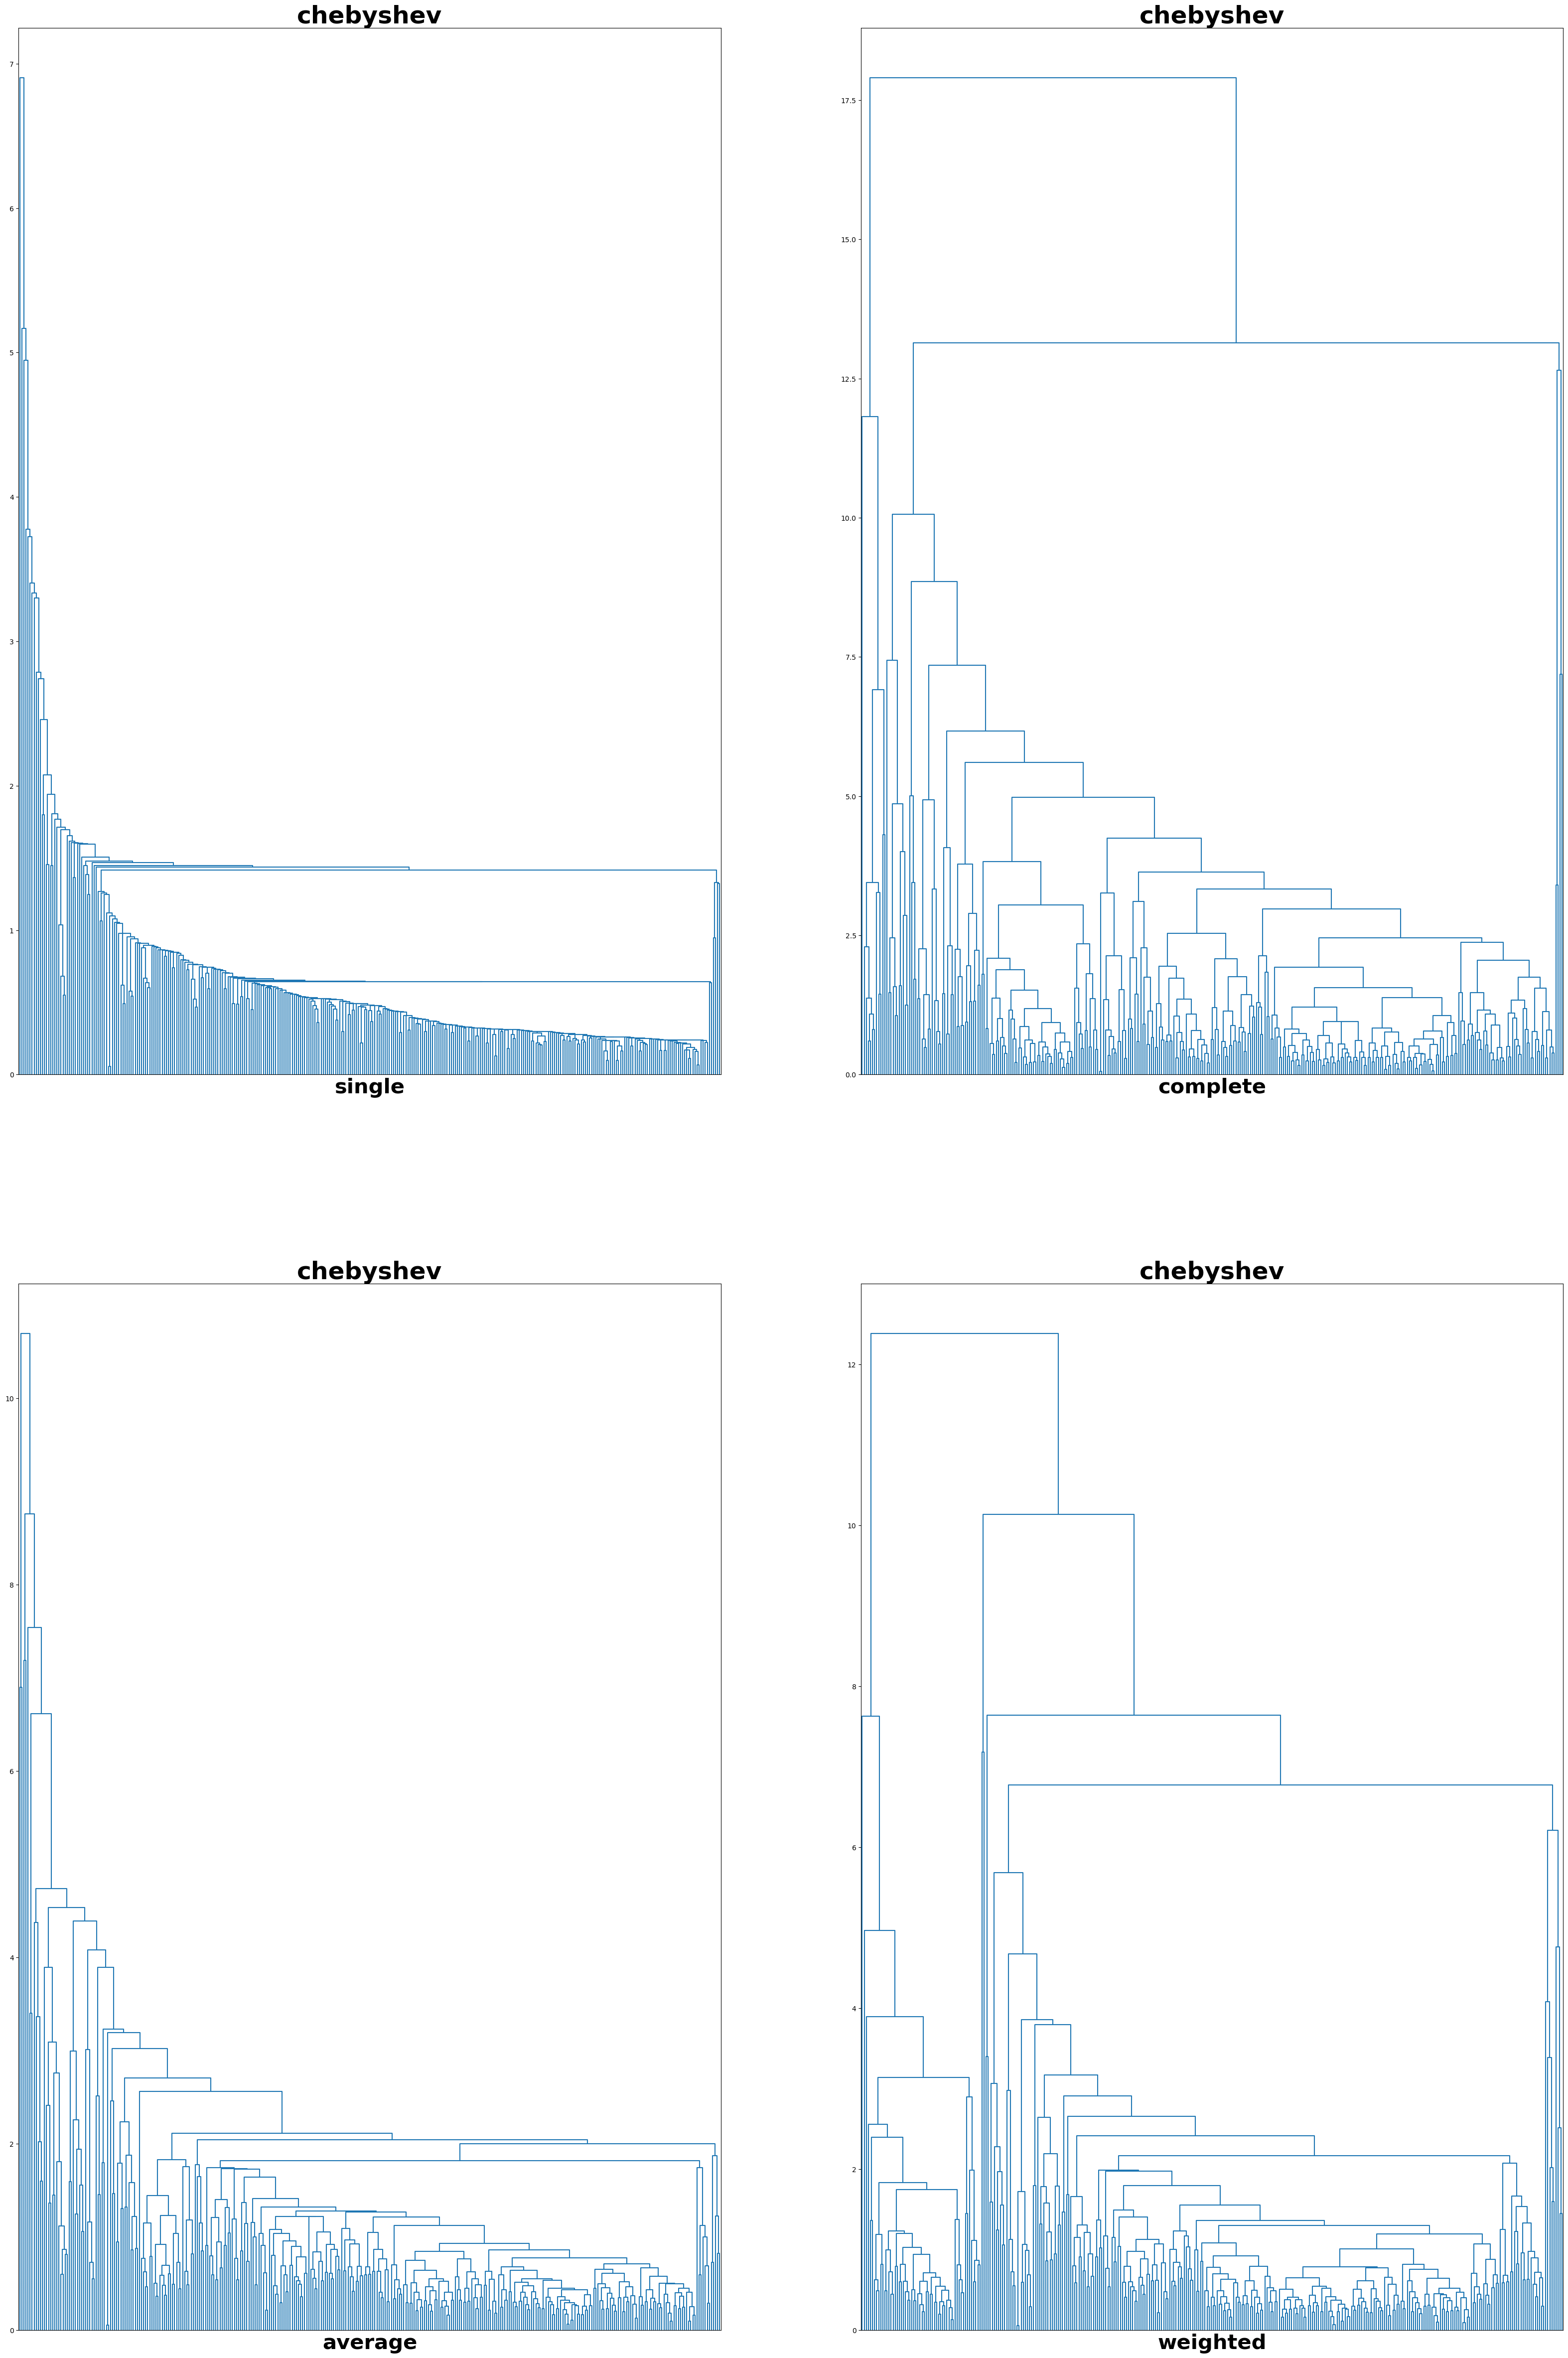

In [623]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 60), squeeze=False)
for i, method in enumerate(
   ["single", "complete", "average", "weighted"]
):
    ax = axes[i // 2, i % 2]
    Z = linkage(pca7_df,metric = "chebyshev",  method=method)
    dendrogram(Z, color_threshold=0, ax=ax, no_labels=True)
    ax.set_xlabel(method, fontsize=30, fontweight='bold')
    ax.set_title("chebyshev", fontsize=35, fontweight='bold')

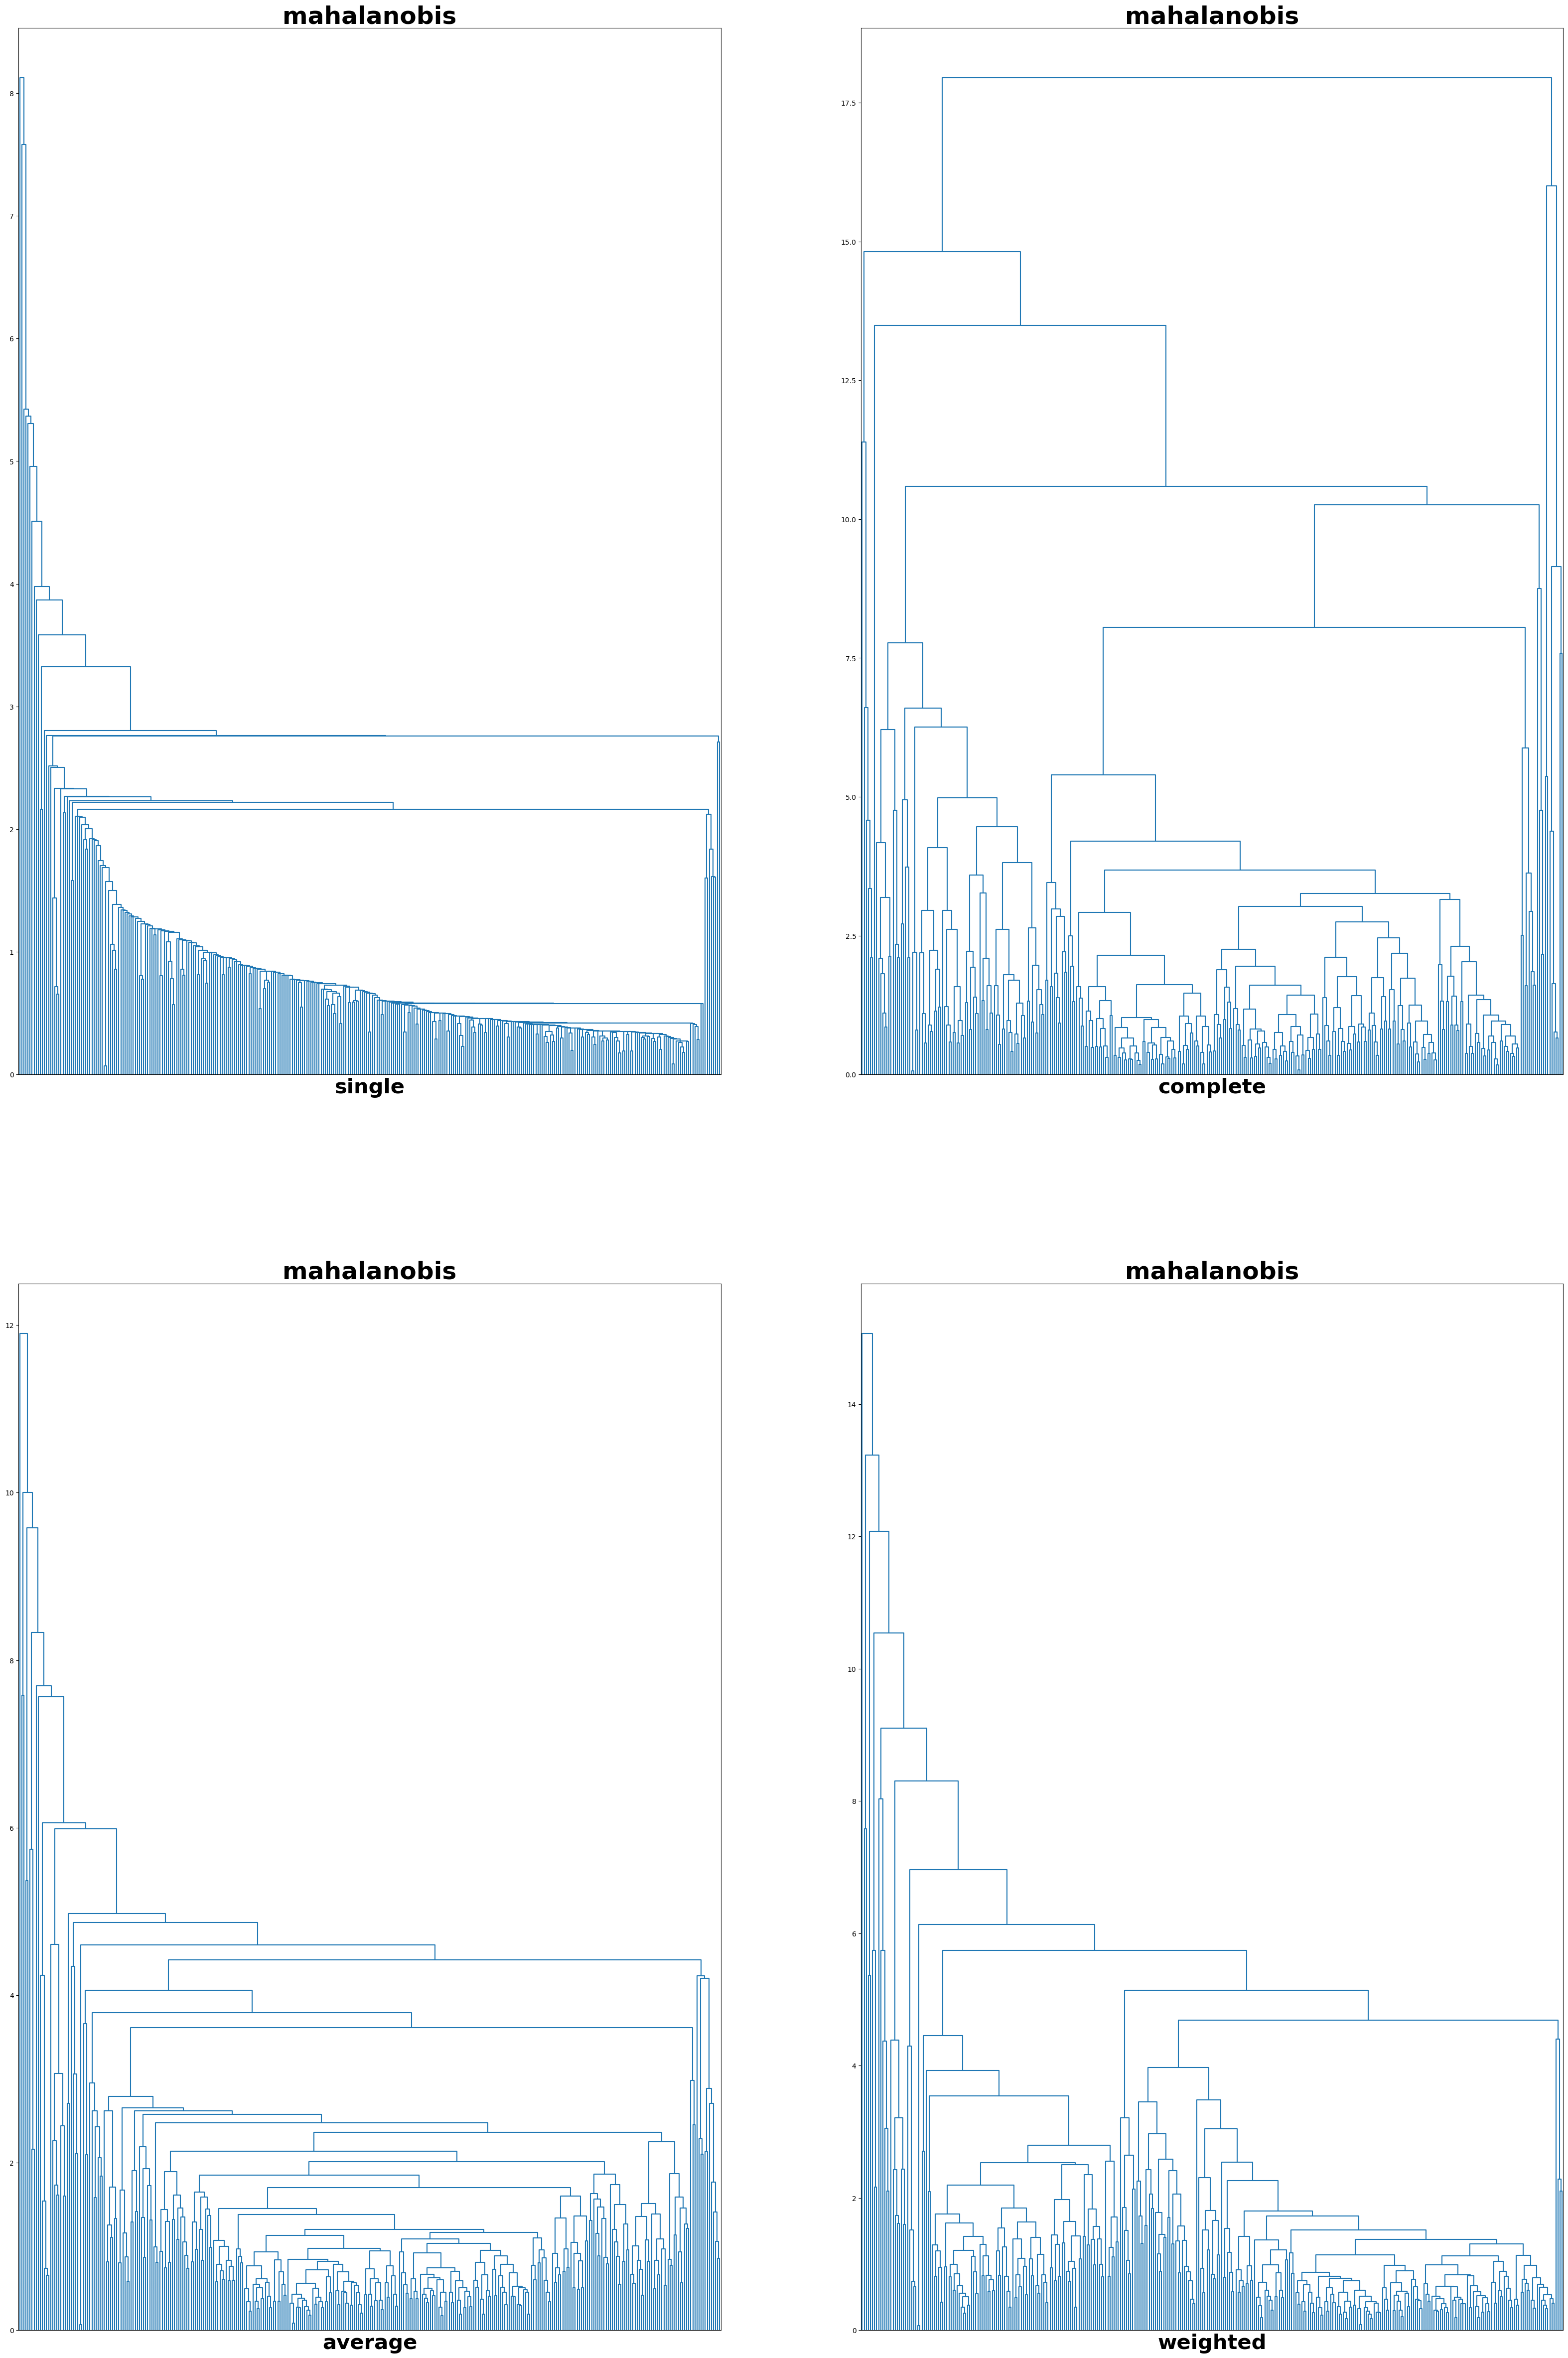

In [624]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 60), squeeze=False)
for i, method in enumerate(
   ["single", "complete", "average", "weighted"]
):
    ax = axes[i // 2, i % 2]
    Z = linkage(pca7_df,metric = "mahalanobis",  method=method)
    dendrogram(Z, color_threshold=0, ax=ax, no_labels=True)
    ax.set_xlabel(method, fontsize=30, fontweight='bold')
    ax.set_title("mahalanobis", fontsize=35, fontweight='bold')

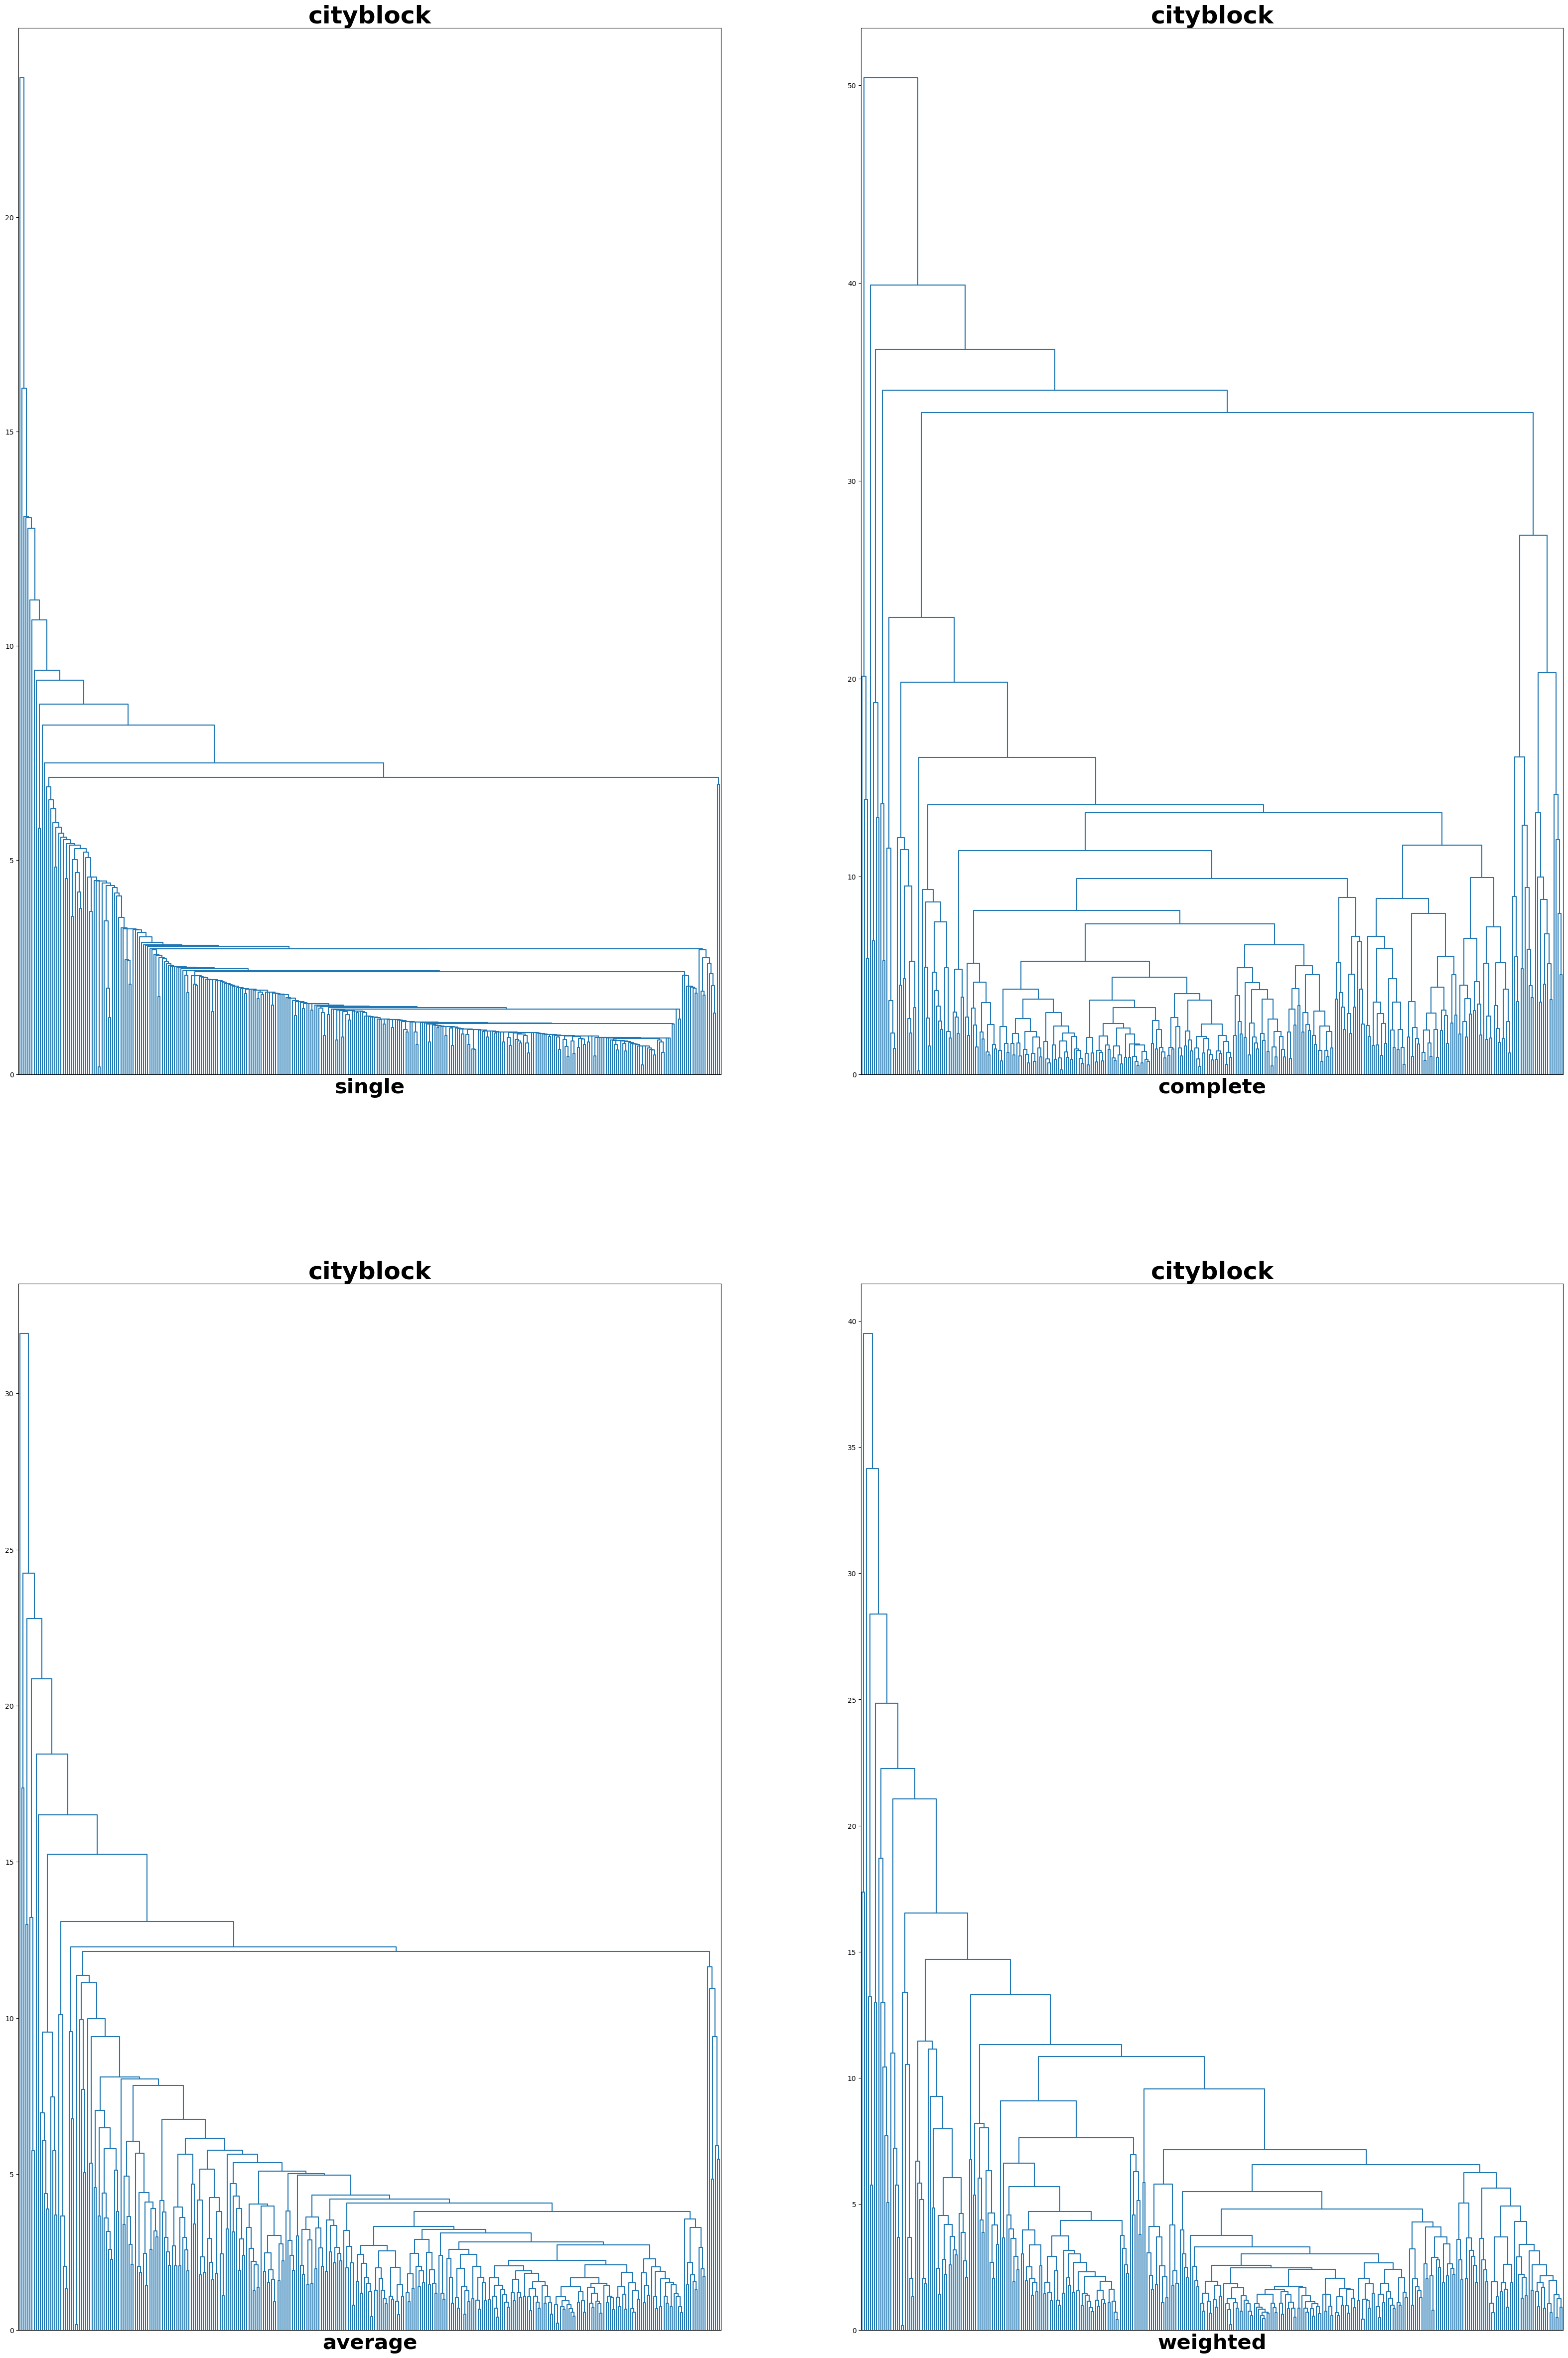

In [625]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 60), squeeze=False)
for i, method in enumerate(
   ["single", "complete", "average", "weighted"]
):
    ax = axes[i // 2, i % 2]
    Z = linkage(pca7_df,metric = "cityblock",  method=method)
    dendrogram(Z, color_threshold=0, ax=ax, no_labels=True)
    ax.set_xlabel(method, fontsize=30, fontweight='bold')
    ax.set_title("cityblock", fontsize=35, fontweight='bold')

### After examining the other dendrograms, I believe the **CityBlock|Complete** and **Mahalanobis|Complete** are also well-distributed dendrograms. Therefore, let's examine their cophenetic correlation.

In [627]:
# list of distance metrics
distance_metrics = ["euclidean"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "weighted", "ward"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(pca7_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(pca7_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9286315666752181.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8399652595541419.
Cophenetic correlation for Euclidean distance and average linkage is 0.9458737599210748.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9411187682433703.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9040516633934753.
Cophenetic correlation for Euclidean distance and ward linkage is 0.6875039890362747.


In [628]:
# list of distance metrics
distance_metrics = ["chebyshev", "mahalanobis", "cityblock"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(pca7_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(pca7_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Chebyshev distance and single linkage is 0.9144763388932815.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.751330971801961.
Cophenetic correlation for Chebyshev distance and average linkage is 0.929034520971787.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.4041246076517211.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9243785846782651.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6818203153701851.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9314204453791206.
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.7713899016424718.
Cophenetic correlation for Cityblock distance and single linkage is 0.915007338767021.
Cophenetic correlation for Cityblock distance and complete linkage is 0.8269528142789269.
Cophenetic correlation for Cityblock distance and average linkage is 0.9301866004720174.
Cophenetic cor

### When we compare the Cophenetic Correlations, the below dendrograms are relatively high:

#### Euclidean distance and single linkage
#### Euclidean distance and average linkage
#### Euclidean distance and centroid linkage
#### Euclidean distance and weighted linkage
#### Chebyshev distance and single linkage
#### Chebyshev distance and average linkage
#### Mahalanobis distance and single linkage
#### Mahalanobis distance and average linkage
#### Cityblock distance and single linkage
#### Cityblock distance and average linkage



### Neither of these appears to be well-distributed, so I decided to compare the second set of scores that are closer to the high scores.

#### Euclidean and complete 
#### chebyshev and complete 
#### Mahalanbois and weighted 
#### Cityblock and complete 
#### City block and Weighted 


### When I compare the dendrograms presented above, I find that the Cityblock and Complete Linkage methods are more evenly distributed compared to the others. Although the Euclidean and Ward methods show an even greater distribution, I prefer to use Cityblock and Complete Linkage because they have a higher cophenetic correlation.

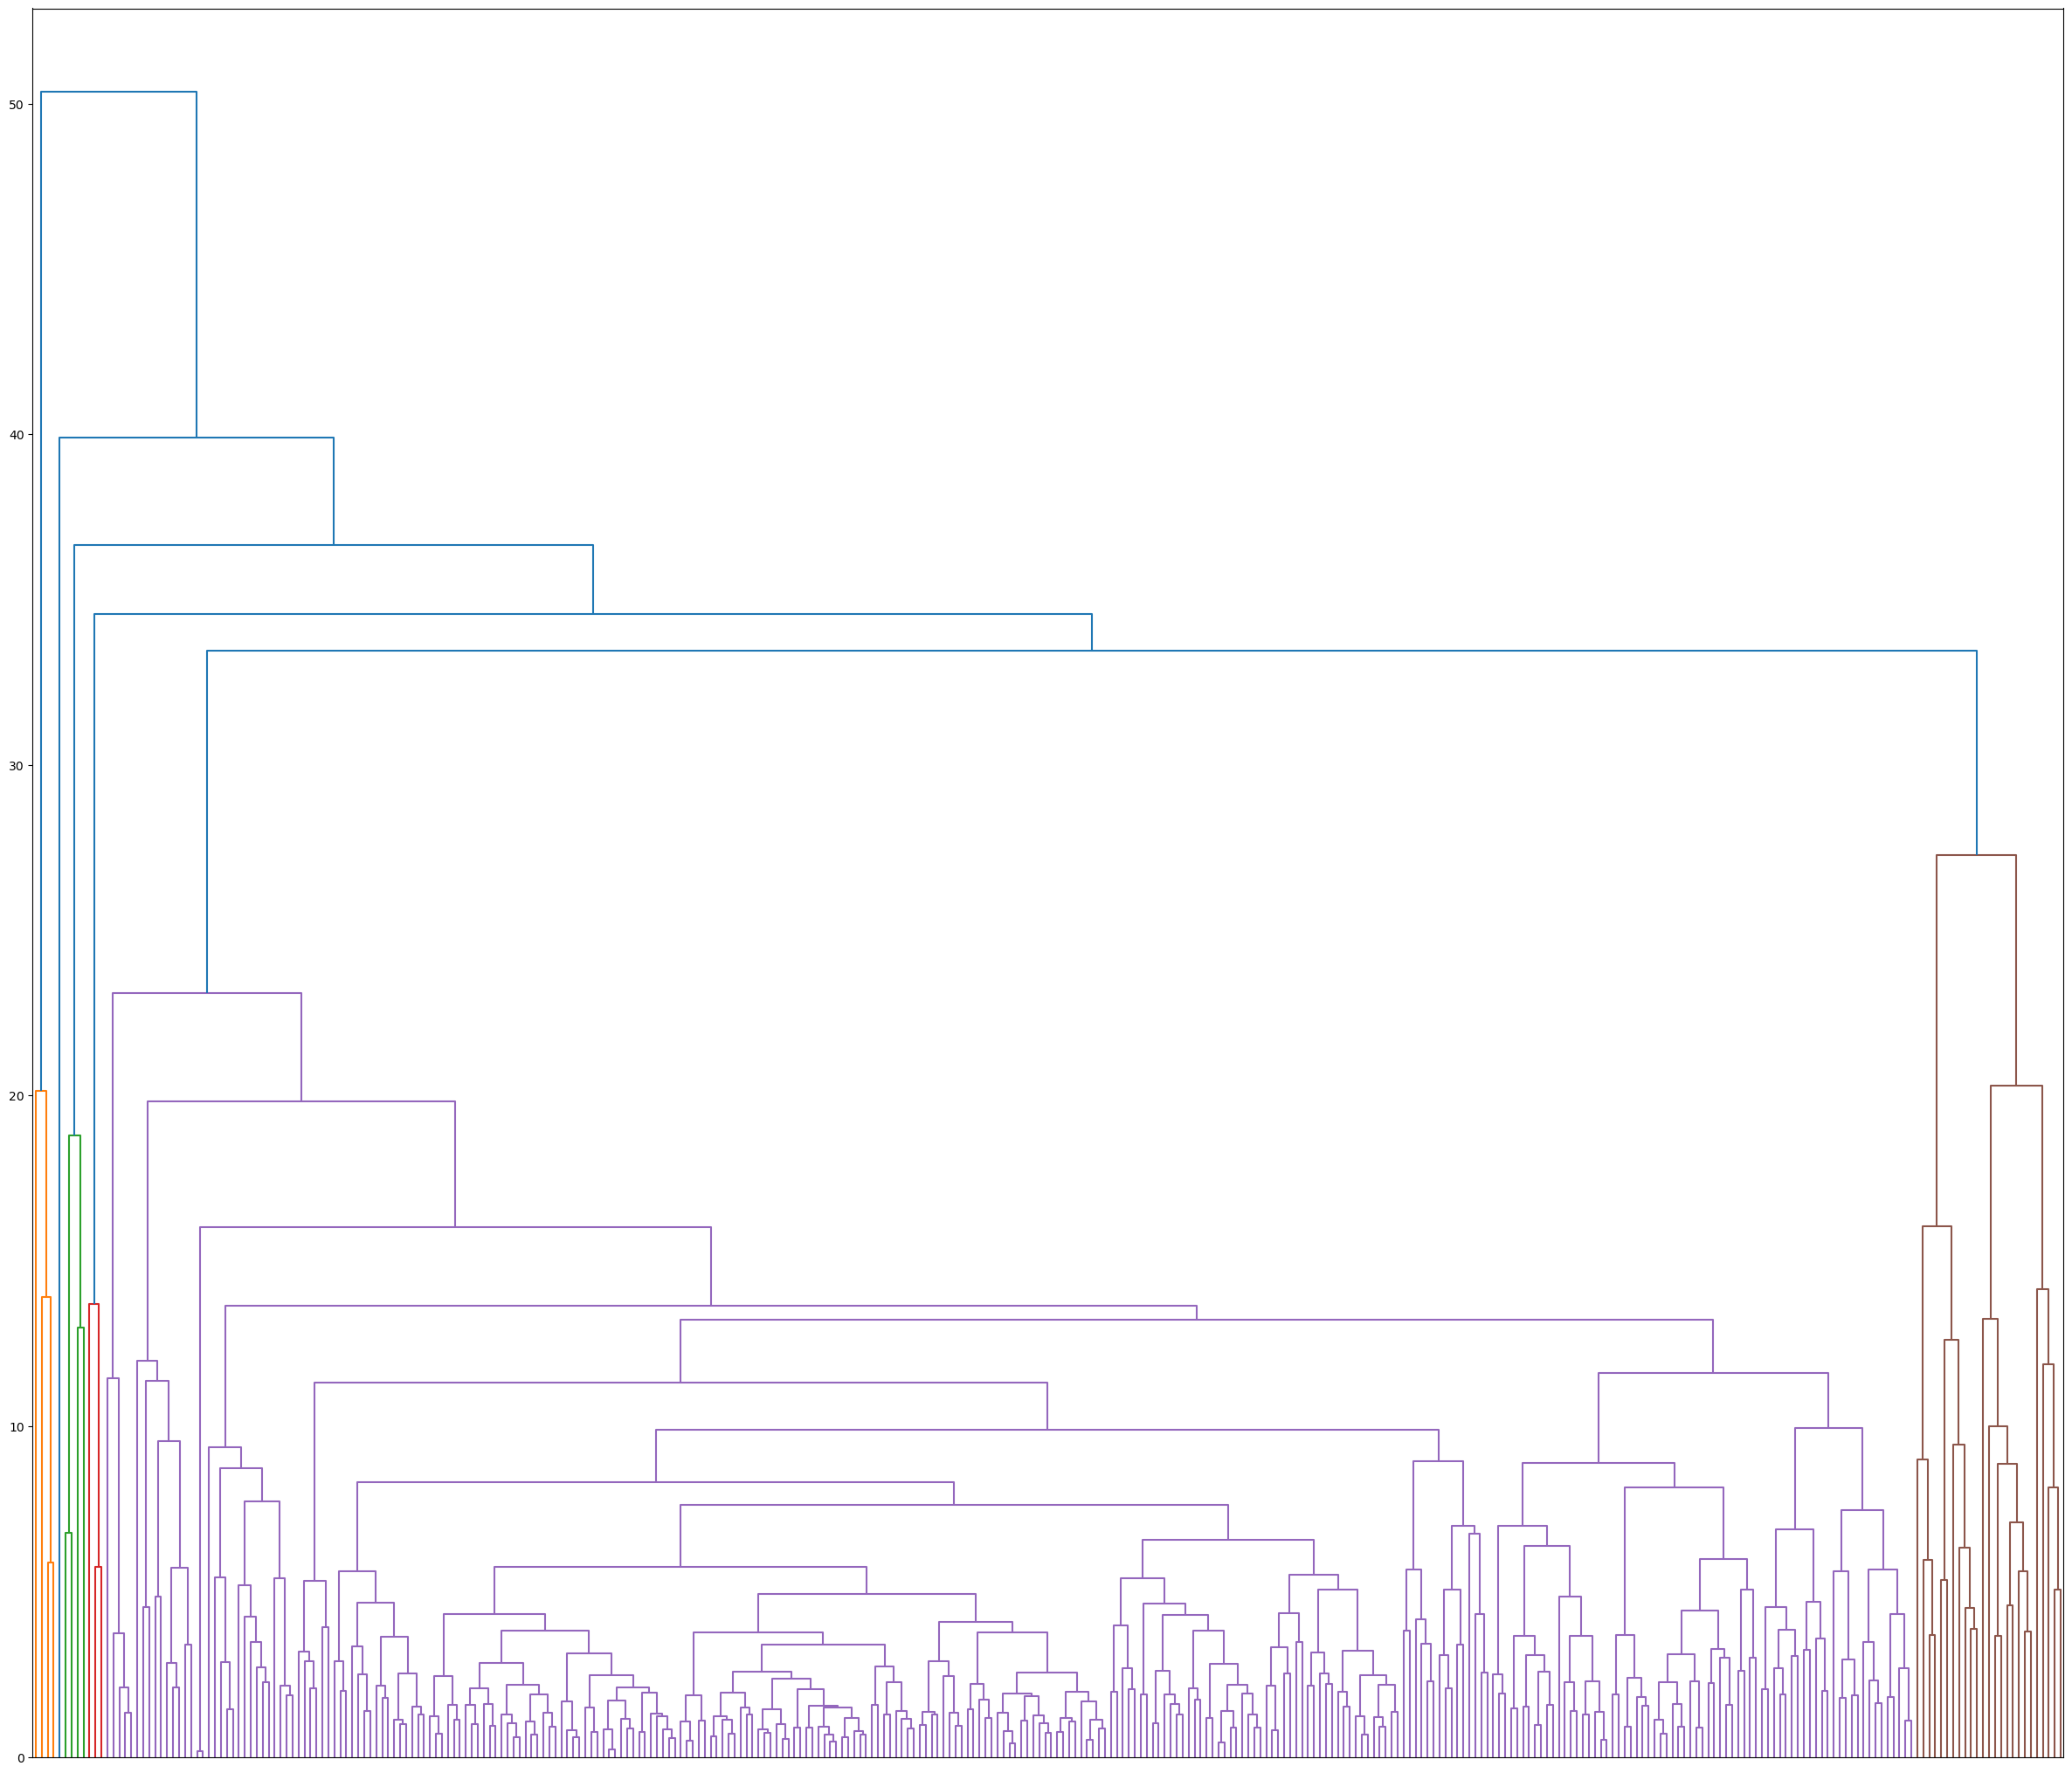

In [635]:
Z = linkage(pca7_df, method="complete", metric="cityblock")
fig = plt.figure(figsize=(30, 26))
dendrogram(Z, no_labels=True, color_threshold=30)
plt.show()

In [636]:
pca_HCmodel = AgglomerativeClustering(n_clusters=5, metric='cityblock', linkage="complete")
pca_HCmodel.fit(pca7_df)

AgglomerativeClustering(linkage='complete', metric='cityblock', n_clusters=5)

In [637]:
stock_df["PCA_HC_Clusters"] = pca_HCmodel.labels_

In [638]:
#stock_df.drop(columns='HC_Clusters', inplace = True)
stock_df.head(5)

,Security,Gics Sector,Gics Sub Industry,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,kmeans_clusters,HC_Clusters,PCA_KM_segments,PCA_HC_Clusters
Ticker Symbol,,,,,,,,,,,,,,,,,,
AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0,3,1,0
ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0,3,1,0
ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0,3,1,0
ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0,3,1,0
ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,2,3,3,0


In [639]:
# We now make cluster profiles
PCA_cluster_profile_HC = stock_df.groupby("PCA_HC_Clusters").mean(numeric_only=True)

In [640]:
# calcualting and adding count in each segment
PCA_cluster_profile_HC["count_in_each_segments"] = (
    stock_df.groupby("PCA_HC_Clusters")["Security"].count().values
)

In [641]:
# We now display cluster profiles, using the "style" fucntionality of pandas
PCA_cluster_profile_HC.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,Roe,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,kmeans_clusters,HC_Clusters,PCA_KM_segments,count_in_each_segments
PCA_HC_Clusters,,,,,,,,,,,,,,,
0,76.290175,4.157274,1.497417,34.551829,69.018293,-87184588.414634,1620755378.048780,3.123430,568557716.985366,28.678283,-1.817928,0.493902,2.902439,1.155488,328
1,28.382500,-11.369690,3.077612,513.250000,43.250000,-441000000.000000,-14007250000.000000,-35.090000,401116225.075000,76.918948,1.194325,3.500000,2.500000,2.000000,4
2,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,2.000000,0.000000,3.000000,1
3,25.130000,-0.115943,2.002816,9.000000,123.750000,12205000000.000000,7274500000.000000,1.900000,1736753385.725000,36.424551,6.079450,2.500000,2.500000,2.000000,4
4,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,2.666667,0.000000,2.666667,3


<Axes: xlabel='PCA_HC_Clusters'>

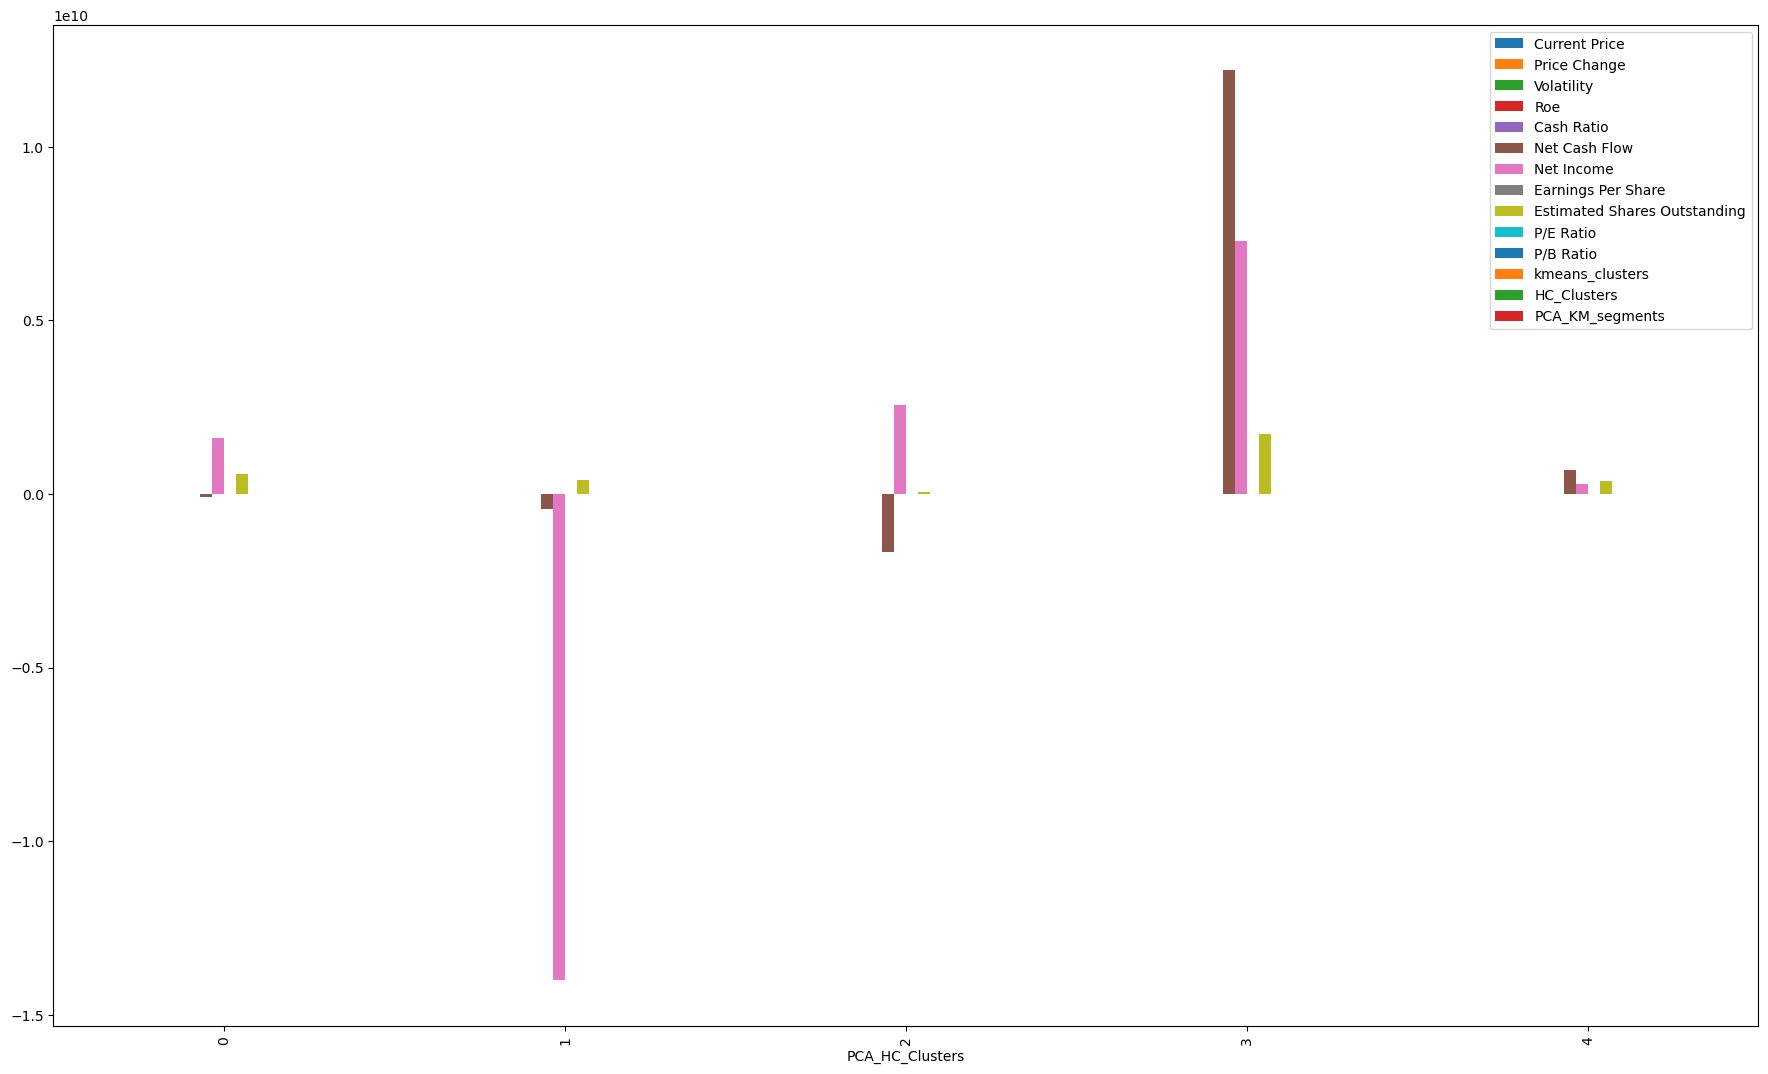

In [642]:
stock_df.groupby("PCA_HC_Clusters").mean(numeric_only=True).plot.bar(figsize=(22, 13))